# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("../Output/df_clean.csv")
df.head()

brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...                 0.0            185      4   
1                   7.0  ...                 0.0            185      4   
2                   5.9  ...                 0.0            360      5   
3                   6.2  ...                 0.0            360      5   
4                   7.5  ...               965.5            496      5   

   drivetrain       segment length_mm width_mm  height_mm  car_body_type  \
0         FWD   B - Compact      3673     1683       1518      Hatchback   
1         FWD   B - Compact      3673     1683       1518      Hatchback   
2         FWD  JB - Compact      4187     1779       1557            SUV   
3         FWD  JB - Compact      4187     1779       1557            SUV   
4         FWD   JC - Medium      4680     1865       1700            SUV   

                                          source_url  
0  https://ev-database.org/car/1904/Abarth-500e-C...  
1  https://ev-database.org/car/1903/Abarth-500e-H...  
2  https://ev-database.org/car/3057/Abarth-600e-S...  
3  https://ev-database.org/car/3056/Abarth-600e-T...  
4         https://ev-database.org/car/1678/Aiways-U5  

[5 rows x 22 columns]

## Statistical Summary (After Data Cleaning)

### Numerical Columns

In [3]:
df.describe()

top_speed_kmh  battery_capacity_kWh  number_of_cells    torque_nm  \
count     476.000000            476.000000       275.000000   476.000000   
mean      185.689076             74.179202       486.720000   504.172754   
std        34.179218             20.265310      1212.794871   246.032130   
min       125.000000             21.300000        72.000000   113.000000   
25%       160.000000             60.000000       150.000000   310.000000   
50%       180.000000             76.750000       216.000000   437.500000   
75%       201.000000             90.600000       324.000000   679.000000   
max       325.000000            118.000000      7920.000000  1350.000000   

       efficiency_wh_per_km   range_km  acceleration_0_100_s  \
count            476.000000  476.00000            476.000000   
mean             162.972689  393.87605              6.863235   
std               34.354396  102.92689              2.719724   
min              109.000000  135.00000              2.200000   
25%              143.000000  323.75000              4.800000   
50%              155.000000  400.00000              6.600000   
75%              178.000000  470.00000              8.200000   
max              370.000000  685.00000             19.100000   

       fast_charging_power_kw_dc  towing_capacity_kg  cargo_volume_l  \
count                 476.000000          476.000000      476.000000   
mean                  125.102941         1033.438929      493.483193   
std                    58.229563          734.054351      187.319850   
min                    29.000000            0.000000      151.000000   
25%                    80.000000          350.000000      385.000000   
50%                   113.000000         1000.000000      470.000000   
75%                   150.000000         1600.000000      545.000000   
max                   281.000000         2500.000000     1410.000000   

            seats    length_mm     width_mm    height_mm  
count  476.000000   476.000000   476.000000   476.000000  
mean     5.264706  4680.813025  1887.550420  1600.907563  
std      1.005927   368.014543    73.719751   130.553413  
min      2.000000  3620.000000  1610.000000  1329.000000  
25%      5.000000  4440.000000  1849.000000  1514.000000  
50%      5.000000  4720.000000  1890.000000  1596.000000  
75%      5.000000  4961.000000  1939.000000  1665.000000  
max      9.000000  5908.000000  2080.000000  1986.000000

### Categorical Columns

In [4]:
df.describe(include='object')

brand             model battery_type fast_charge_port  \
count             476               476          476              476   
unique             59               476            1                2   
top     Mercedes-Benz  500e Convertible  Lithium-ion              CCS   
freq               42                 1          476              475   

       drivetrain      segment car_body_type  \
count         476          476           476   
unique          3           15             8   
top           AWD  JC - Medium           SUV   
freq          191           91           244   

                                               source_url  
count                                                 476  
unique                                                476  
top     https://ev-database.org/car/1904/Abarth-500e-C...  
freq                                                    1

## Univariate Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis(df, column):
    plt.figure(figsize=(15, 5))
    print(f"🔍 Univariate Analysis for: {column}\n")
    
    if pd.api.types.is_numeric_dtype(df[column]):
        print("📌 Summary Statistics:")
        display(df[column].describe())

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=False, bins=30, color='skyblue')
        plt.title("Histogram")

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], color='lightgreen')
        plt.title("Boxplot")

        # KDE plot
        plt.subplot(1, 3, 3)
        sns.kdeplot(df[column], fill=True, color='coral')
        plt.title("Density Plot (KDE)")

    else:
        # Limit value counts to top 15 categories
        value_counts = df[column].value_counts().head(15)
        print("📌 Value Counts (Top 15 shown if too many):")
        display(value_counts)

        # Bar plot
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], 
                      order=value_counts.index, 
                      hue=df[column] if df[column].nunique() <= 15 else None,
                      palette='viridis',
                      legend=False)
        plt.xticks(rotation=45)
        plt.title("Bar Plot (Top 15)")

        # Pie chart if <= 5 unique categories
        if df[column].nunique() <= 5:
            plt.subplot(1, 2, 2)
            value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
            plt.title("Pie Chart")
            plt.ylabel("")

    plt.tight_layout()
    plt.show()


# Main Loop - All Numerical First, Then Categorical
def run_univariate_analysis(df):
    exclude_cols = ['model', 'source_url']
    
    # Numerical columns first
    numerical_cols = [col for col in df.columns 
                      if pd.api.types.is_numeric_dtype(df[col]) and col not in exclude_cols]
    
    # Categorical columns next
    categorical_cols = [col for col in df.columns 
                        if not pd.api.types.is_numeric_dtype(df[col]) and col not in exclude_cols]
    
    print("📊 Starting Univariate Analysis for NUMERICAL Columns...\n")
    for col in numerical_cols:
        univariate_analysis(df, col)
    
    print("🧩 Starting Univariate Analysis for CATEGORICAL Columns...\n")
    for col in categorical_cols:
        univariate_analysis(df, col)


📊 Starting Univariate Analysis for NUMERICAL Columns...

🔍 Univariate Analysis for: top_speed_kmh

📌 Summary Statistics:


count    476.000000
mean     185.689076
std       34.179218
min      125.000000
25%      160.000000
50%      180.000000
75%      201.000000
max      325.000000
Name: top_speed_kmh, dtype: float64

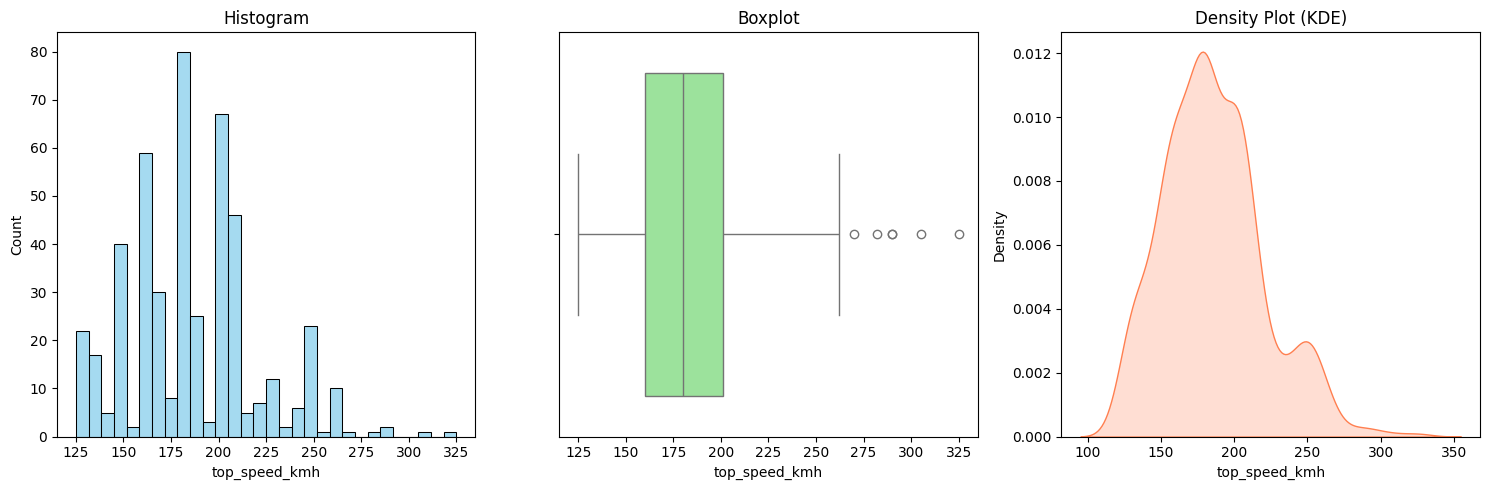

🔍 Univariate Analysis for: battery_capacity_kWh

📌 Summary Statistics:


count    476.000000
mean      74.179202
std       20.265310
min       21.300000
25%       60.000000
50%       76.750000
75%       90.600000
max      118.000000
Name: battery_capacity_kWh, dtype: float64

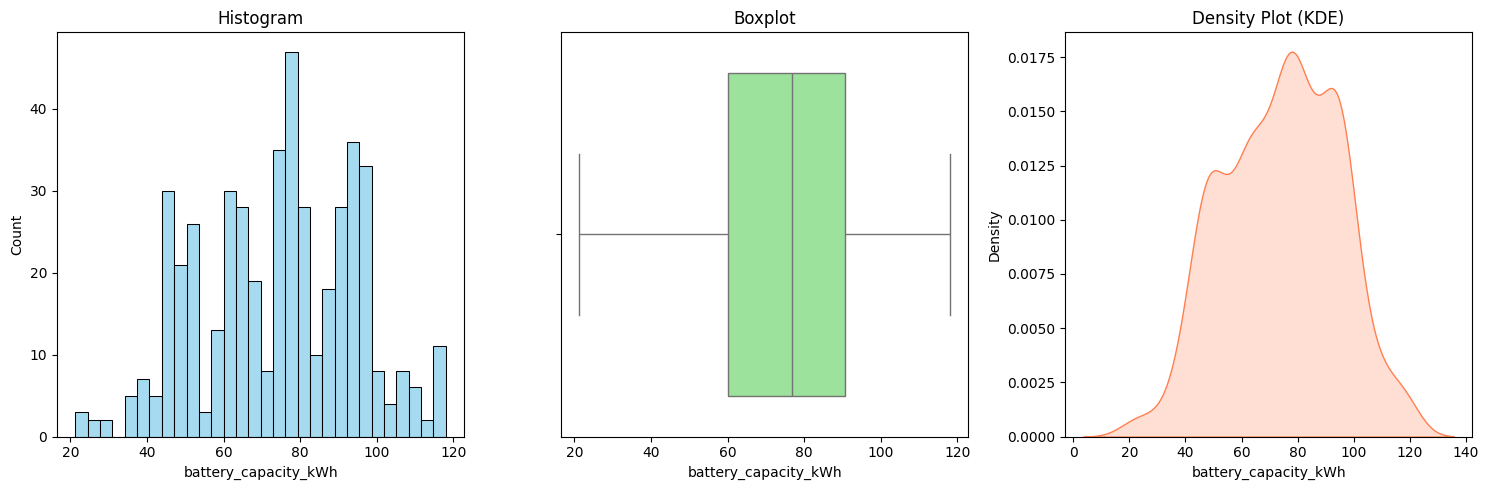

🔍 Univariate Analysis for: number_of_cells

📌 Summary Statistics:


count     275.000000
mean      486.720000
std      1212.794871
min        72.000000
25%       150.000000
50%       216.000000
75%       324.000000
max      7920.000000
Name: number_of_cells, dtype: float64

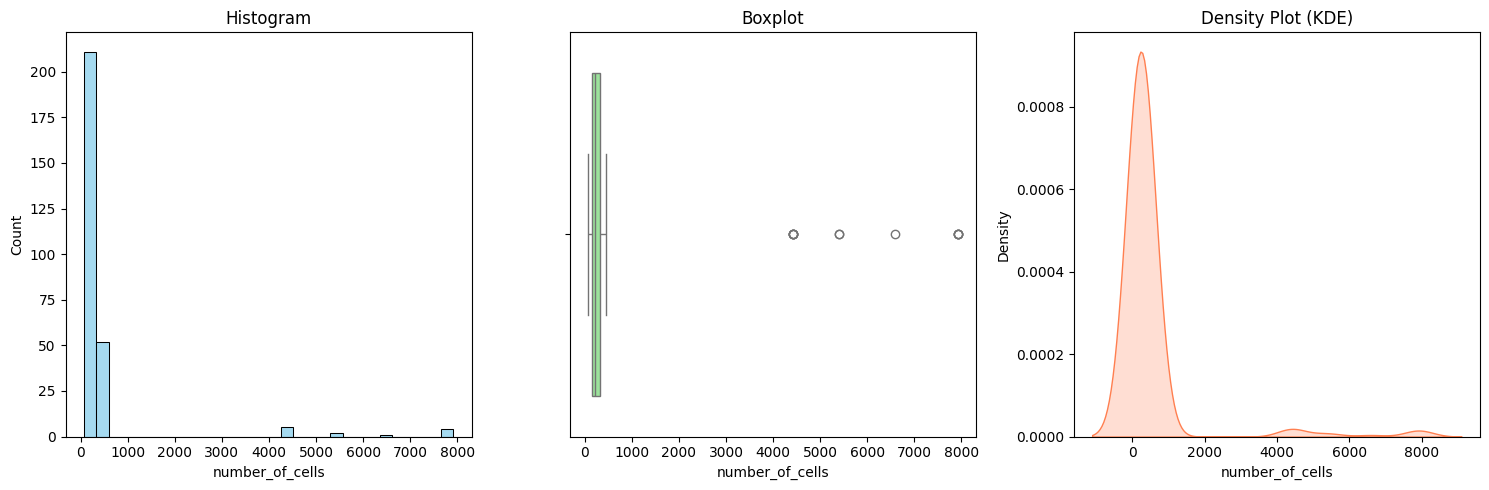

🔍 Univariate Analysis for: torque_nm

📌 Summary Statistics:


count     476.000000
mean      504.172754
std       246.032130
min       113.000000
25%       310.000000
50%       437.500000
75%       679.000000
max      1350.000000
Name: torque_nm, dtype: float64

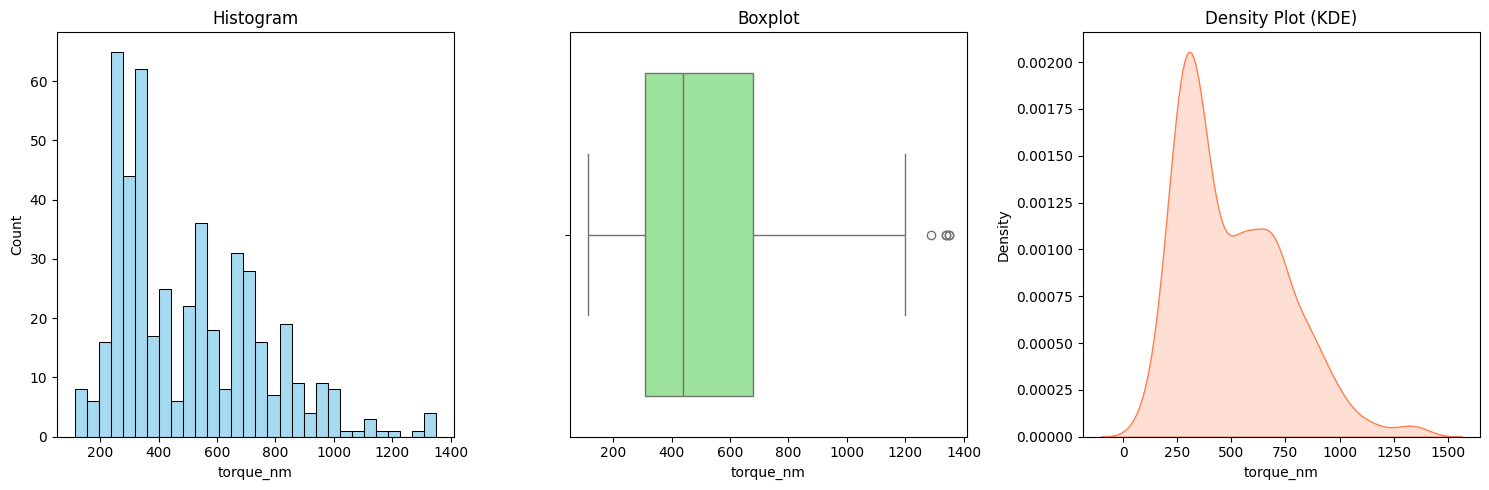

🔍 Univariate Analysis for: efficiency_wh_per_km

📌 Summary Statistics:


count    476.000000
mean     162.972689
std       34.354396
min      109.000000
25%      143.000000
50%      155.000000
75%      178.000000
max      370.000000
Name: efficiency_wh_per_km, dtype: float64

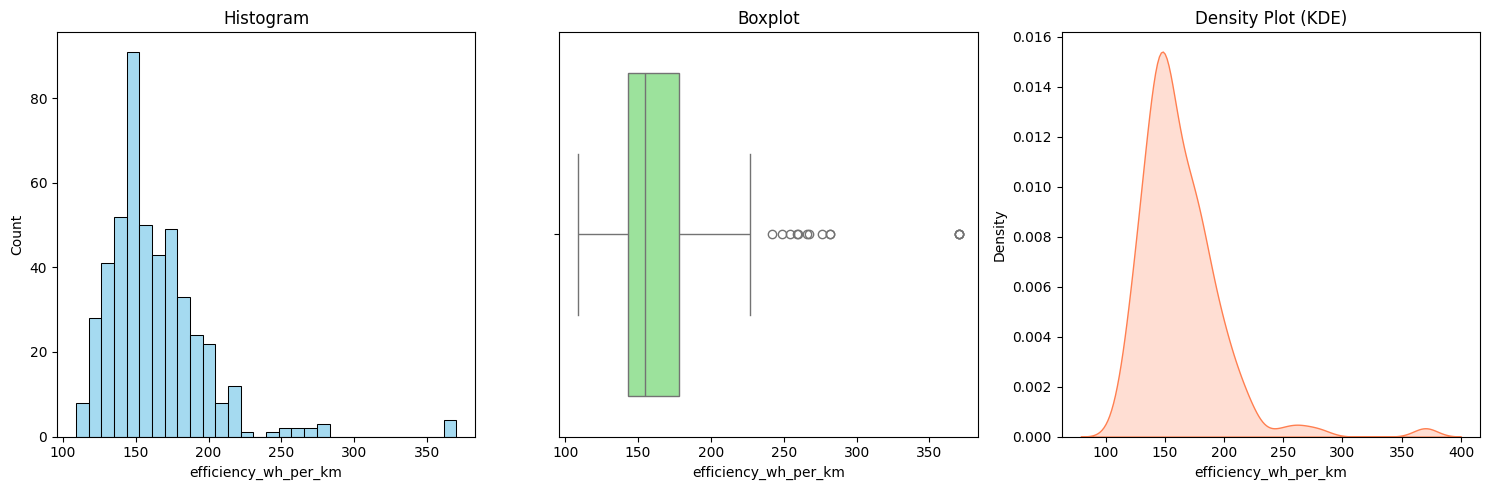

🔍 Univariate Analysis for: range_km

📌 Summary Statistics:


count    476.00000
mean     393.87605
std      102.92689
min      135.00000
25%      323.75000
50%      400.00000
75%      470.00000
max      685.00000
Name: range_km, dtype: float64

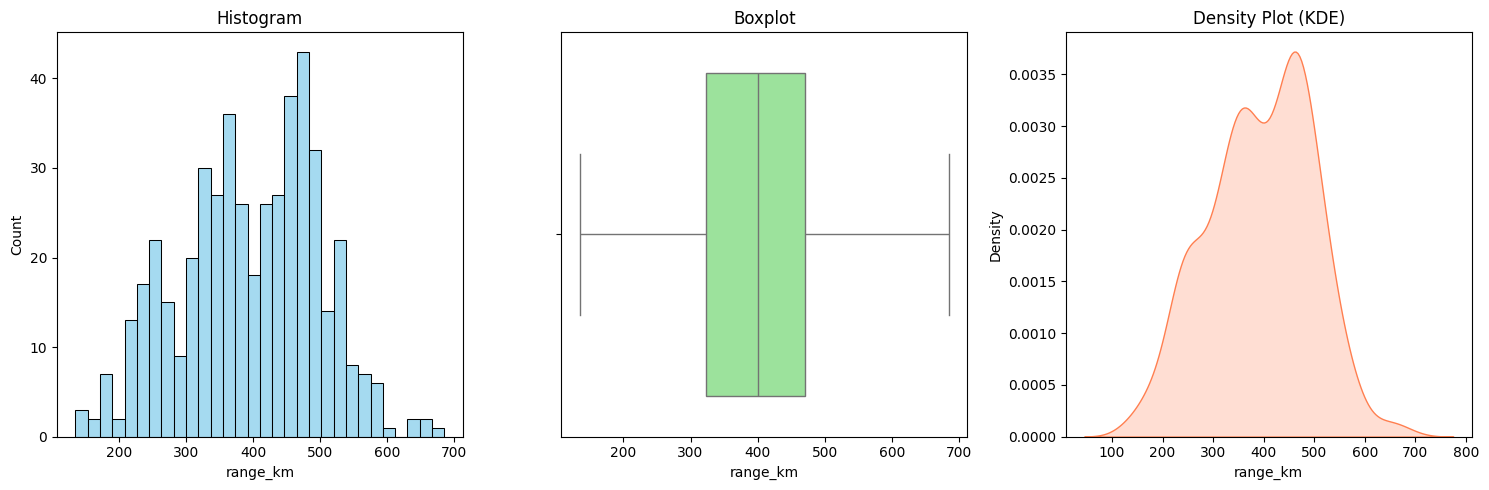

🔍 Univariate Analysis for: acceleration_0_100_s

📌 Summary Statistics:


count    476.000000
mean       6.863235
std        2.719724
min        2.200000
25%        4.800000
50%        6.600000
75%        8.200000
max       19.100000
Name: acceleration_0_100_s, dtype: float64

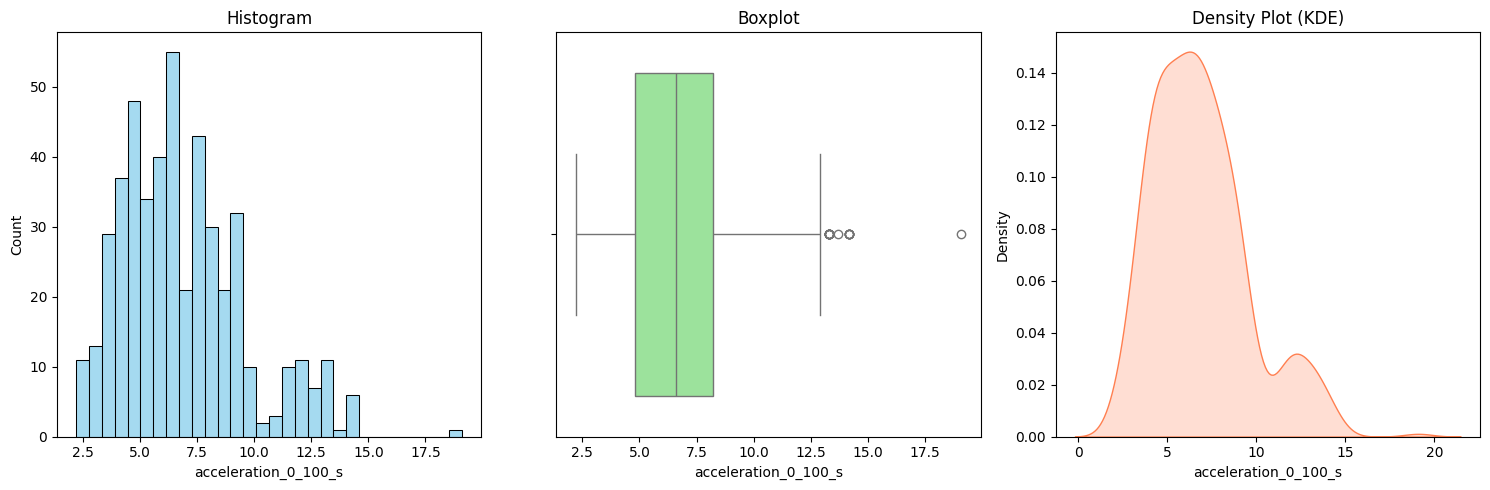

🔍 Univariate Analysis for: fast_charging_power_kw_dc

📌 Summary Statistics:


count    476.000000
mean     125.102941
std       58.229563
min       29.000000
25%       80.000000
50%      113.000000
75%      150.000000
max      281.000000
Name: fast_charging_power_kw_dc, dtype: float64

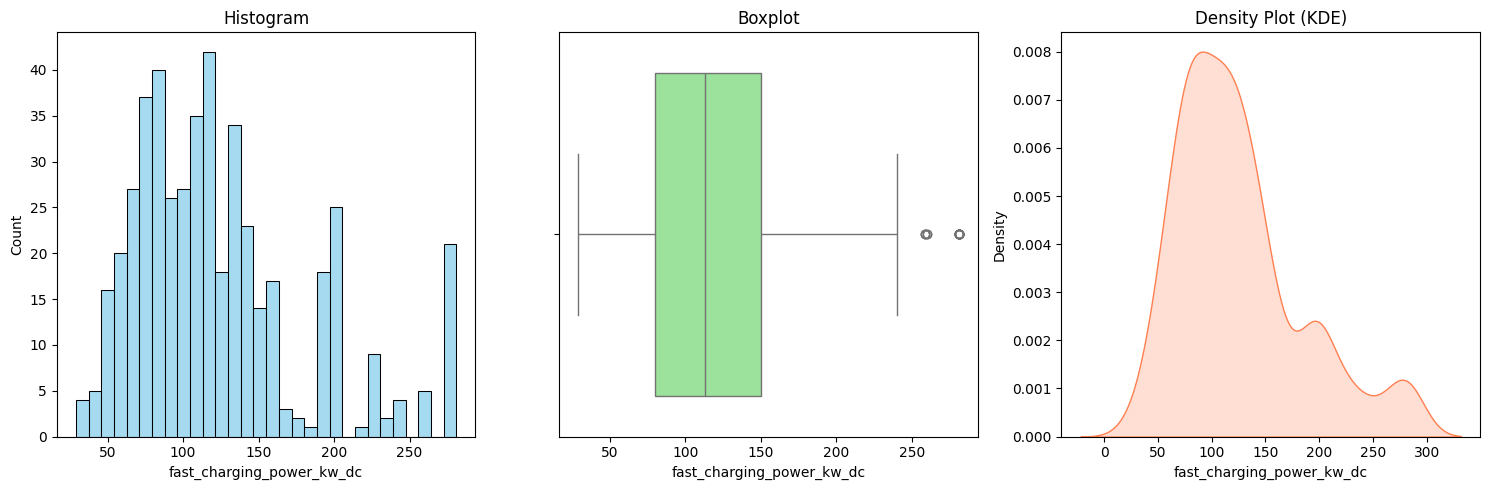

🔍 Univariate Analysis for: towing_capacity_kg

📌 Summary Statistics:


count     476.000000
mean     1033.438929
std       734.054351
min         0.000000
25%       350.000000
50%      1000.000000
75%      1600.000000
max      2500.000000
Name: towing_capacity_kg, dtype: float64

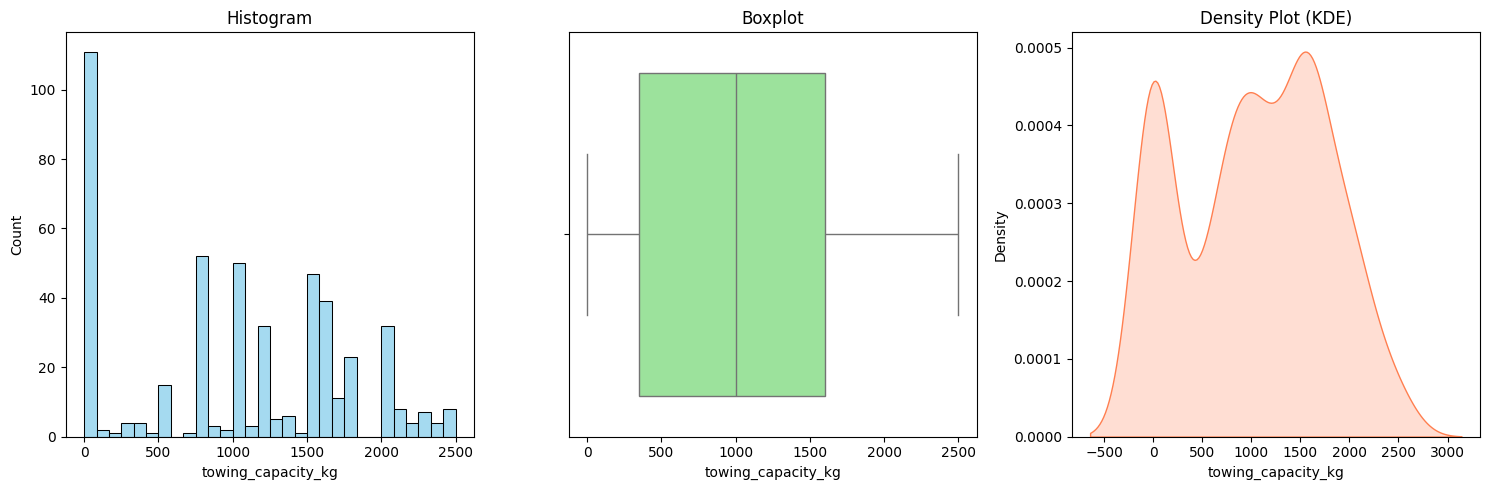

🔍 Univariate Analysis for: cargo_volume_l

📌 Summary Statistics:


count     476.000000
mean      493.483193
std       187.319850
min       151.000000
25%       385.000000
50%       470.000000
75%       545.000000
max      1410.000000
Name: cargo_volume_l, dtype: float64

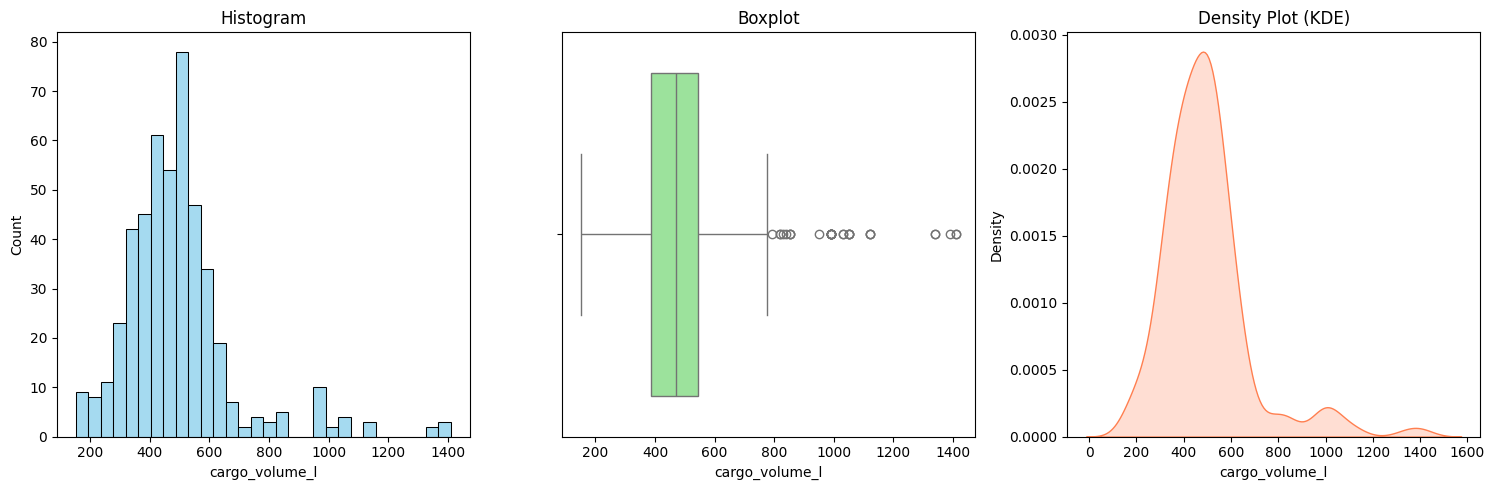

🔍 Univariate Analysis for: seats

📌 Summary Statistics:


count    476.000000
mean       5.264706
std        1.005927
min        2.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        9.000000
Name: seats, dtype: float64

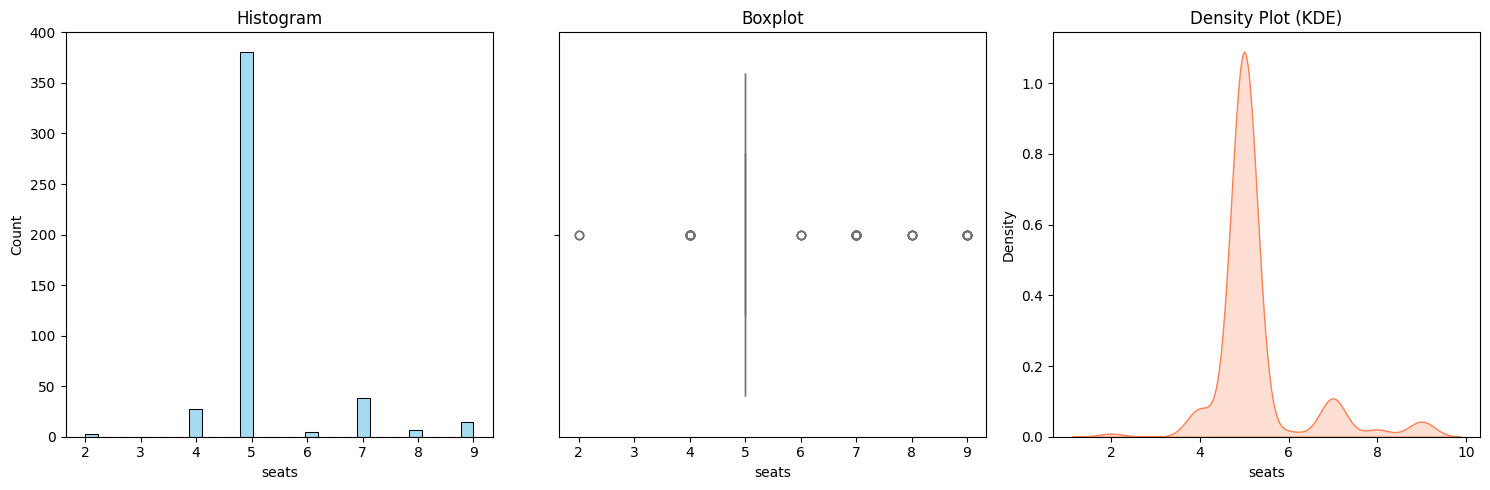

🔍 Univariate Analysis for: length_mm

📌 Summary Statistics:


count     476.000000
mean     4680.813025
std       368.014543
min      3620.000000
25%      4440.000000
50%      4720.000000
75%      4961.000000
max      5908.000000
Name: length_mm, dtype: float64

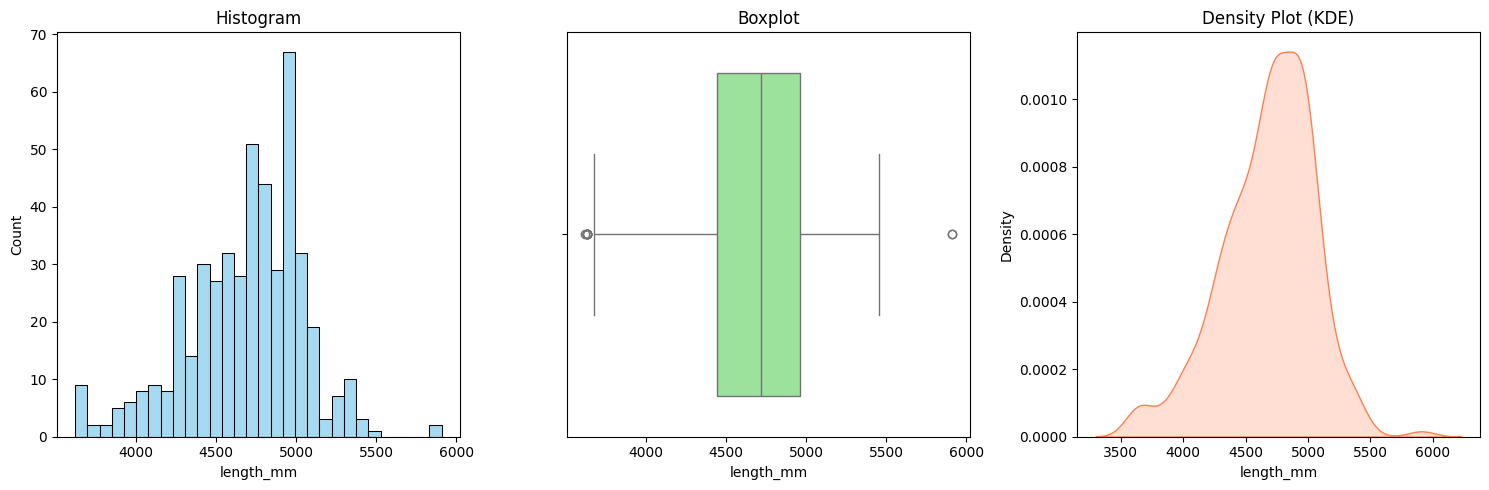

🔍 Univariate Analysis for: width_mm

📌 Summary Statistics:


count     476.000000
mean     1887.550420
std        73.719751
min      1610.000000
25%      1849.000000
50%      1890.000000
75%      1939.000000
max      2080.000000
Name: width_mm, dtype: float64

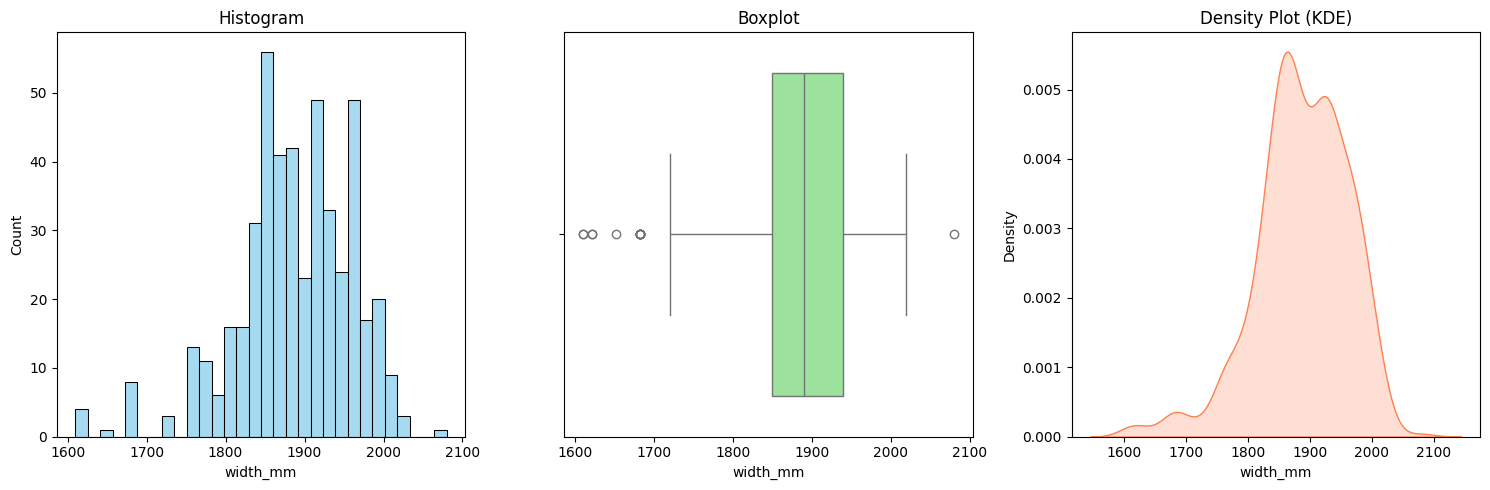

🔍 Univariate Analysis for: height_mm

📌 Summary Statistics:


count     476.000000
mean     1600.907563
std       130.553413
min      1329.000000
25%      1514.000000
50%      1596.000000
75%      1665.000000
max      1986.000000
Name: height_mm, dtype: float64

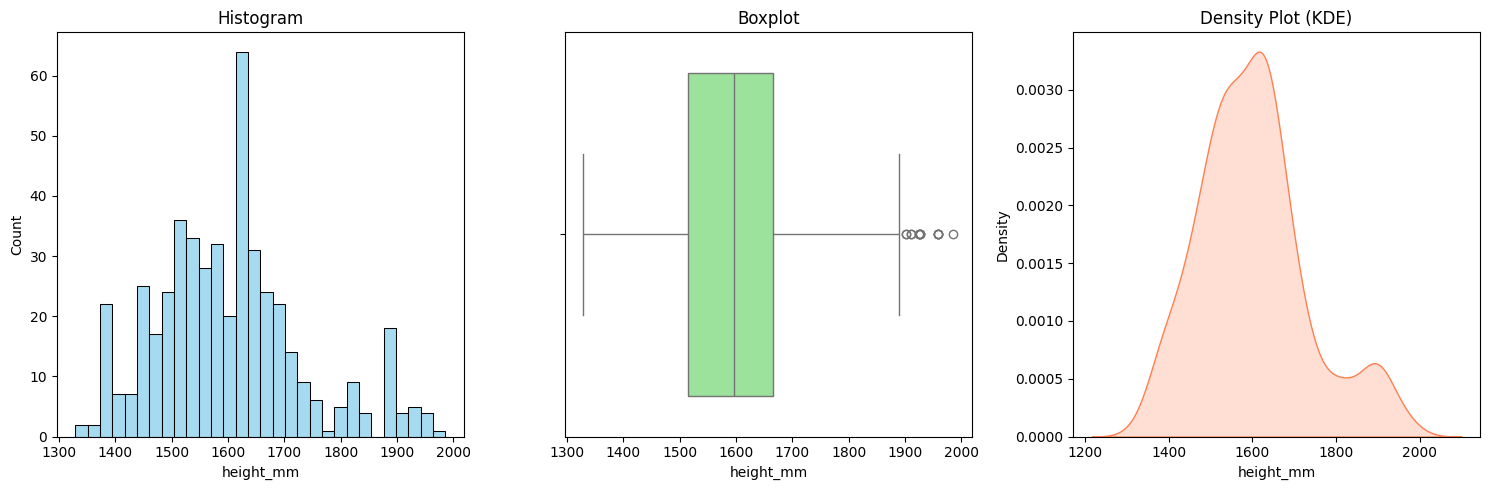

🧩 Starting Univariate Analysis for CATEGORICAL Columns...

🔍 Univariate Analysis for: brand

📌 Value Counts (Top 15 shown if too many):


brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             21
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Kia              16
Hyundai          14
Opel             14
MG               12
Citroen          12
Name: count, dtype: int64

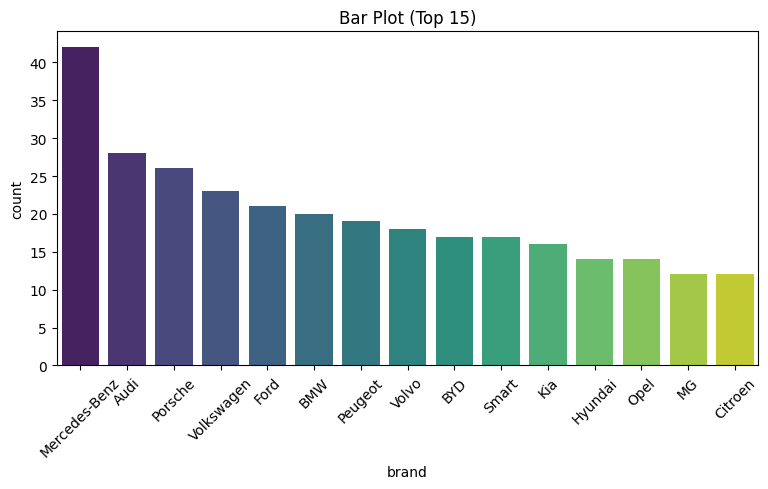

🔍 Univariate Analysis for: battery_type

📌 Value Counts (Top 15 shown if too many):


battery_type
Lithium-ion    476
Name: count, dtype: int64

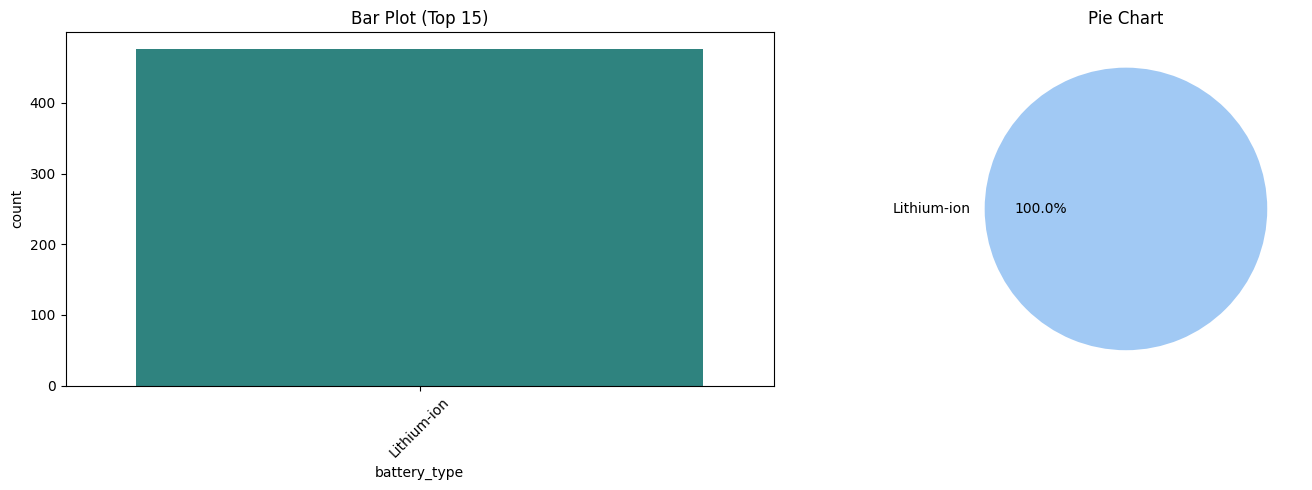

🔍 Univariate Analysis for: fast_charge_port

📌 Value Counts (Top 15 shown if too many):


fast_charge_port
CCS        475
CHAdeMO      1
Name: count, dtype: int64

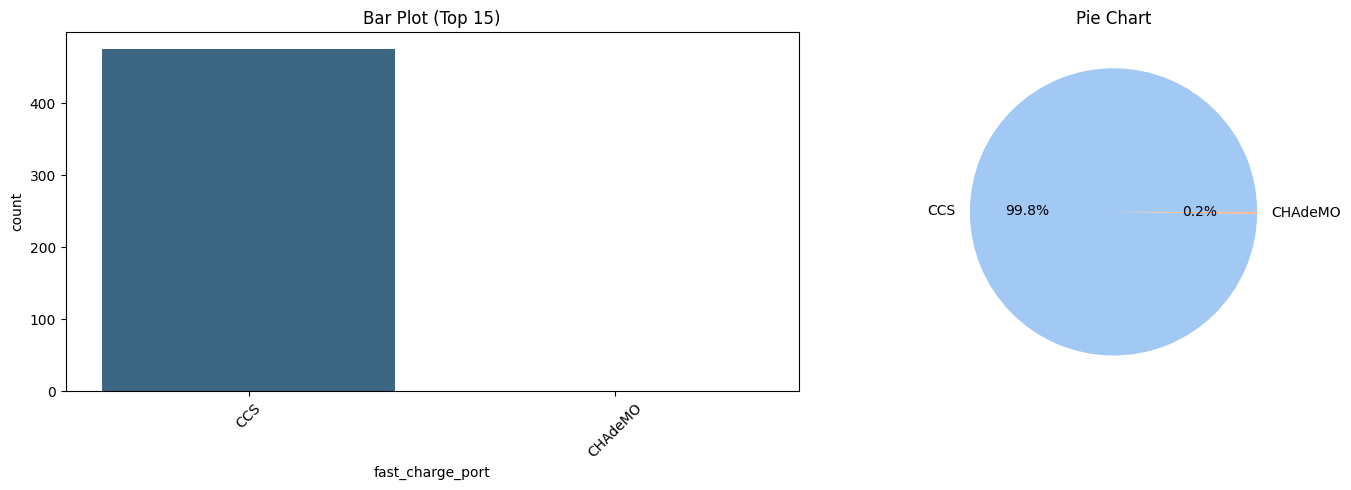

🔍 Univariate Analysis for: drivetrain

📌 Value Counts (Top 15 shown if too many):


drivetrain
AWD    191
FWD    154
RWD    131
Name: count, dtype: int64

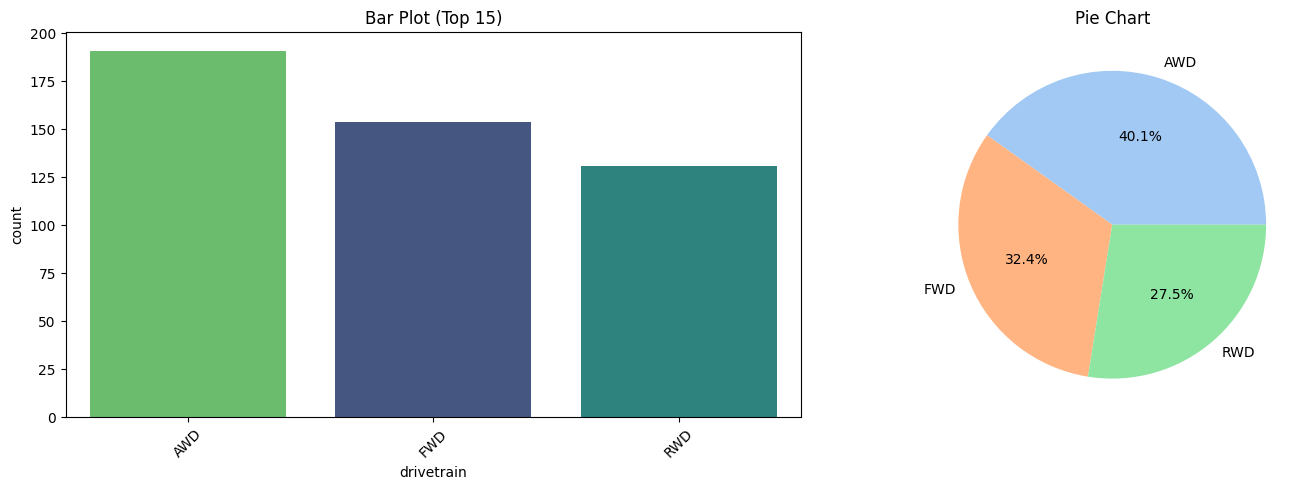

🔍 Univariate Analysis for: segment

📌 Value Counts (Top 15 shown if too many):


segment
JC - Medium          91
JD - Large           58
F - Luxury           51
N - Passenger Van    46
JB - Compact         44
C - Medium           34
E - Executive        30
JF - Luxury          30
D - Large            28
B - Compact          28
JE - Executive       28
A - Mini              3
JA - Mini             2
G - Sports            2
I - Luxury            1
Name: count, dtype: int64

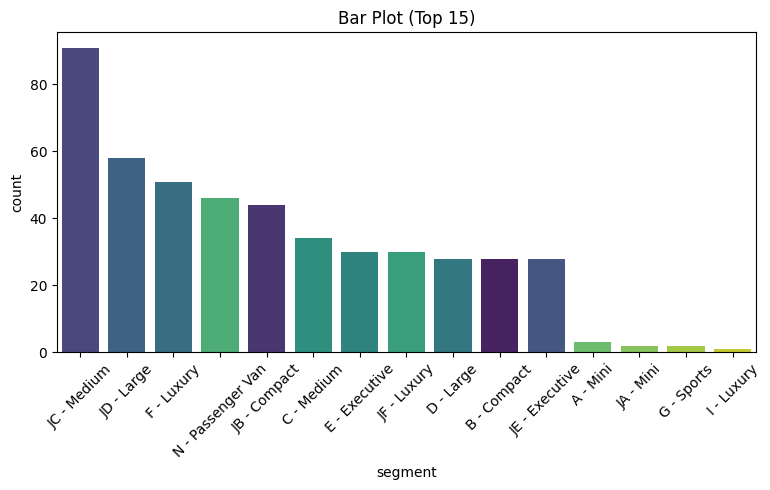

🔍 Univariate Analysis for: car_body_type

📌 Value Counts (Top 15 shown if too many):


car_body_type
SUV                    244
Sedan                   63
Hatchback               56
Small Passenger Van     46
Liftback Sedan          33
Station/Estate          27
Cabriolet                5
Coupe                    2
Name: count, dtype: int64

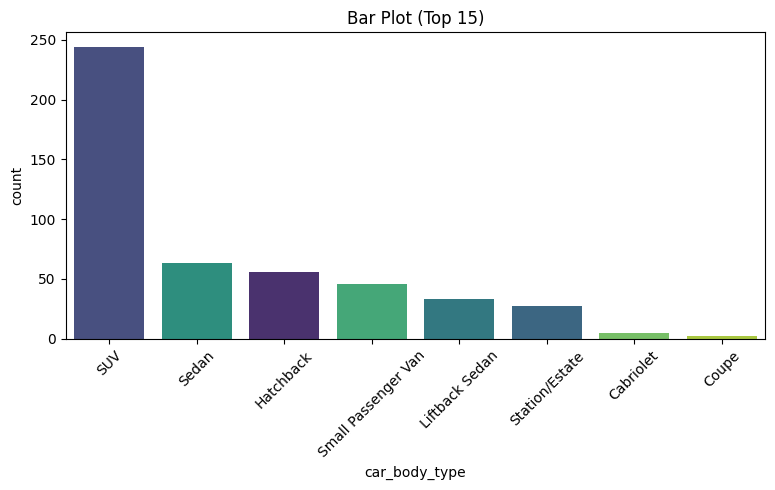

In [6]:
run_univariate_analysis(df)


## Bivariate Analysis

### Numerical vs Numerical

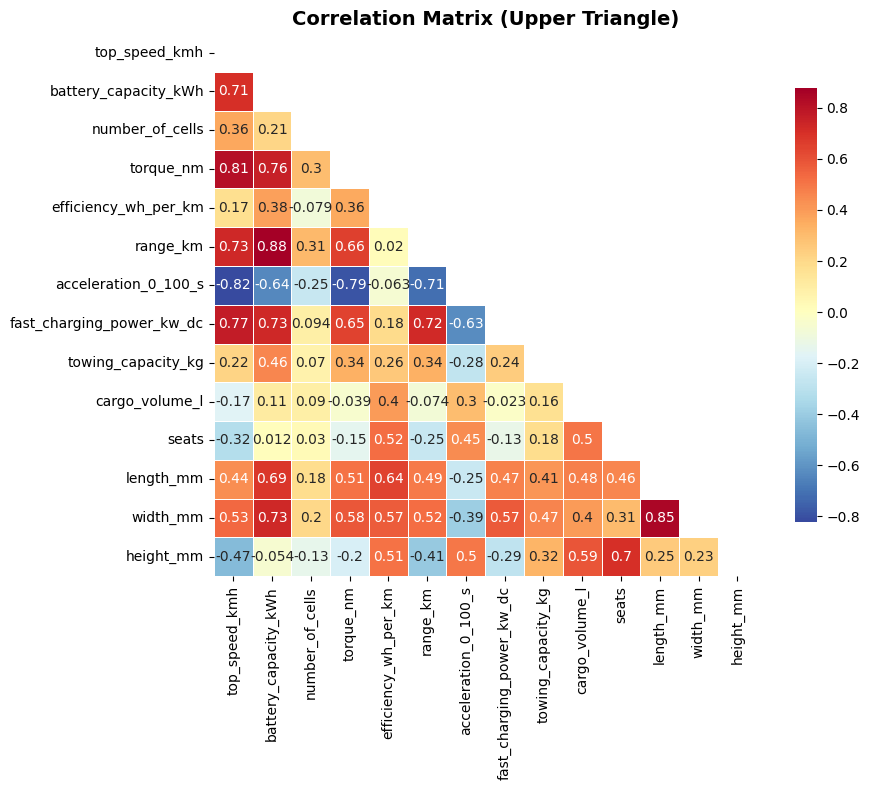

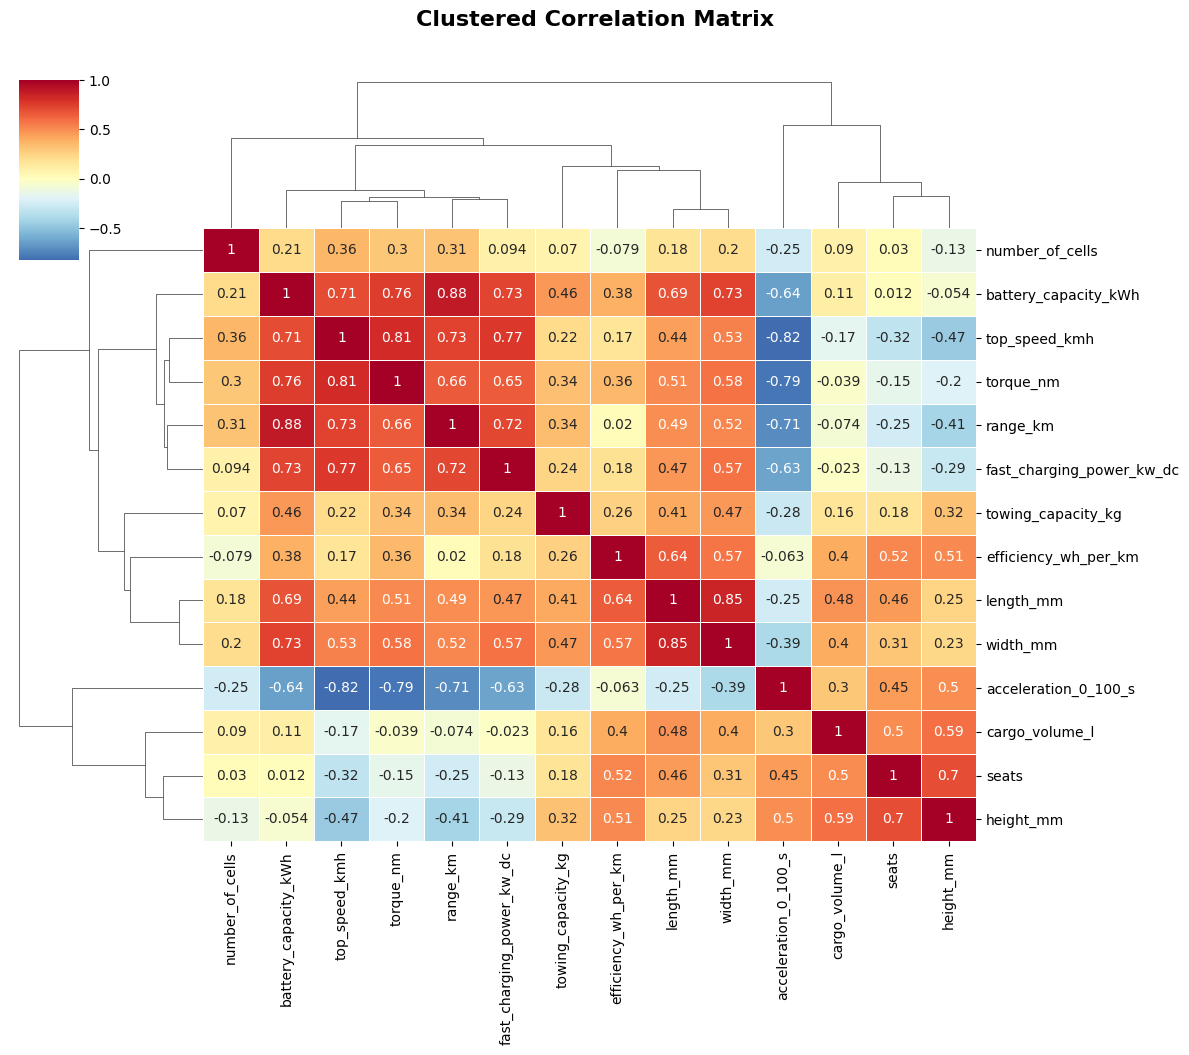


Top 10 Strongest Correlations:
--------------------------------------------------
battery_capacity_kWh <-> range_km: 0.879
length_mm <-> width_mm: 0.850
top_speed_kmh <-> acceleration_0_100_s: -0.822
top_speed_kmh <-> torque_nm: 0.814
torque_nm <-> acceleration_0_100_s: -0.791
top_speed_kmh <-> fast_charging_power_kw_dc: 0.772
battery_capacity_kWh <-> torque_nm: 0.756
battery_capacity_kWh <-> width_mm: 0.732
top_speed_kmh <-> range_km: 0.730
battery_capacity_kWh <-> fast_charging_power_kw_dc: 0.728


In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()
        
# Standard heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))  # Just set figure size
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (Upper Triangle)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()



g = sns.clustermap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, linewidths=0.5, figsize=(12, 10), square=True)
g.figure.suptitle('Clustered Correlation Matrix', fontweight='bold', fontsize=16, y=1.05)
plt.show()

        
# Find strongest correlations
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'var1': corr_matrix.columns[i],
            'var2': corr_matrix.columns[j],
            'correlation': corr_matrix.iloc[i, j],
            'abs_correlation': abs(corr_matrix.iloc[i, j])
        })
        
corr_df = pd.DataFrame(corr_pairs).sort_values('abs_correlation', ascending=False)
        
print("\nTop 10 Strongest Correlations:")
print("-" * 50)
for _, row in corr_df.head(10).iterrows():
    print(f"{row['var1']} <-> {row['var2']}: {row['correlation']:.3f}")

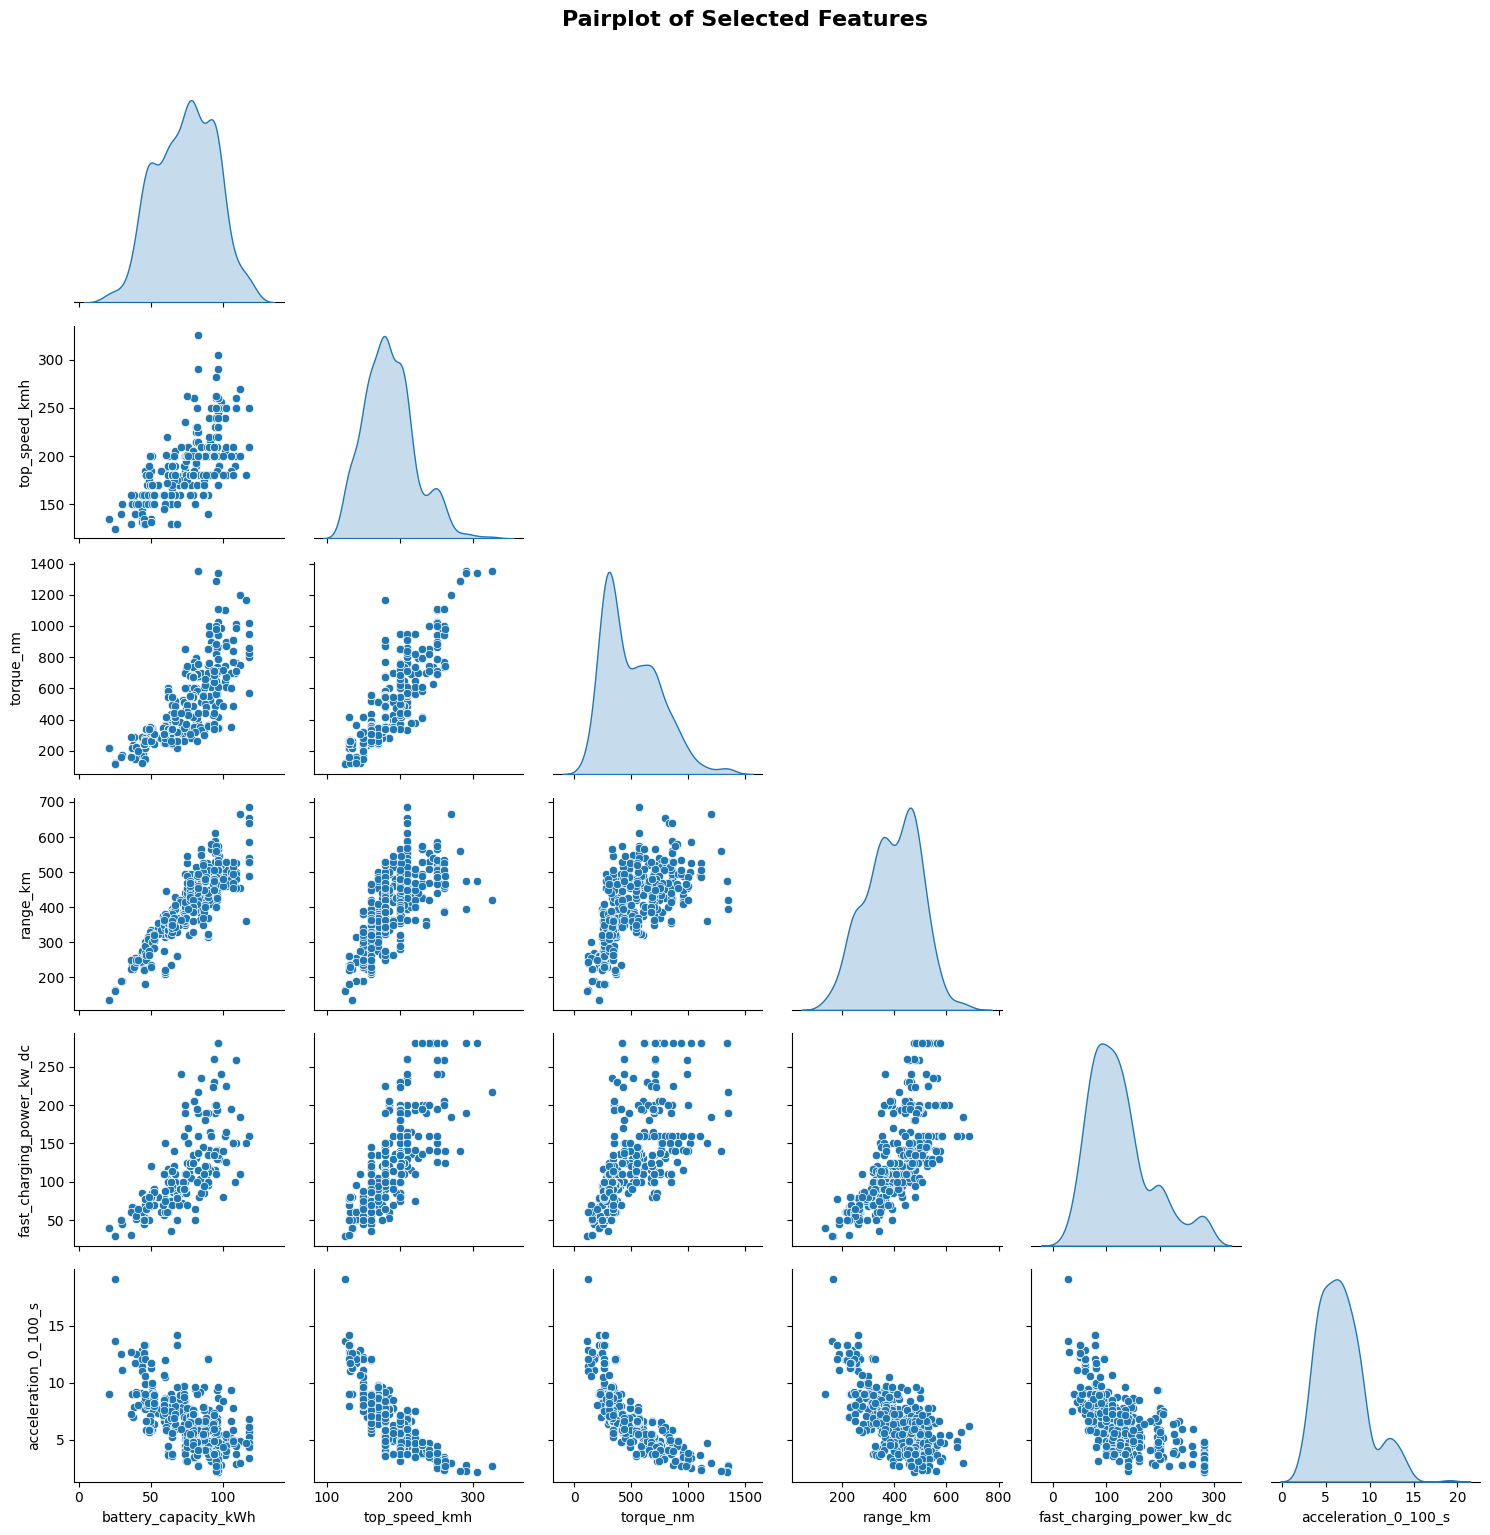

In [8]:
selected_columns = [
    'battery_capacity_kWh',
    'top_speed_kmh',
    'torque_nm',
    'range_km',
    'fast_charging_power_kw_dc',
    'acceleration_0_100_s'
]

sns.pairplot(df[selected_columns], corner=True, diag_kind='kde')  # `corner=True` shows only lower triangle
plt.suptitle('Pairplot of Selected Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Categorical vs Categorical

In [9]:
# Viable categorical columns
categorical_cols = ['brand', 'drivetrain', 'segment', 'car_body_type']

# All possible pairs
categorical_pairs = list(combinations(categorical_cols, 2))
print("Categorical pairs for analysis:")
for pair in categorical_pairs:
    print(f"- {pair[0]} vs {pair[1]}")

# Total pairs: 6 combinations

Categorical pairs for analysis:
- brand vs drivetrain
- brand vs segment
- brand vs car_body_type
- drivetrain vs segment
- drivetrain vs car_body_type
- segment vs car_body_type


In [10]:
df['brand'].value_counts()

brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             21
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Kia              16
Hyundai          14
Opel             14
MG               12
Citroen          12
Skoda            12
NIO              12
Tesla            11
Renault          10
Polestar          9
XPENG             9
Zeekr             9
Mini              8
Fiat              8
Toyota            7
Lotus             6
GWM               6
Nissan            6
CUPRA             5
DS                5
Genesis           5
Abarth            4
Lexus             3
Maserati          3
Lucid             3
Hongqi            3
Dacia             2
Alpine            2
Leapmotor         2
Alfa              2
Aiways            2
Jeep              2
Dongfeng          2
VinFast           2
Mazda             2
Skywell           2
KGM               1
Elaris            1
Cadillac          1
Jaguar        

### Chi-square Test Summary
This test is done for every pair of features below.

- **Purpose**: Tests if two **categorical variables** are related.
- **Chi-square statistic**: Measures how different observed data is from what we'd expect if variables were independent.
- **Higher Chi-square** = Stronger evidence of association.
- **P-value**: Probability that the observed relationship is due to **chance**.
  - **Low p-value (e.g., < 0.05)** → Significant result → Real relationship.
  - **High p-value (e.g., ≥ 0.05)** → Not significant → Could be random.
- **Used for**: Market research



ANALYSIS 1: BRAND vs DRIVETRAIN


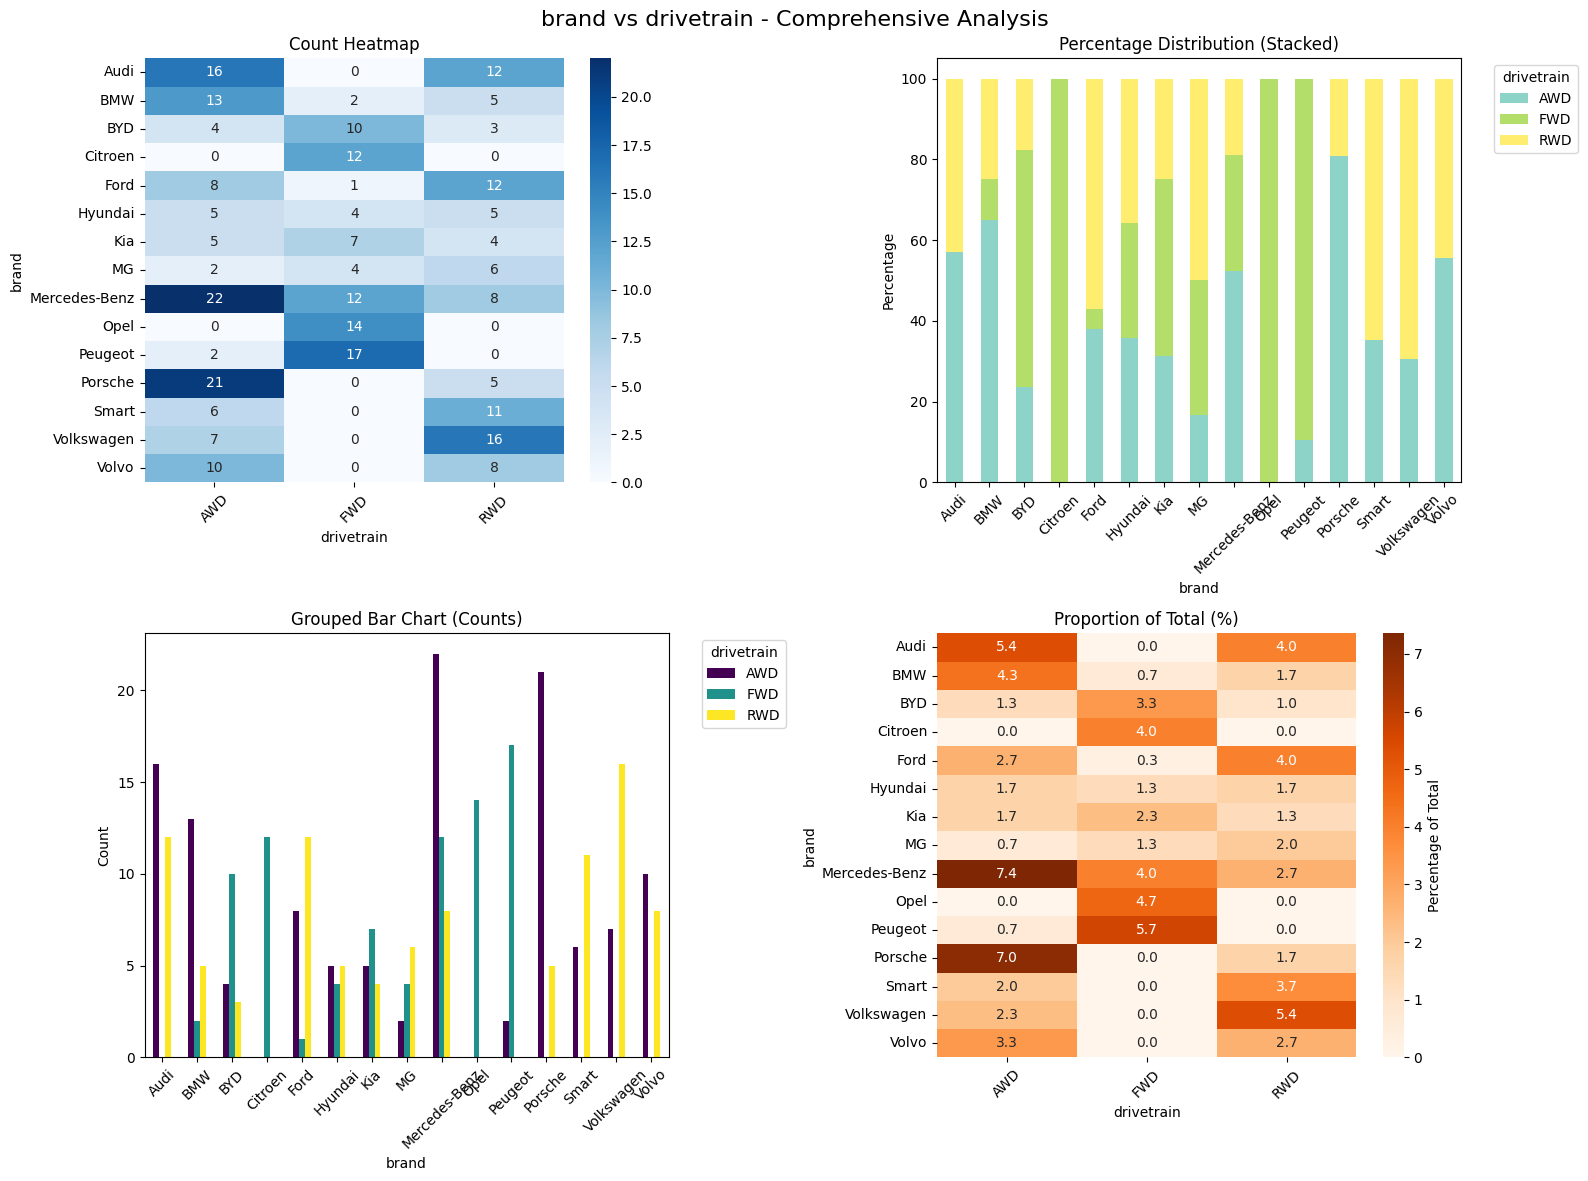

Chi-square Test Results:
Chi-square statistic: 199.4311
P-value: 0.0000
Degrees of freedom: 28
✓ Significant association between variables (p < 0.05)
Note: Analysis limited to top 15 brands by frequency

ANALYSIS 2: BRAND vs SEGMENT


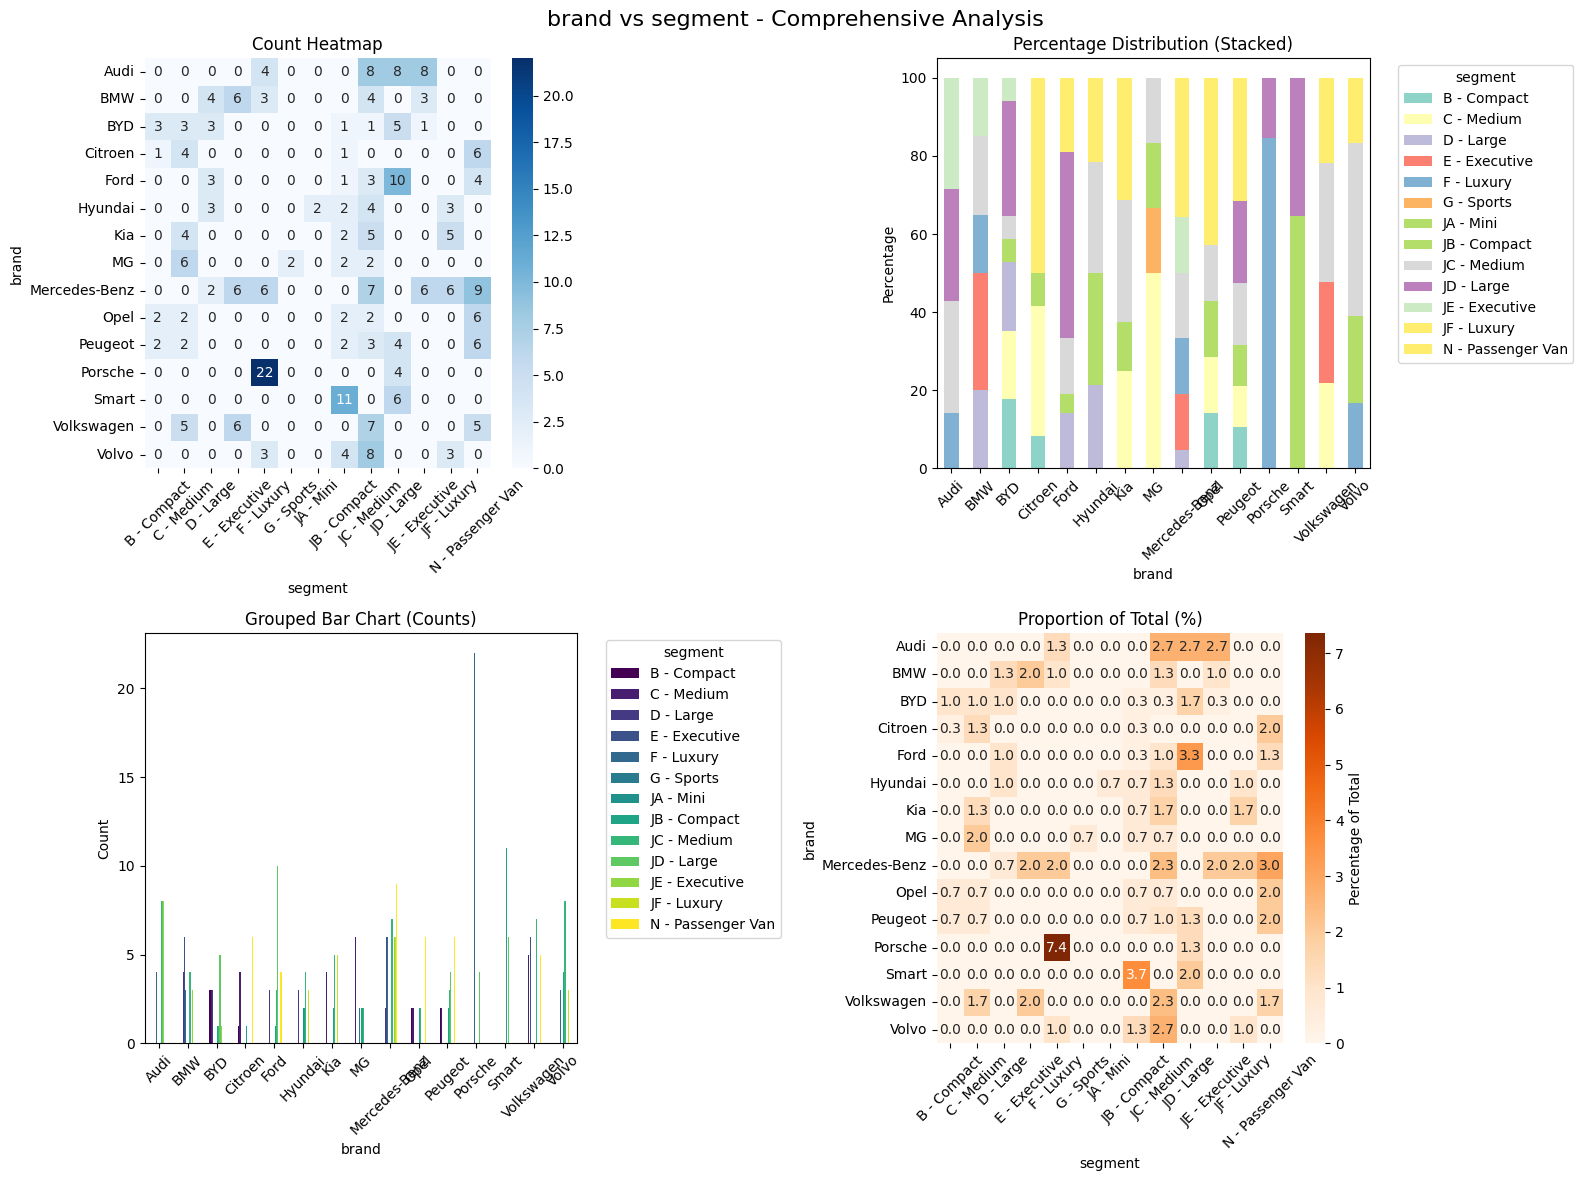

Chi-square Test Results:
Chi-square statistic: 700.9973
P-value: 0.0000
Degrees of freedom: 168
✓ Significant association between variables (p < 0.05)
Note: Analysis limited to top 15 brands by frequency

ANALYSIS 3: BRAND vs CAR_BODY_TYPE


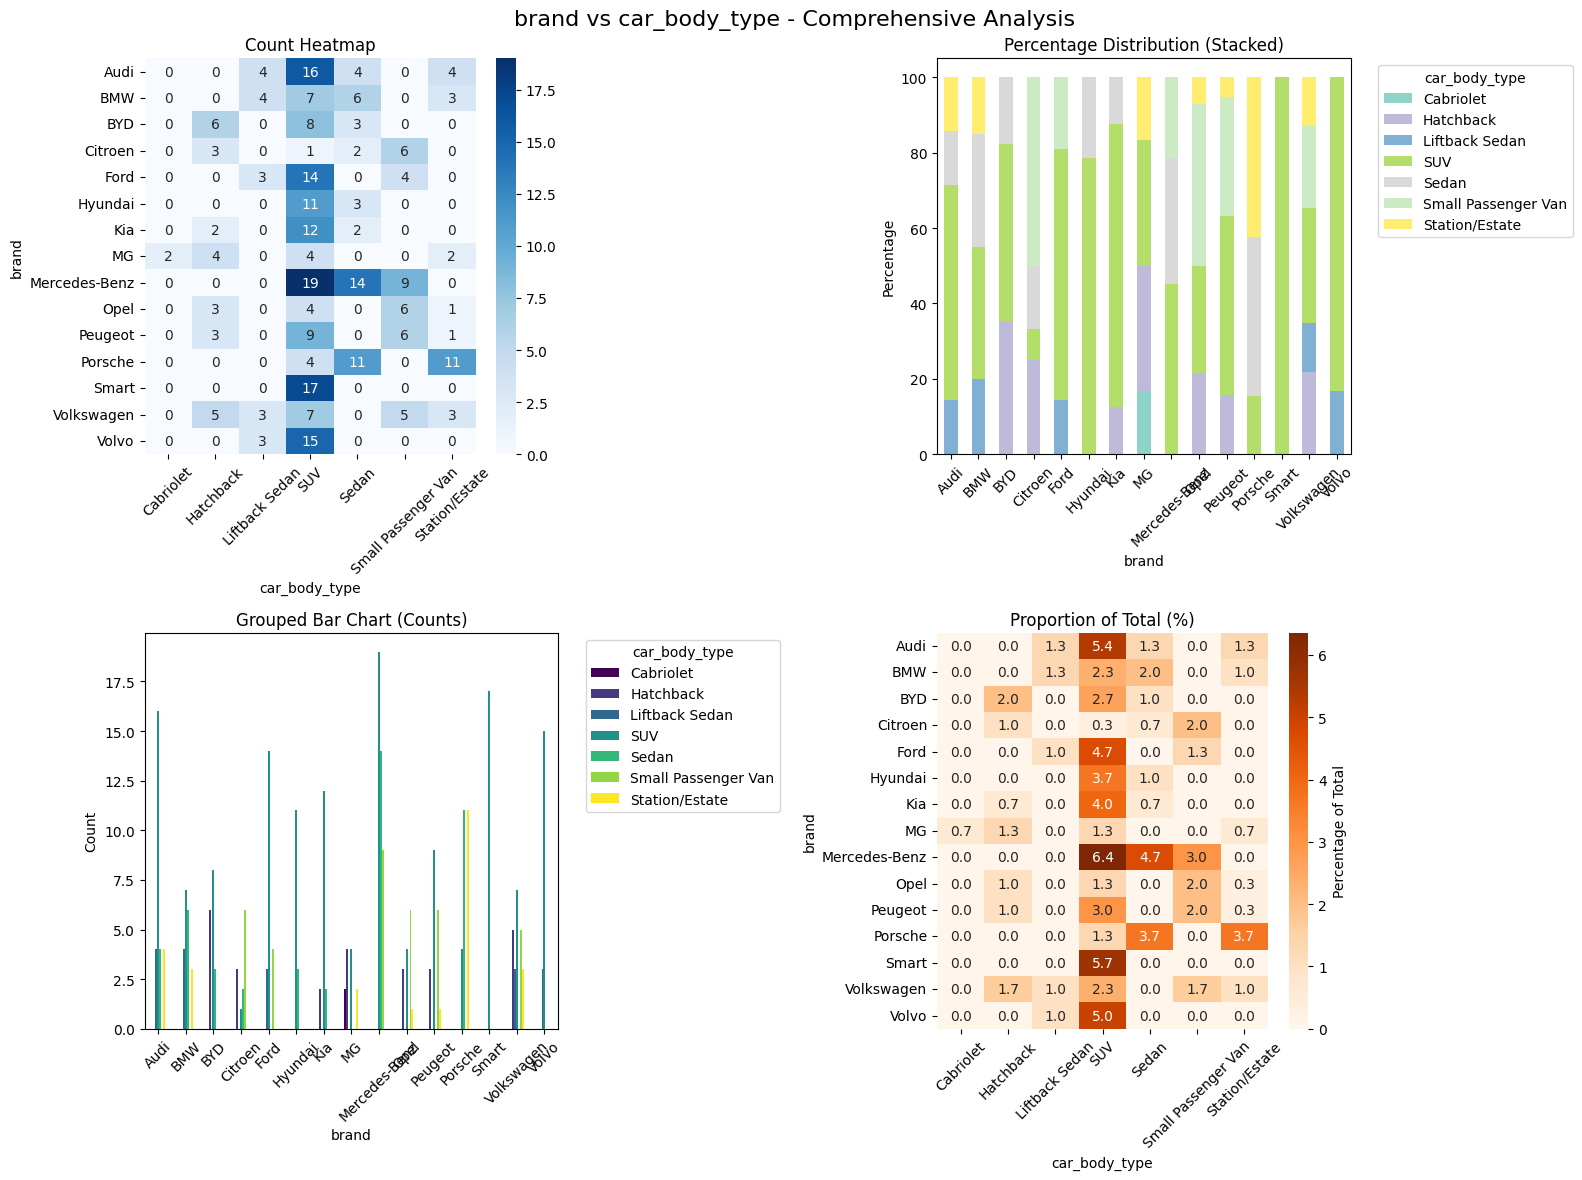

Chi-square Test Results:
Chi-square statistic: 317.2769
P-value: 0.0000
Degrees of freedom: 84
✓ Significant association between variables (p < 0.05)
Note: Analysis limited to top 15 brands by frequency

ANALYSIS 4: DRIVETRAIN vs SEGMENT


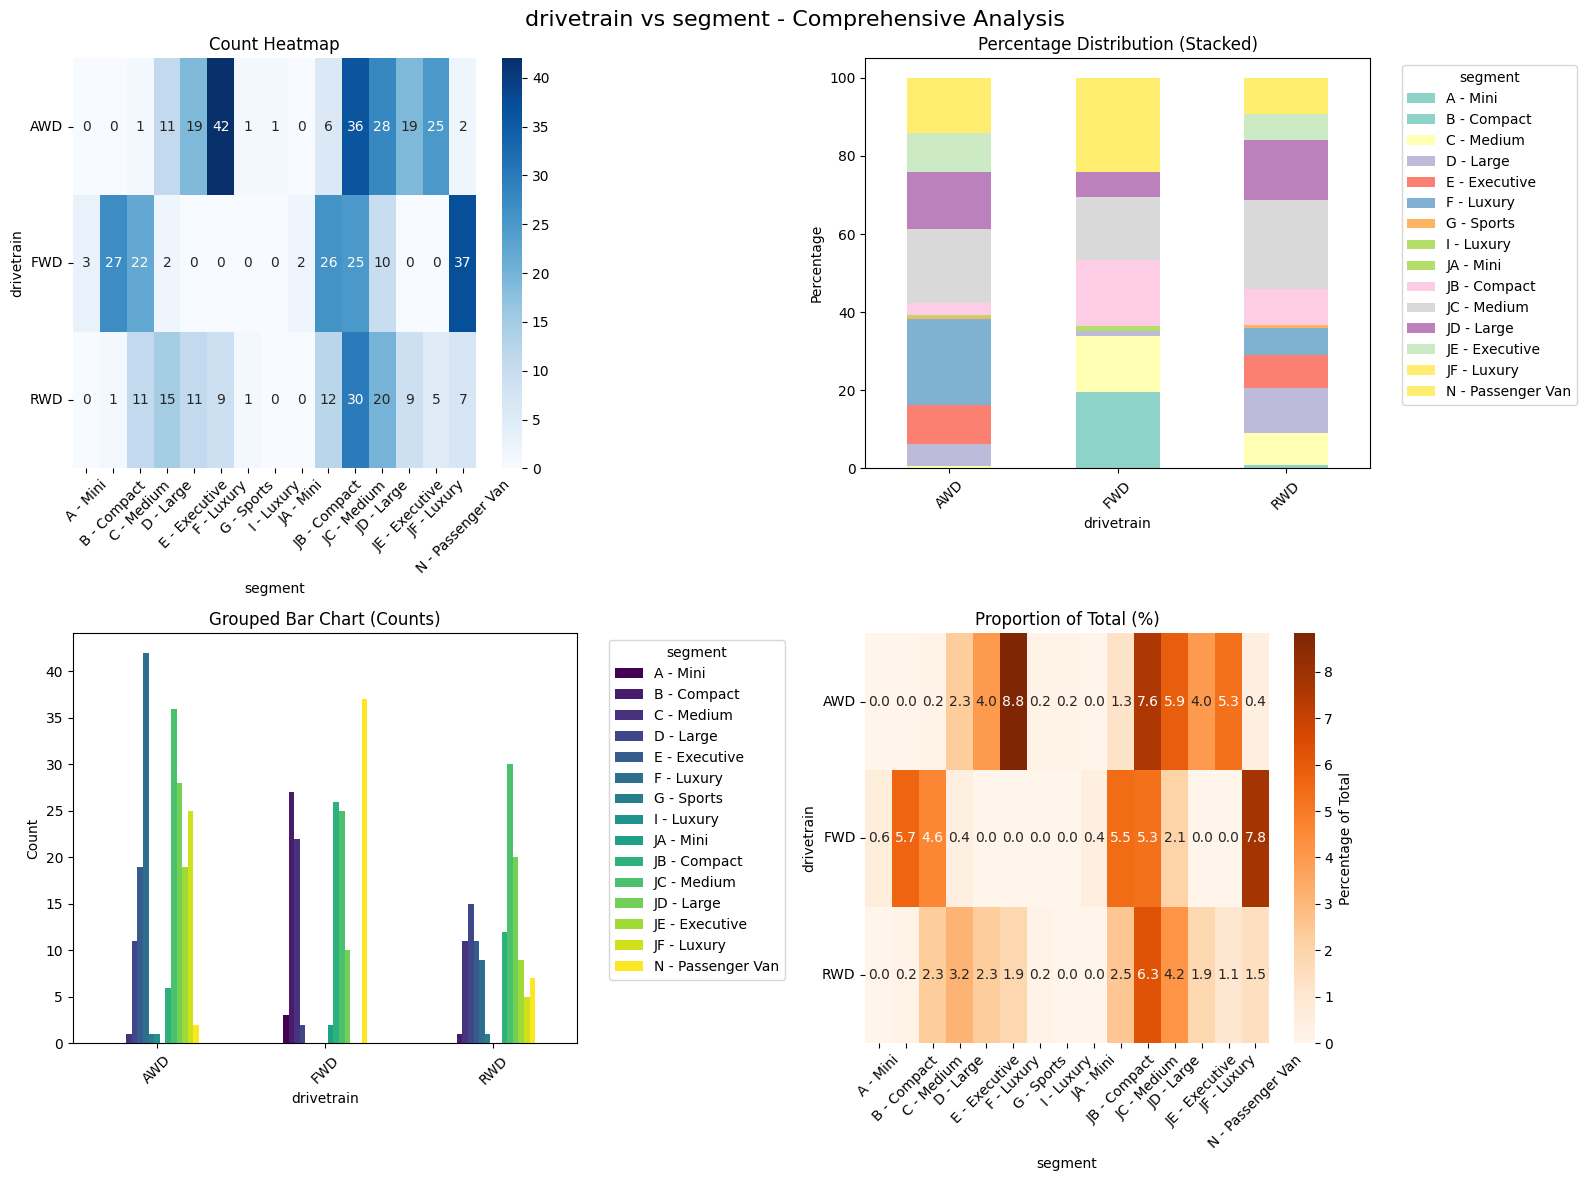

Chi-square Test Results:
Chi-square statistic: 271.4589
P-value: 0.0000
Degrees of freedom: 28
✓ Significant association between variables (p < 0.05)

ANALYSIS 5: DRIVETRAIN vs CAR_BODY_TYPE


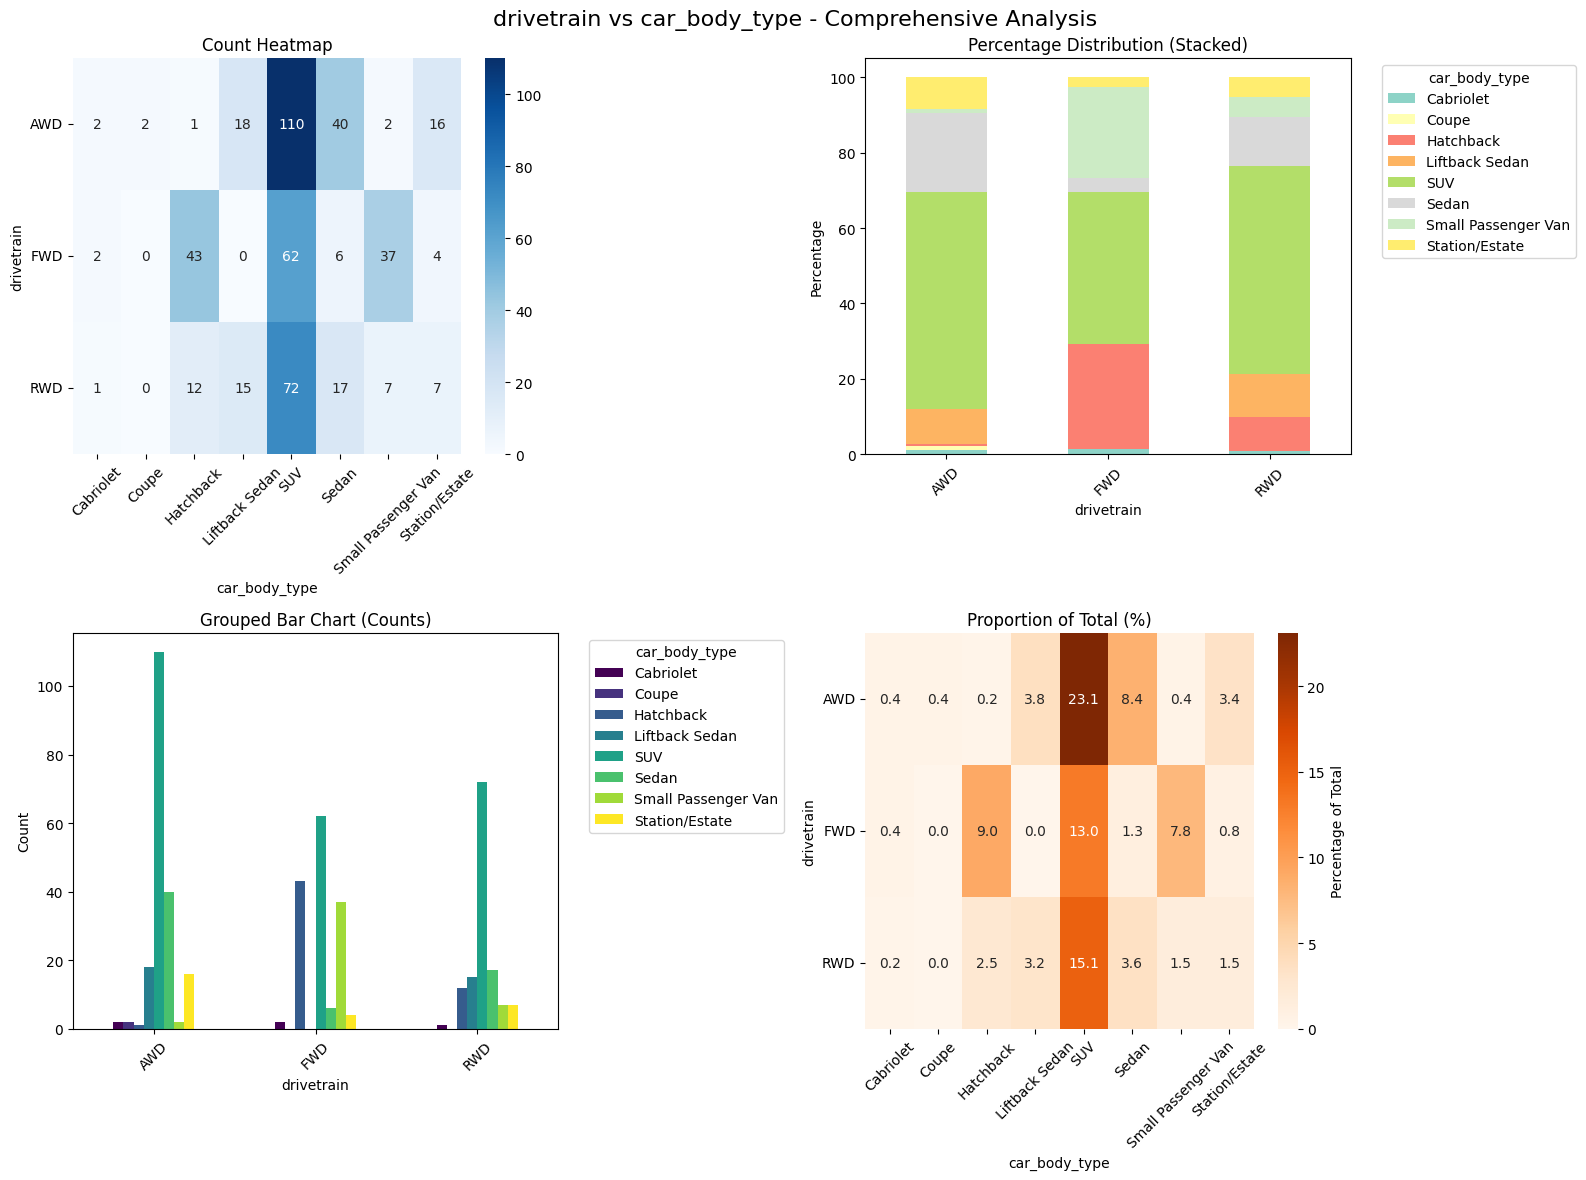

Chi-square Test Results:
Chi-square statistic: 154.2006
P-value: 0.0000
Degrees of freedom: 14
✓ Significant association between variables (p < 0.05)

ANALYSIS 6: SEGMENT vs CAR_BODY_TYPE


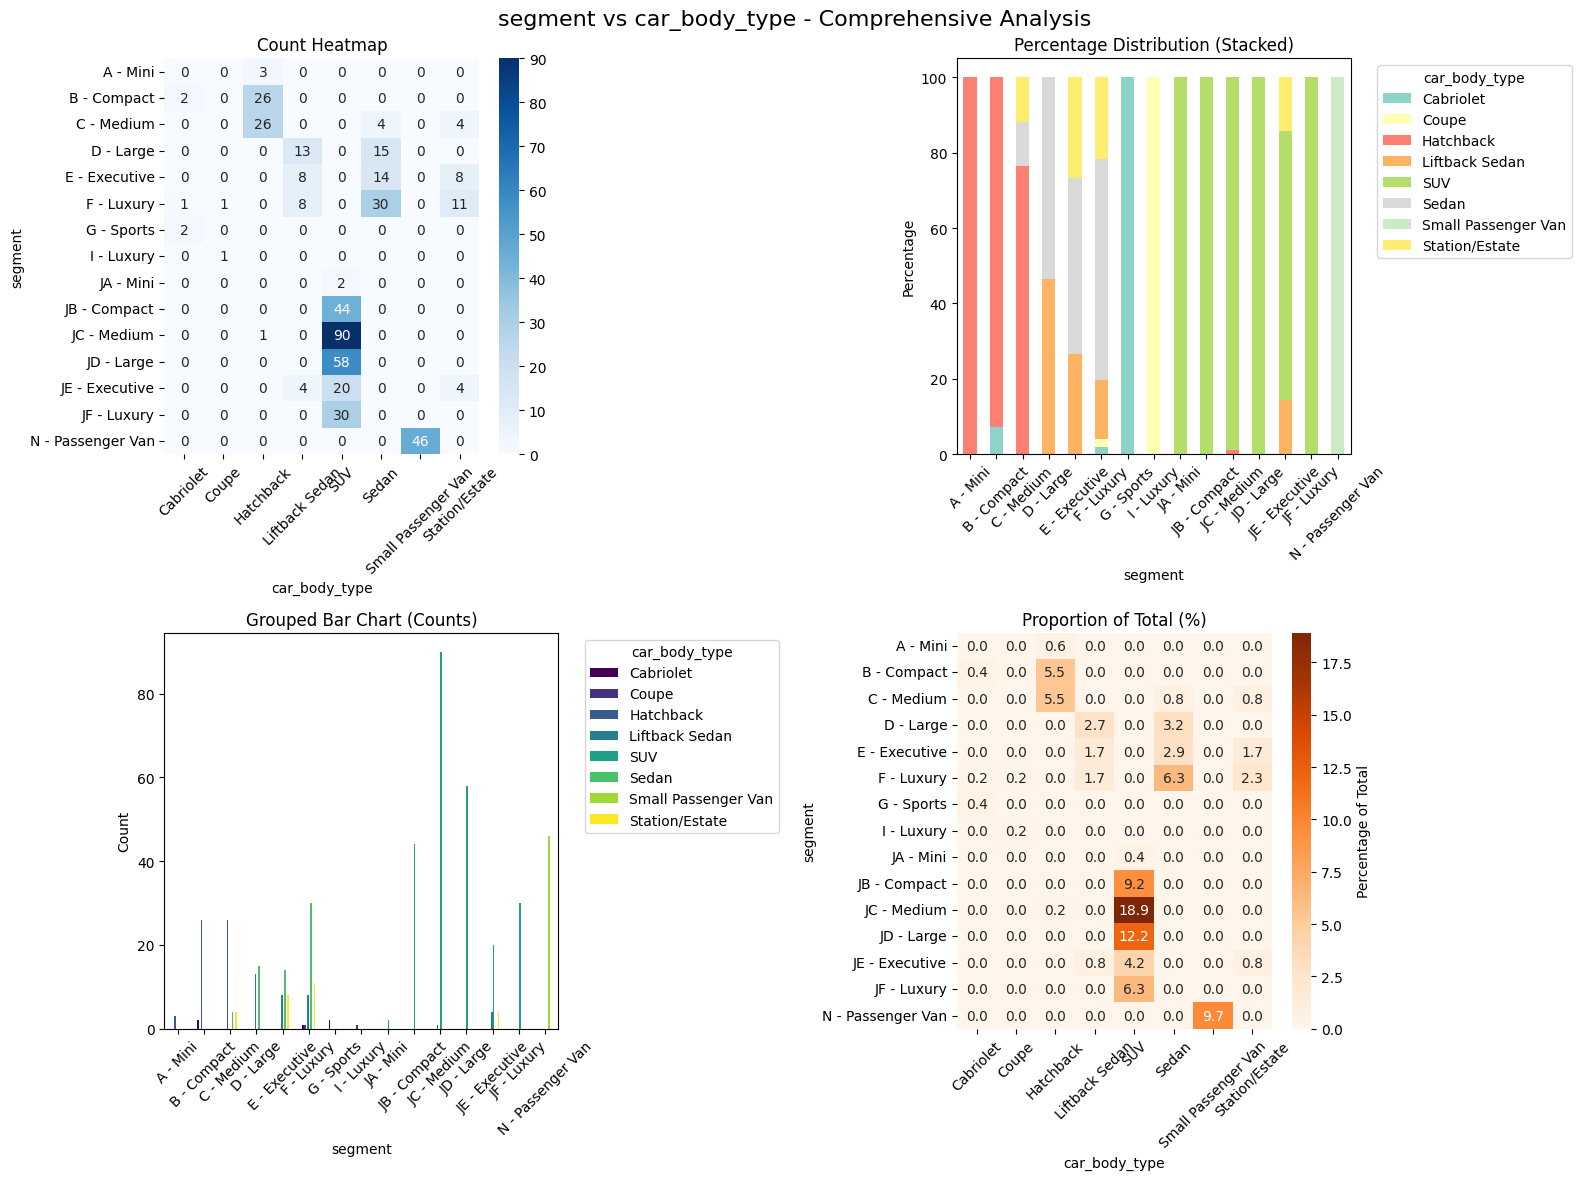

Chi-square Test Results:
Chi-square statistic: 1800.2134
P-value: 0.0000
Degrees of freedom: 98
✓ Significant association between variables (p < 0.05)


In [11]:
def plot_categorical_bivariate(df, cat_pairs, top_n_brands=10):
   """
   Create comprehensive bivariate plots for categorical variables
   """
   # Filter to top N brands to avoid overcrowding
   top_brands = df['brand'].value_counts().head(top_n_brands).index
   df_filtered = df[df['brand'].isin(top_brands)].copy()
   
   n_pairs = len(cat_pairs)
   
   for i, (var1, var2) in enumerate(cat_pairs):
       print(f"\n{'='*100}")
       print(f"ANALYSIS {i+1}: {var1.upper()} vs {var2.upper()}")
       print(f"{'='*100}")
       
       # Use filtered data if either variable is 'brand'
       data_to_use = df_filtered if (var1 == 'brand' or var2 == 'brand') else df
       
       # Create figure with multiple subplot types
       fig, axes = plt.subplots(2, 2, figsize=(16, 12))
       fig.suptitle(f'{var1} vs {var2} - Comprehensive Analysis', fontsize=16, y=0.98)
       
       # 1. Crosstab Heatmap
       crosstab = pd.crosstab(data_to_use[var1], data_to_use[var2])
       sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
       axes[0,0].set_title('Count Heatmap')
       axes[0,0].tick_params(axis='x', rotation=45)
       axes[0,0].tick_params(axis='y', rotation=0)
       
       # 2. Stacked Bar Chart
       crosstab_pct = pd.crosstab(data_to_use[var1], data_to_use[var2], normalize='index') * 100
       crosstab_pct.plot(kind='bar', stacked=True, ax=axes[0,1], 
                        colormap='Set3', legend=True)
       axes[0,1].set_title('Percentage Distribution (Stacked)')
       axes[0,1].set_xlabel(var1)
       axes[0,1].set_ylabel('Percentage')
       axes[0,1].tick_params(axis='x', rotation=45)
       axes[0,1].legend(title=var2, bbox_to_anchor=(1.05, 1), loc='upper left')
       
       # 3. Grouped Bar Chart
       crosstab.plot(kind='bar', ax=axes[1,0], colormap='viridis')
       axes[1,0].set_title('Grouped Bar Chart (Counts)')
       axes[1,0].set_xlabel(var1)
       axes[1,0].set_ylabel('Count')
       axes[1,0].tick_params(axis='x', rotation=45)
       axes[1,0].legend(title=var2, bbox_to_anchor=(1.05, 1), loc='upper left')
       
       # 4. Mosaic-style plot (using proportional rectangles)
       crosstab_prop = pd.crosstab(data_to_use[var1], data_to_use[var2], normalize='all') * 100
       sns.heatmap(crosstab_prop, annot=True, fmt='.1f', cmap='Oranges', 
                  ax=axes[1,1], cbar_kws={'label': 'Percentage of Total'})
       axes[1,1].set_title('Proportion of Total (%)')
       axes[1,1].tick_params(axis='x', rotation=45)
       axes[1,1].tick_params(axis='y', rotation=0)
       
       plt.tight_layout()
       plt.show()
       
       # Chi-square test only (no crosstab printing)
       from scipy.stats import chi2_contingency
       chi2, p_value, dof, expected = chi2_contingency(crosstab)
       print(f"Chi-square Test Results:")
       print(f"Chi-square statistic: {chi2:.4f}")
       print(f"P-value: {p_value:.4f}")
       print(f"Degrees of freedom: {dof}")
       
       if p_value < 0.05:
           print("✓ Significant association between variables (p < 0.05)")
       else:
           print("✗ No significant association between variables (p ≥ 0.05)")
       
       # Show data info for brand filtering
       if var1 == 'brand' or var2 == 'brand':
           print(f"Note: Analysis limited to top {top_n_brands} brands by frequency")

# Define categorical pairs
categorical_pairs = [
   ('brand', 'drivetrain'),
   ('brand', 'segment'), 
   ('brand', 'car_body_type'),
   ('drivetrain', 'segment'),
   ('drivetrain', 'car_body_type'),
   ('segment', 'car_body_type')
]

# Execute the analysis
plot_categorical_bivariate(df, categorical_pairs, top_n_brands=15)

### Numerical vs Categorical


ANALYSIS: TOP_SPEED_KMH vs SEGMENT
Rationale: Premium segments should have higher top speeds
Business Insight: Market positioning strategy
--------------------------------------------------------------------------------


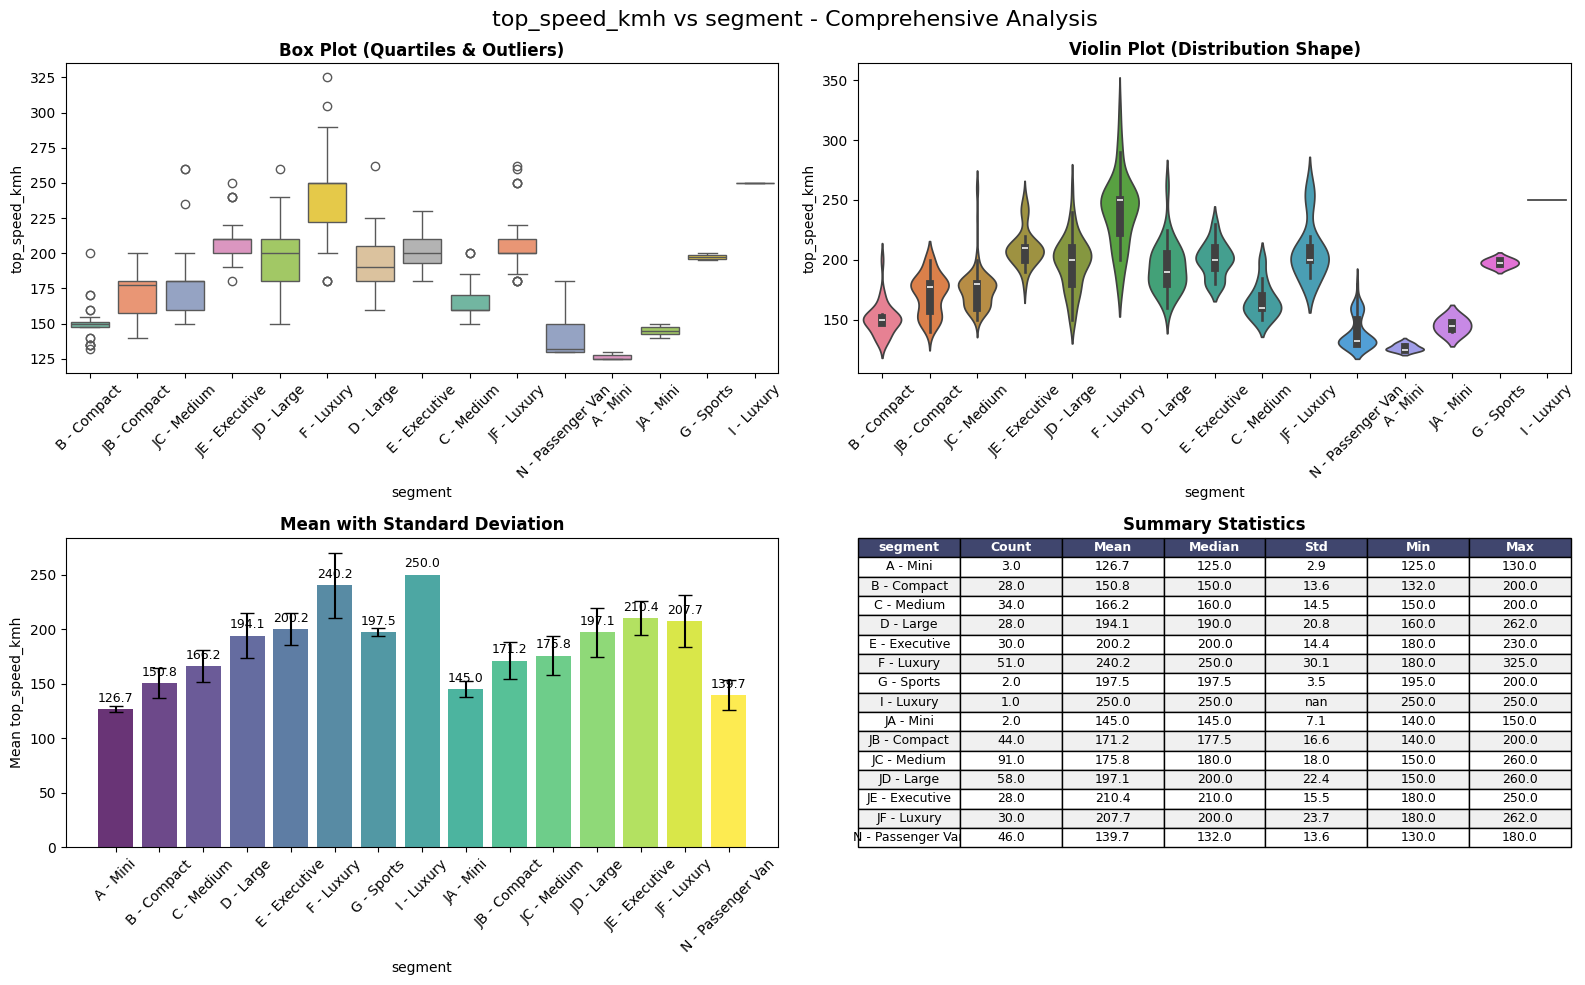


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 71.1288
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 334.1214
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.6836
  Large effect



ANALYSIS: ACCELERATION_0_100_S vs SEGMENT
Rationale: Sports/luxury segments should accelerate faster (lower seconds)
Business Insight: Performance positioning
--------------------------------------------------------------------------------


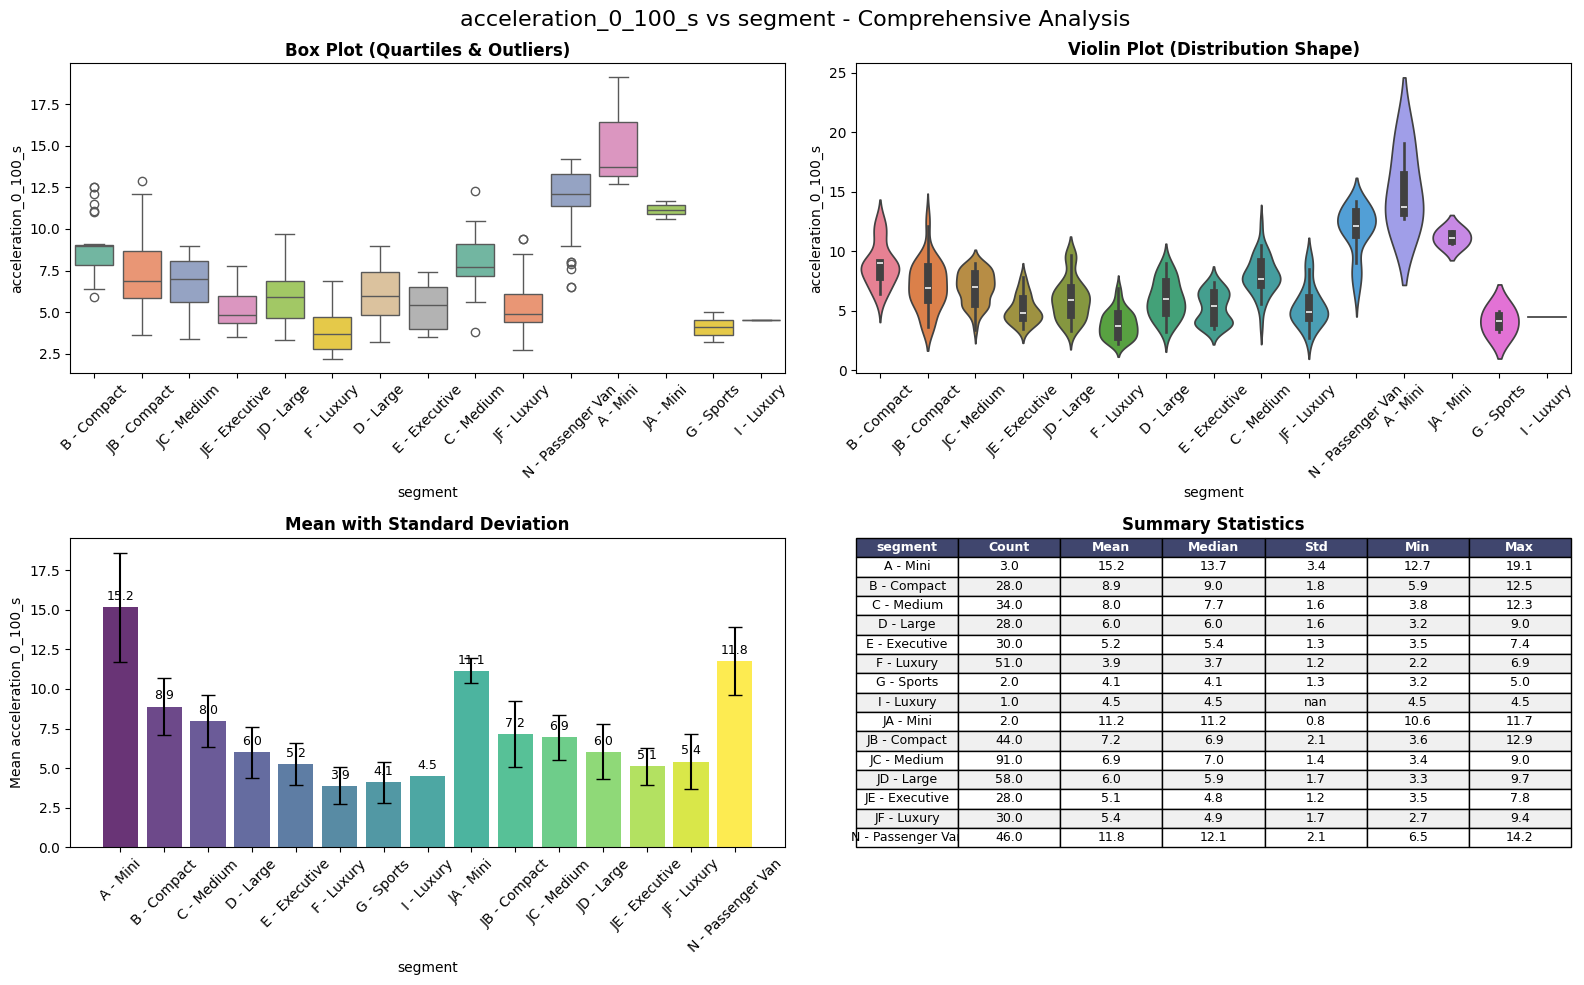


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 59.9684
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 264.6459
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.6455
  Large effect



ANALYSIS: RANGE_KM vs SEGMENT
Rationale: Different segments target different use cases (city vs long-distance)
Business Insight: Customer needs alignment
--------------------------------------------------------------------------------


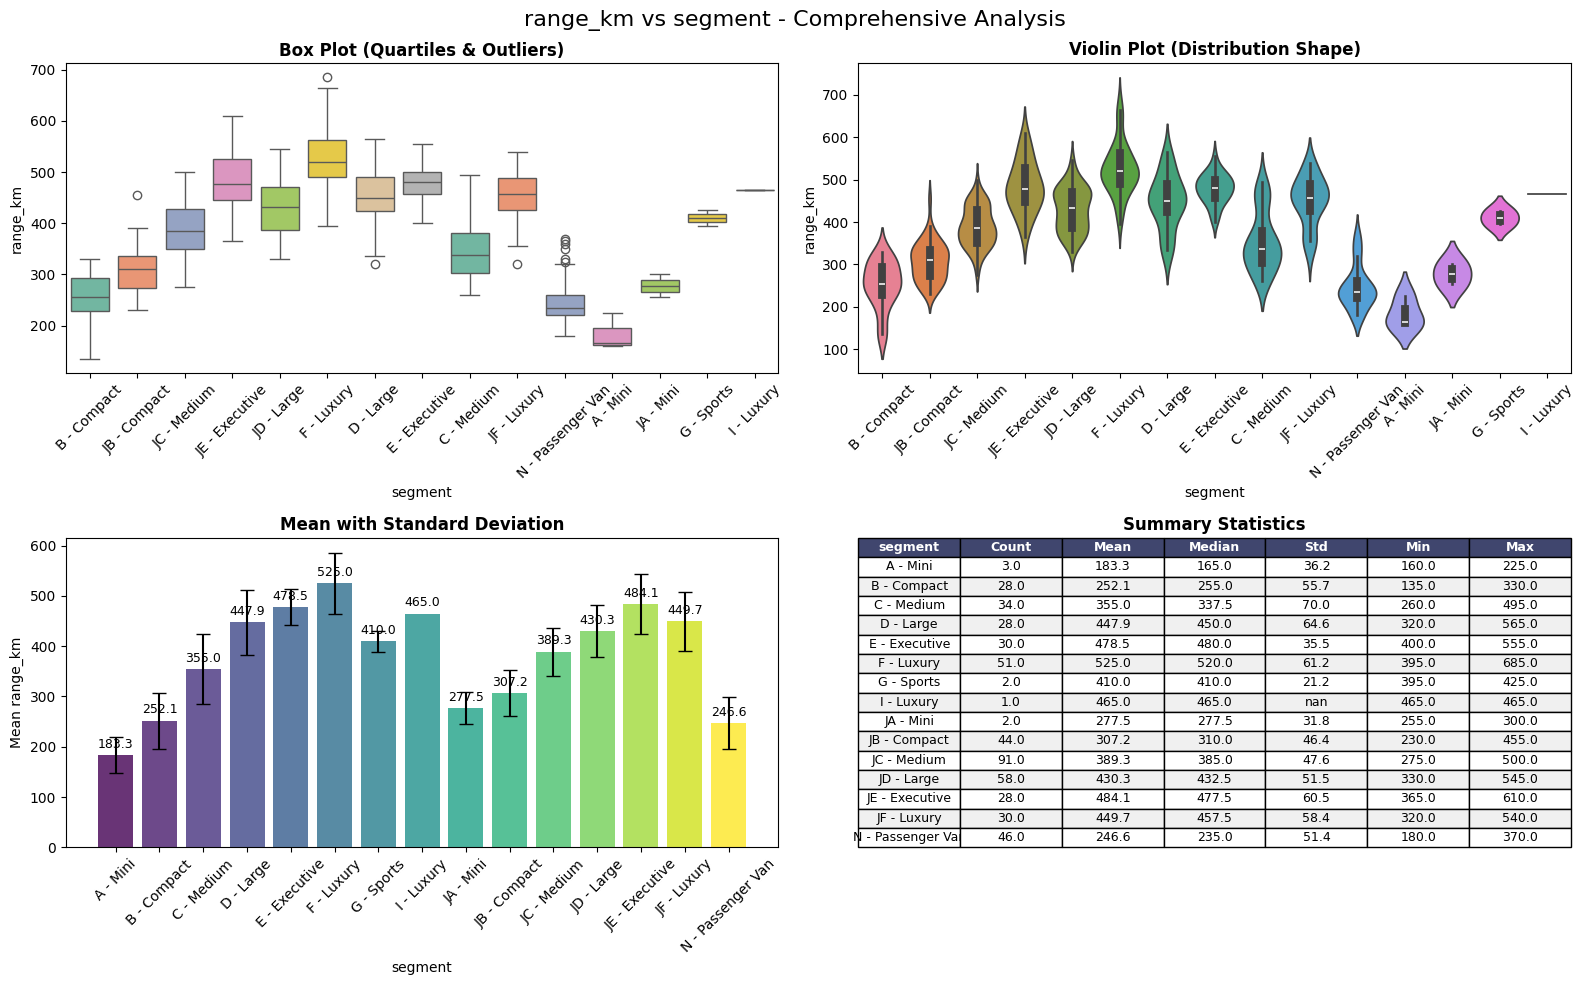


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 89.7440
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 344.6359
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.7316
  Large effect



ANALYSIS: BATTERY_CAPACITY_KWH vs BRAND
Rationale: Different brands have different battery strategies
Business Insight: Technology positioning
--------------------------------------------------------------------------------


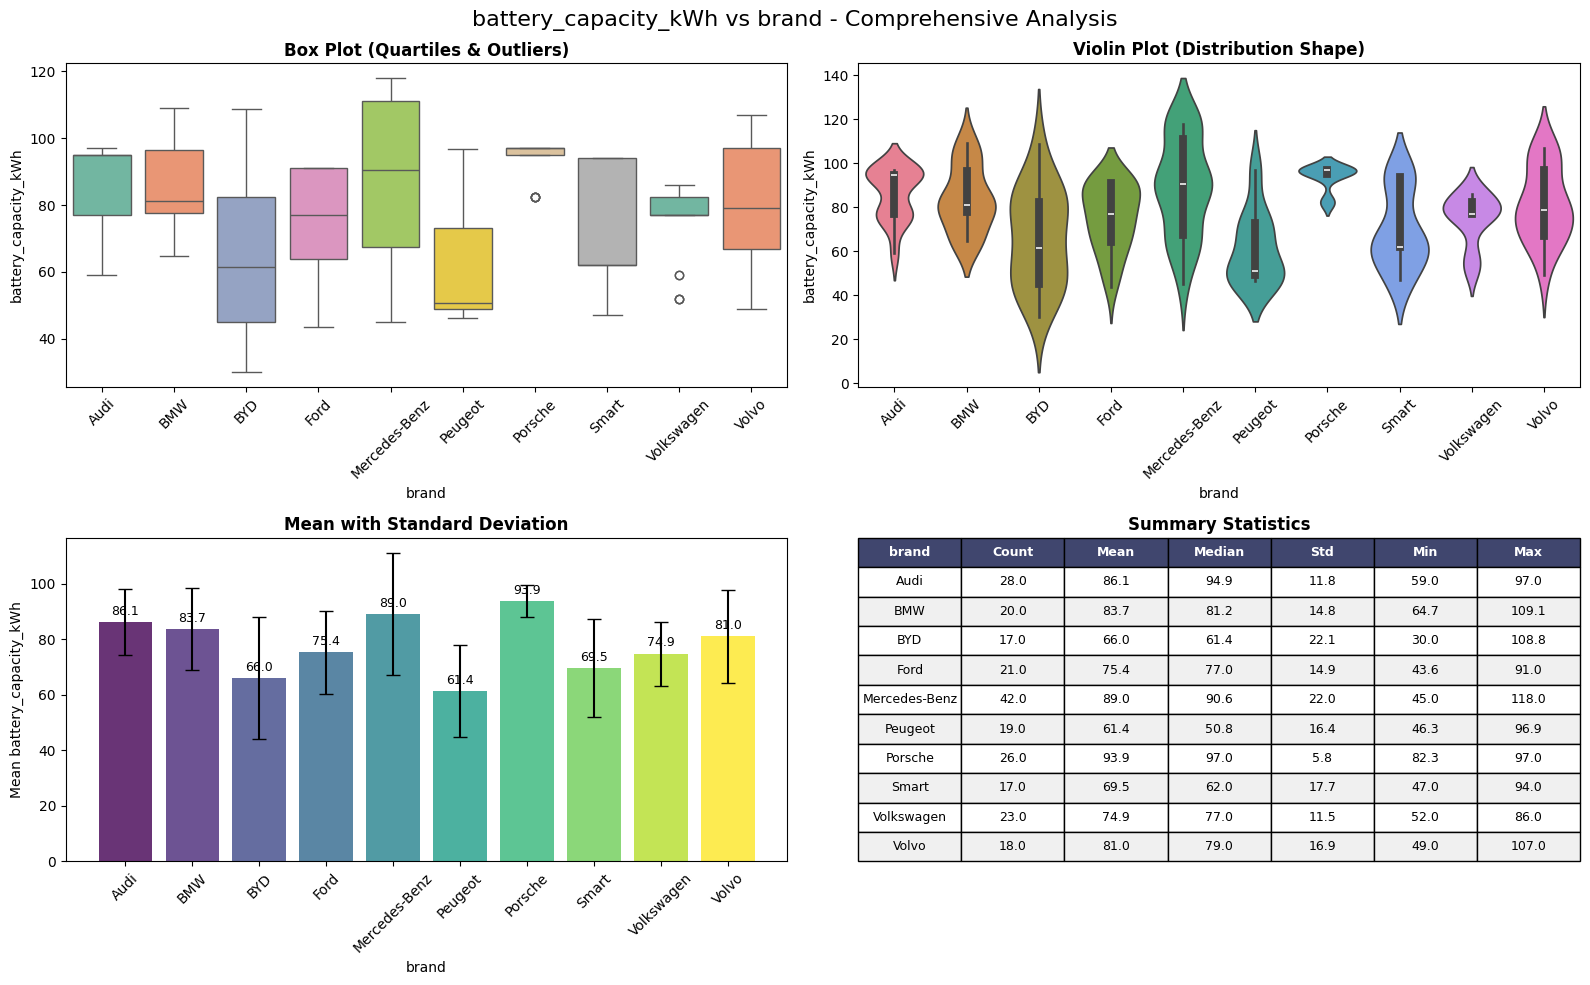


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 9.4782
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 68.3257
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.2785
  Large effect



ANALYSIS: EFFICIENCY_WH_PER_KM vs BRAND
Rationale: Brand engineering capabilities and focus
Business Insight: Technical competency
--------------------------------------------------------------------------------


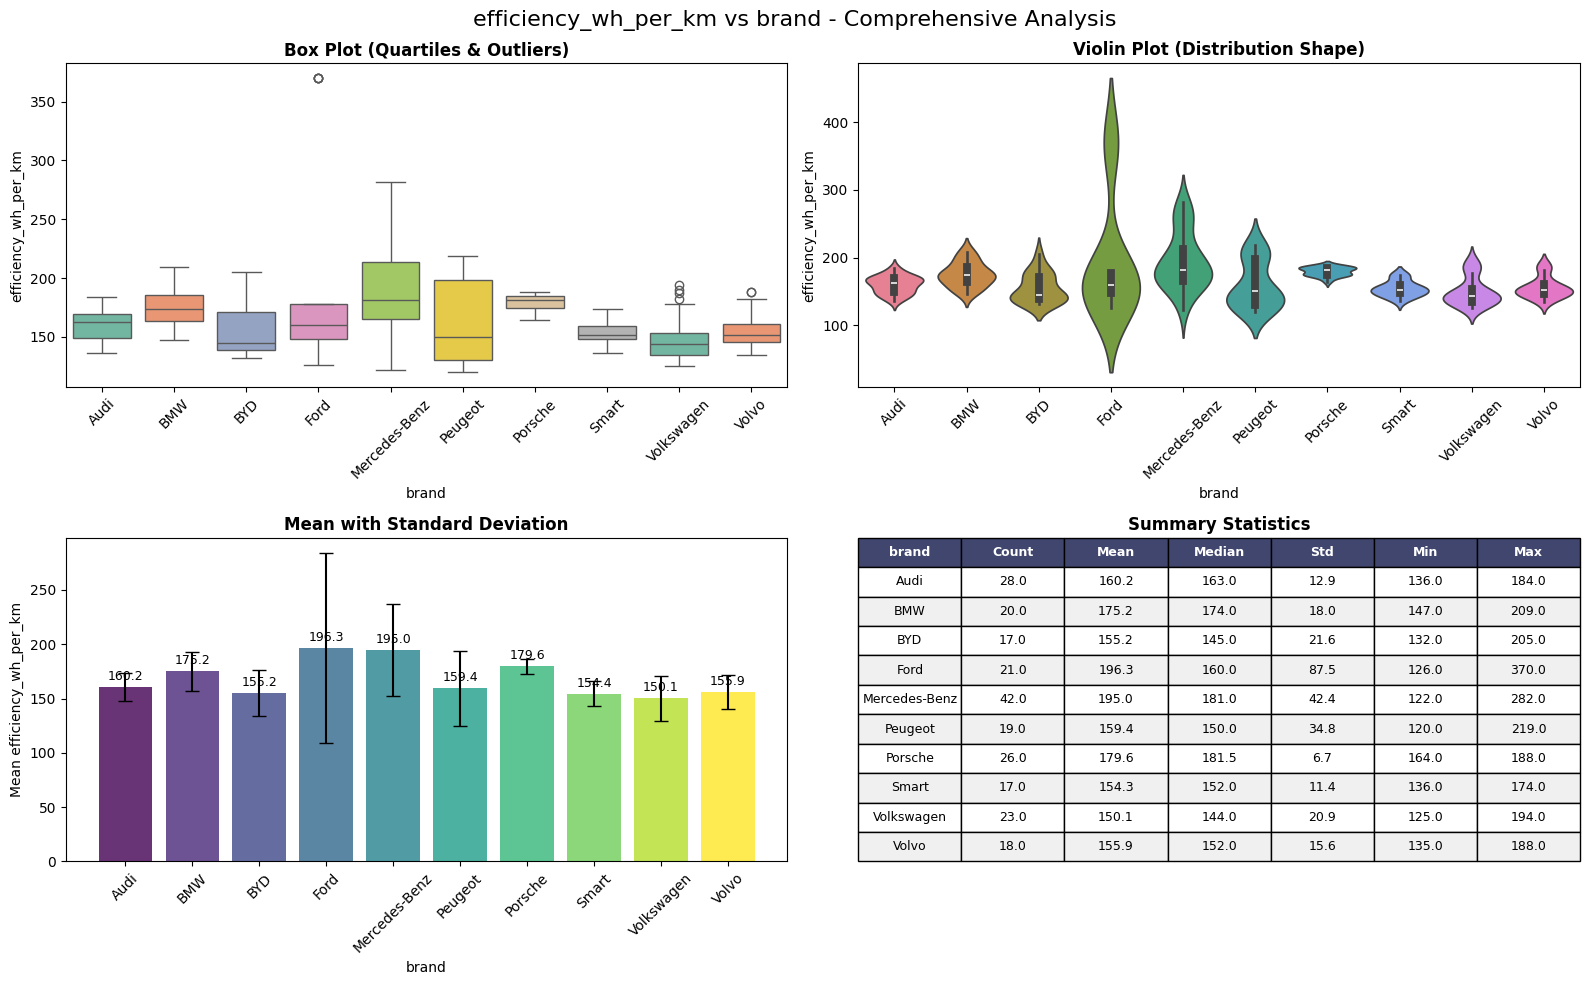


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 5.9618
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 63.9696
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.1954
  Large effect



ANALYSIS: CARGO_VOLUME_L vs CAR_BODY_TYPE
Rationale: SUVs should have more cargo space than sedans/hatchbacks
Business Insight: Functional design validation
--------------------------------------------------------------------------------


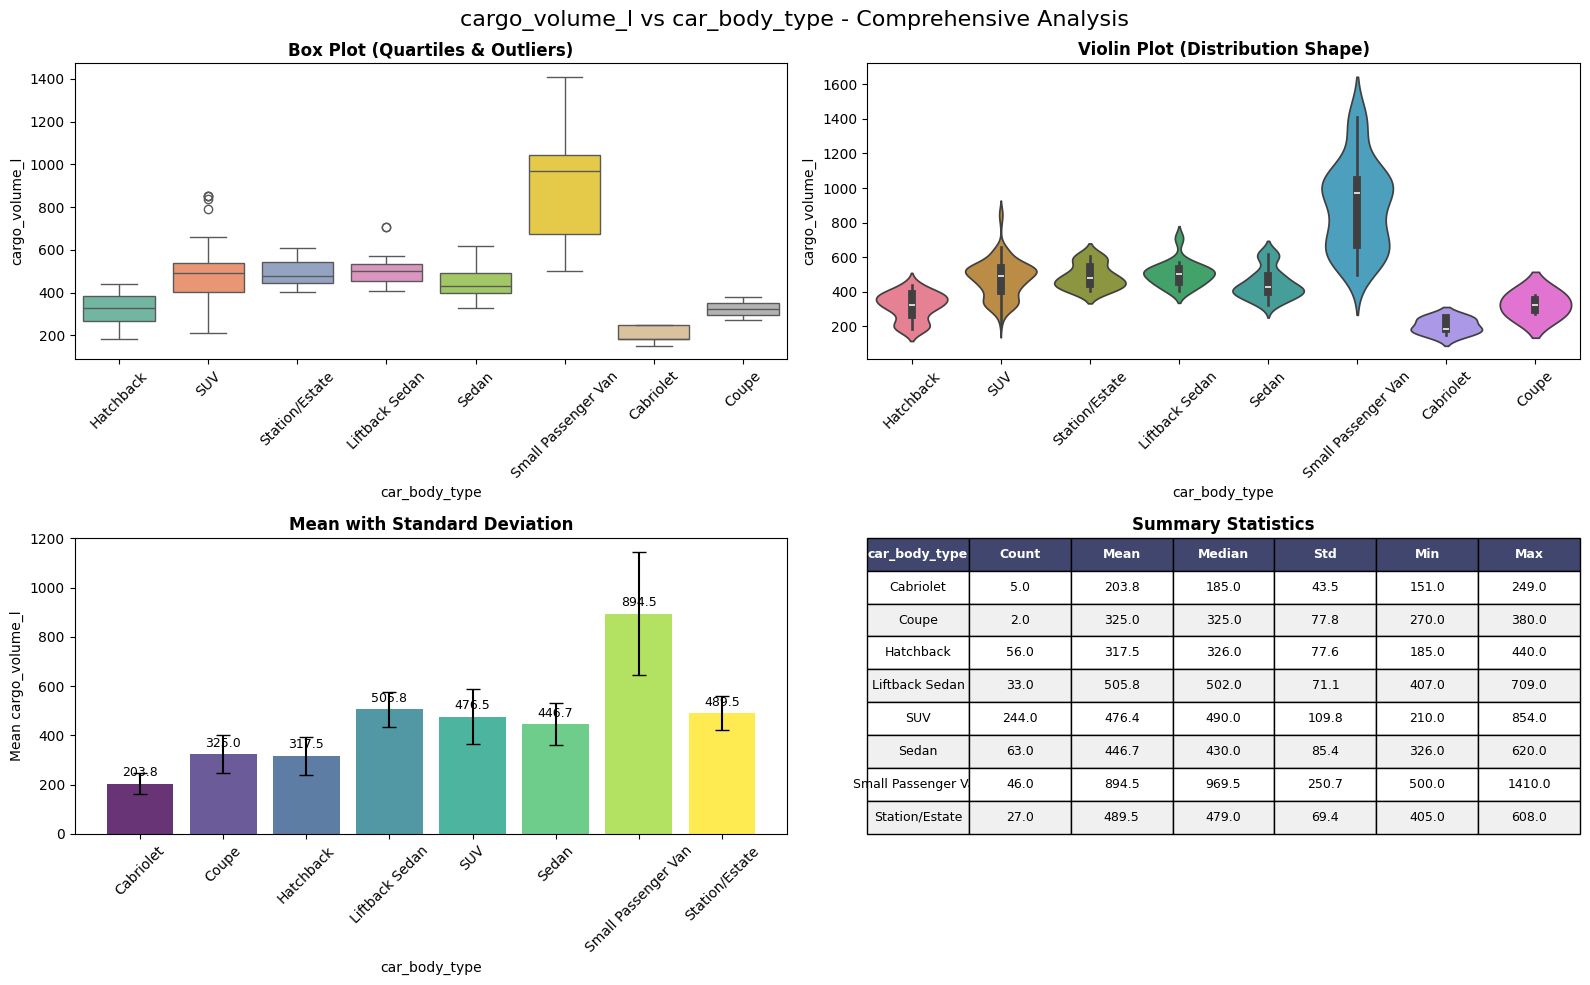


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 95.9297
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 206.1767
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.5893
  Large effect



ANALYSIS: TOWING_CAPACITY_KG vs CAR_BODY_TYPE
Rationale: SUVs/trucks designed for higher towing capacity
Business Insight: Utility positioning
--------------------------------------------------------------------------------


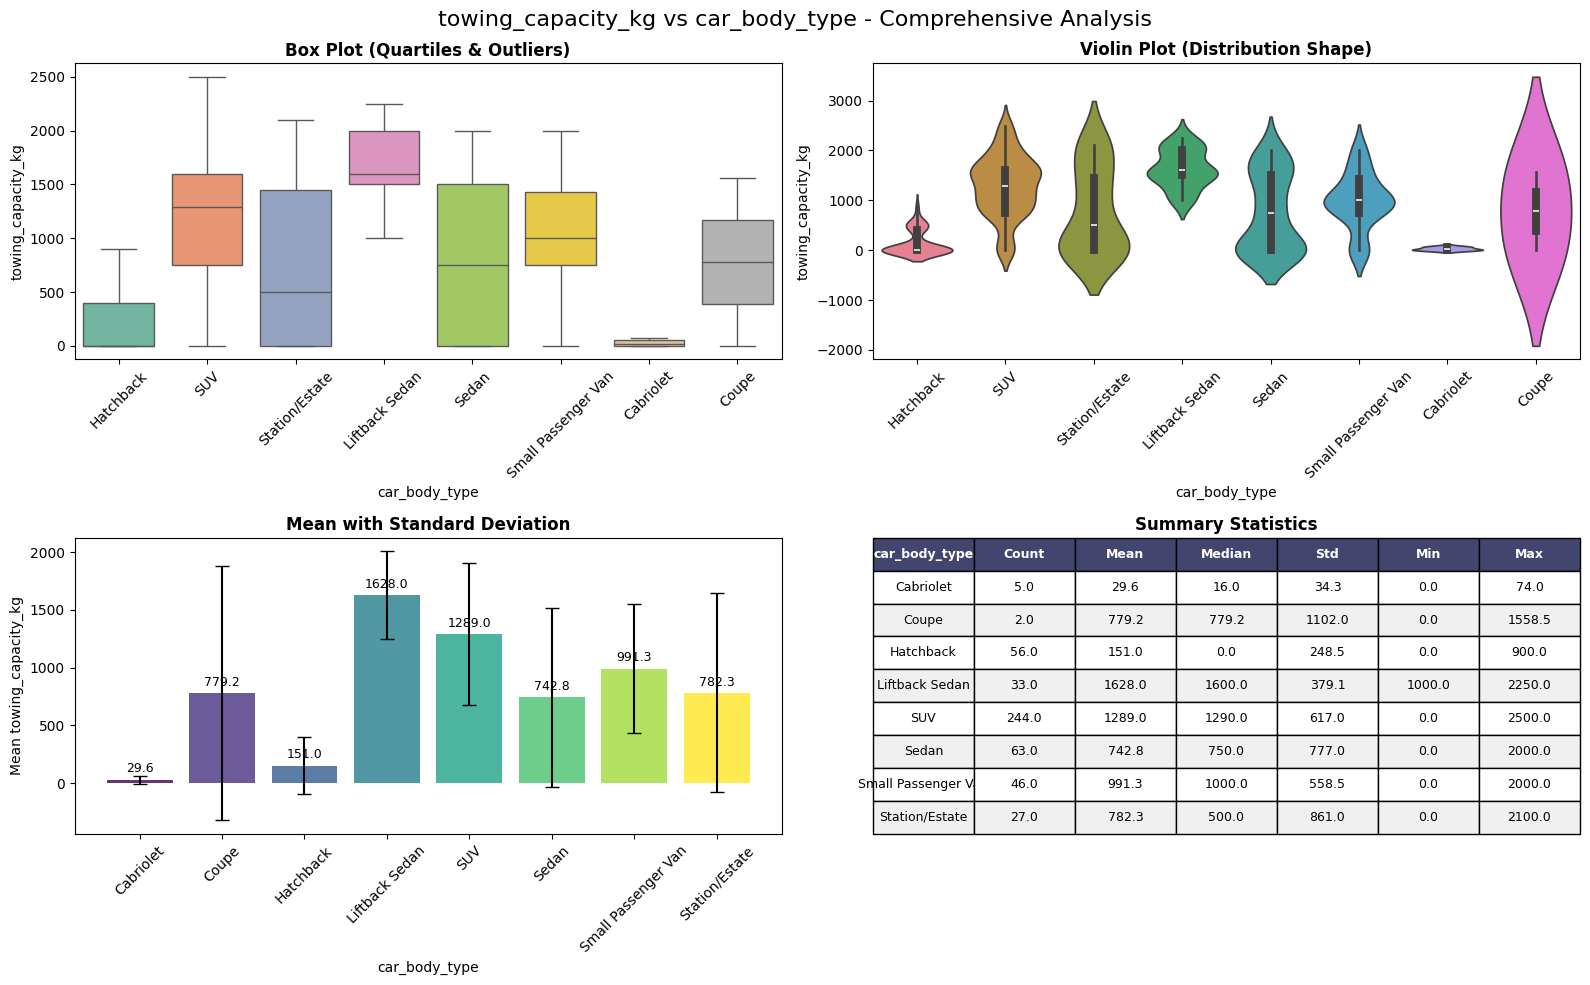


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 32.3594
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 144.3147
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.3261
  Large effect



ANALYSIS: TORQUE_NM vs DRIVETRAIN
Rationale: AWD systems might have different torque characteristics
Business Insight: Engineering trade-offs
--------------------------------------------------------------------------------


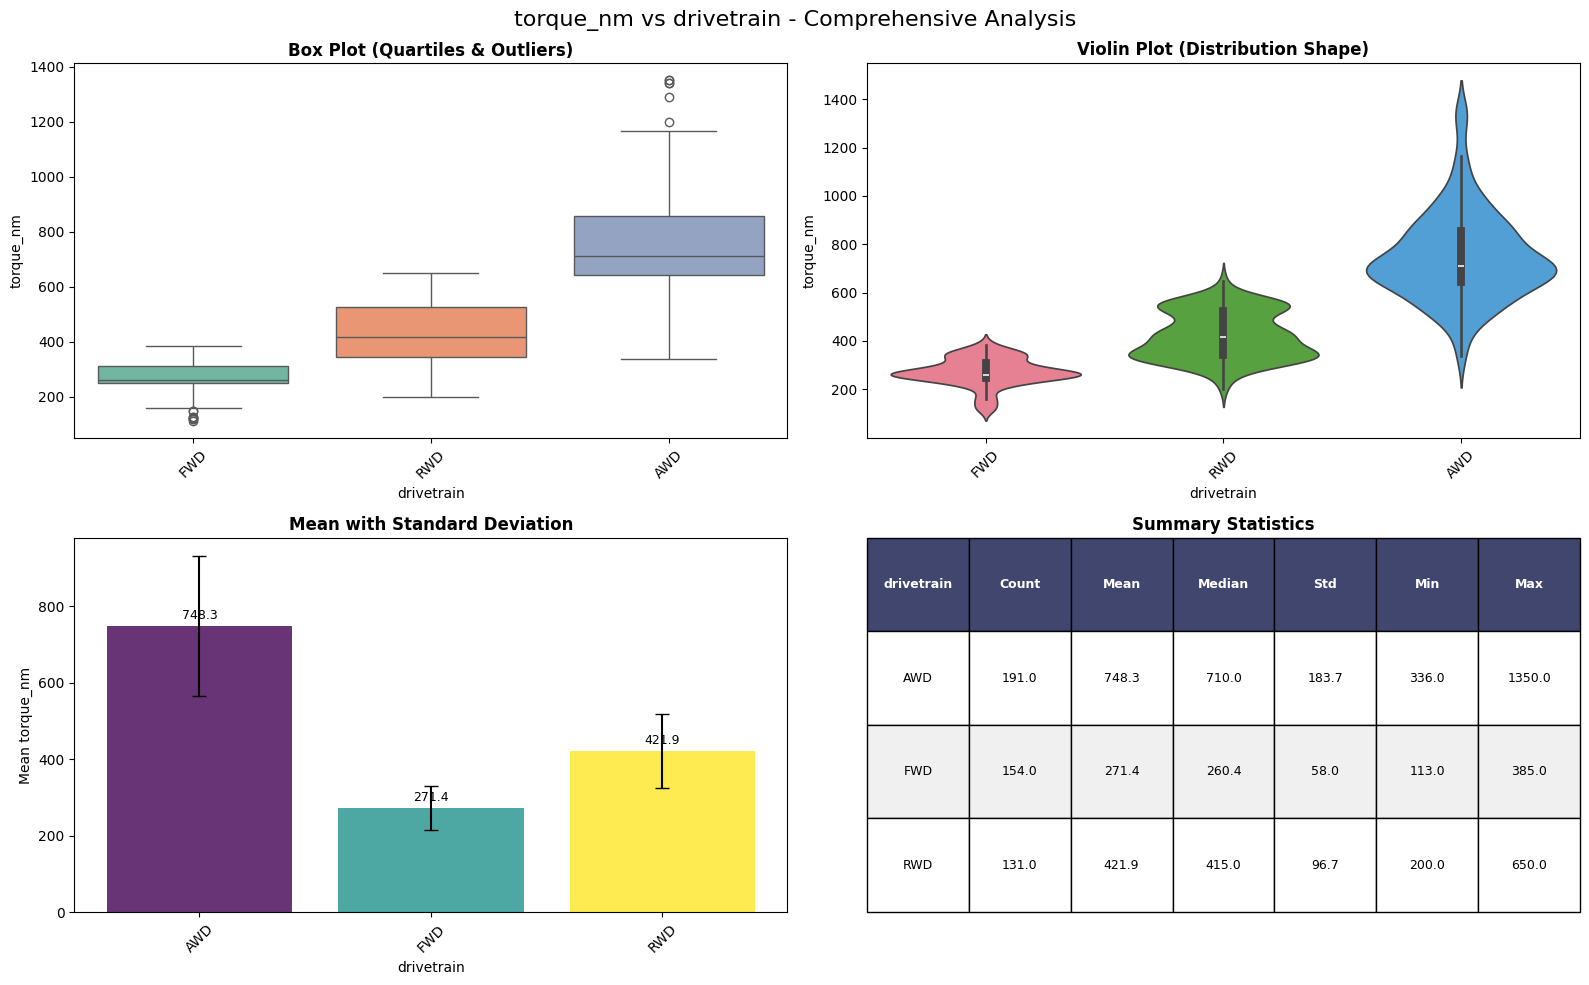


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 598.7483
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 373.6445
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.7169
  Large effect



ANALYSIS: ACCELERATION_0_100_S vs DRIVETRAIN
Rationale: AWD typically provides better acceleration
Business Insight: Performance engineering
--------------------------------------------------------------------------------


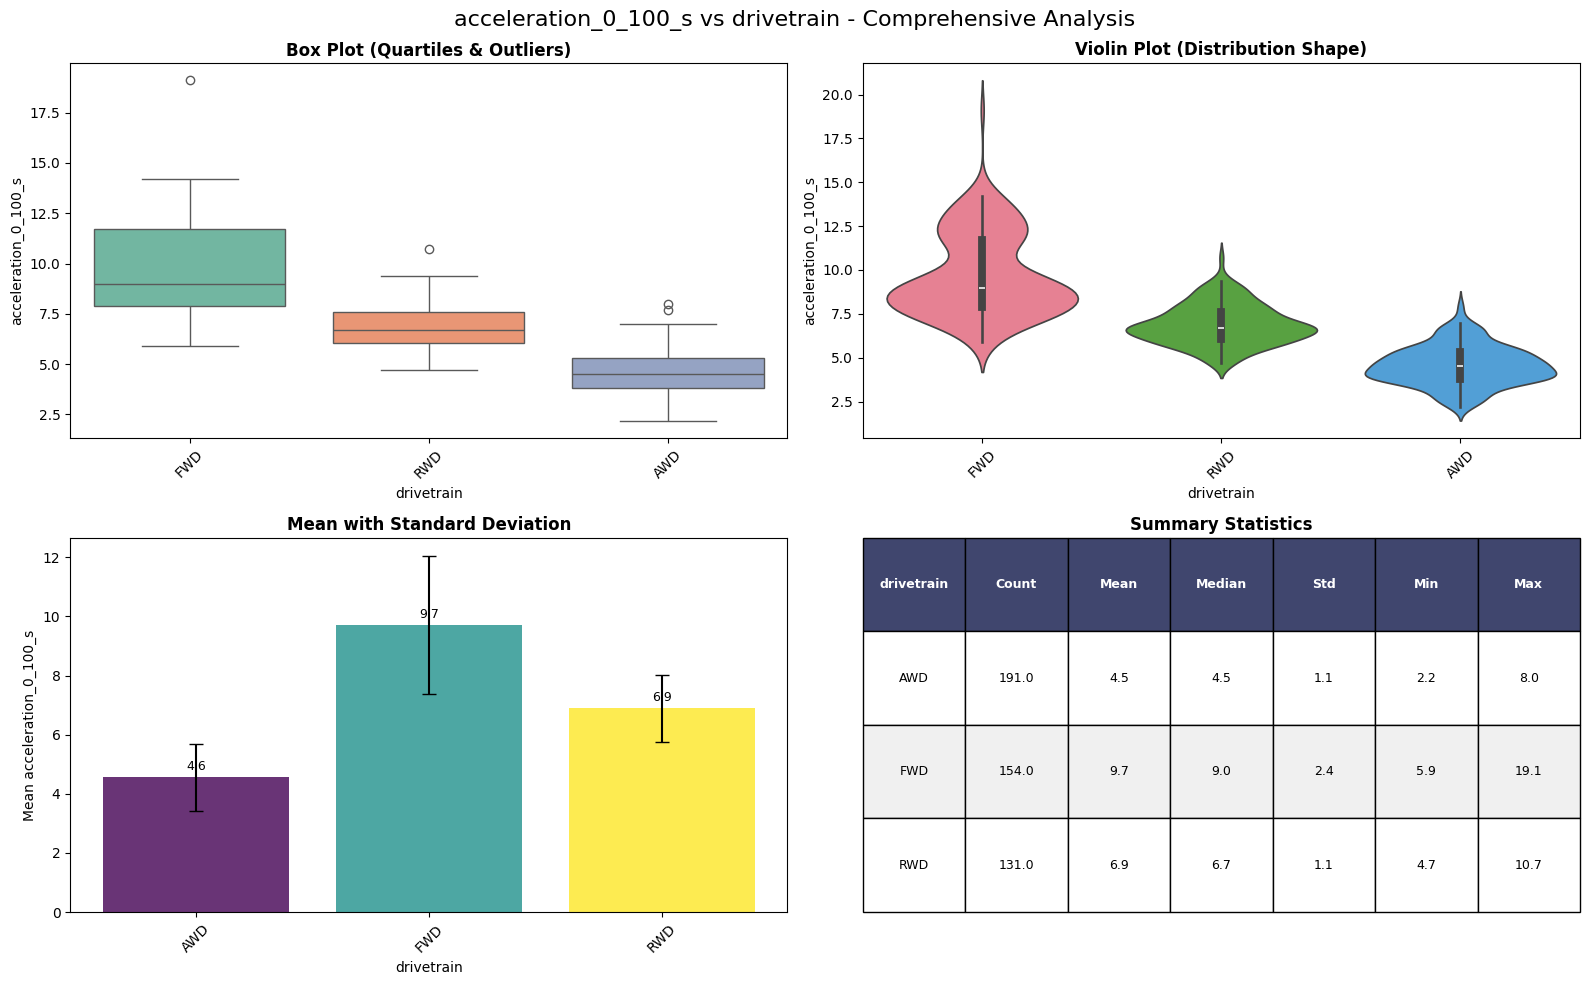


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 428.6079
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 350.4233
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.6444
  Large effect



ANALYSIS: LENGTH_MM vs SEGMENT
Rationale: Luxury segments typically have larger vehicles
Business Insight: Design philosophy
--------------------------------------------------------------------------------


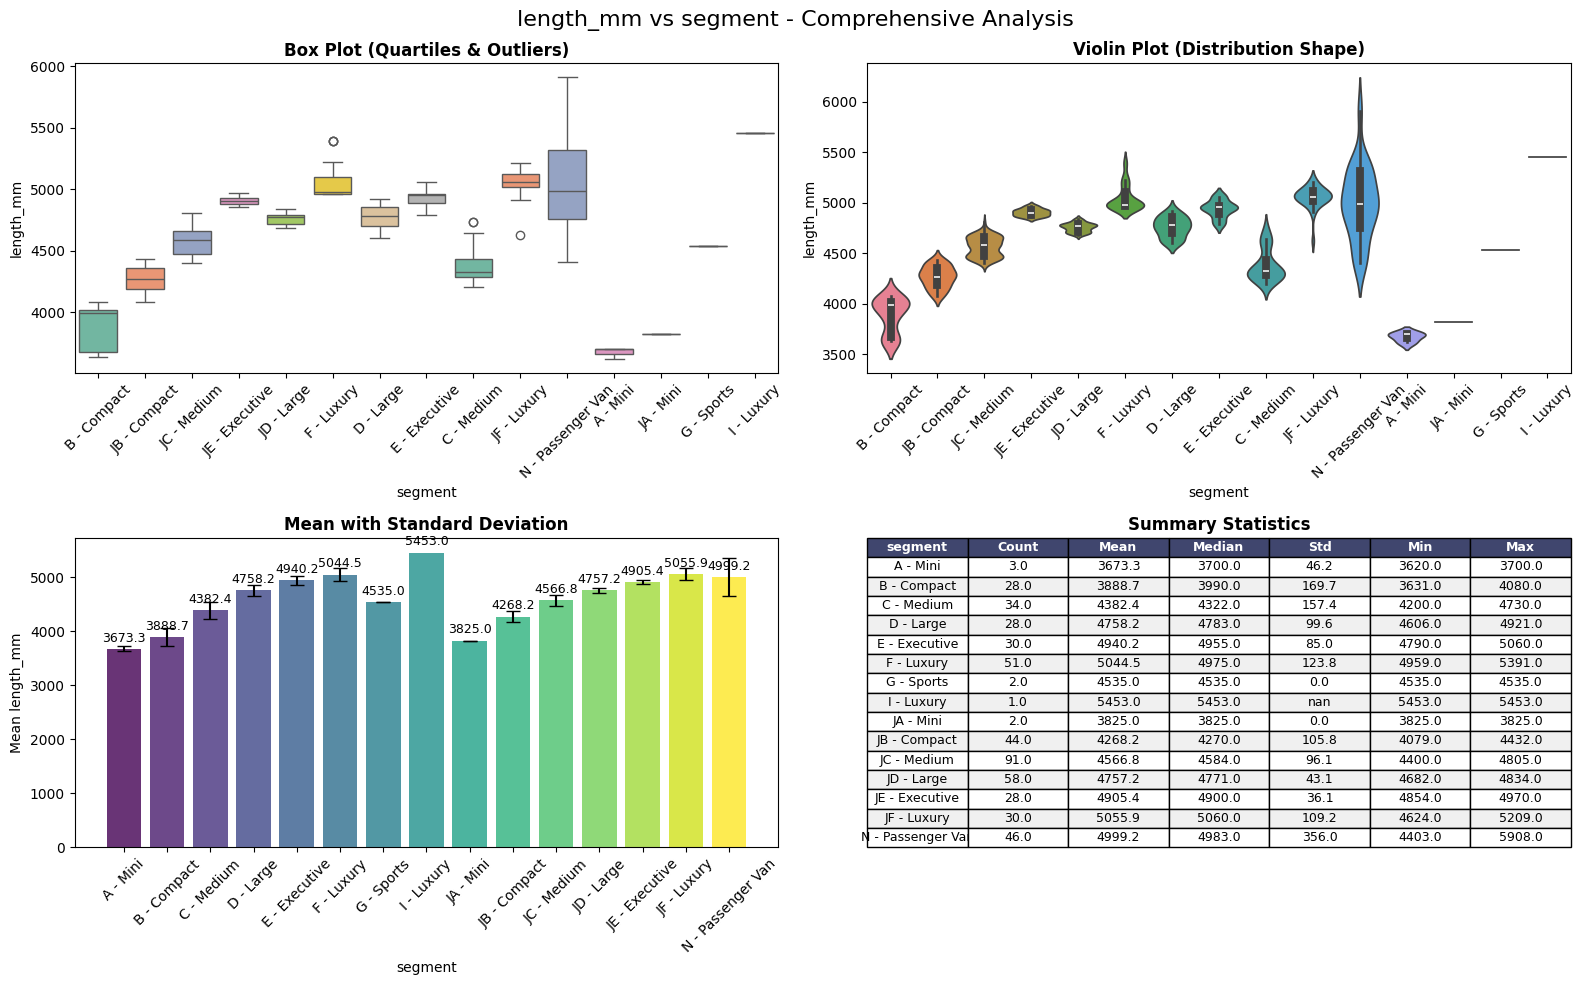


STATISTICAL ANALYSIS:
----------------------------------------
ANOVA F-test:
  F-statistic: 171.8300
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Kruskal-Wallis test (non-parametric):
  H-statistic: 406.0304
  P-value: 0.000000
  ✓ Highly significant differences between groups (p < 0.001)

Effect Size (Eta-squared): 0.8392
  Large effect




In [12]:
def numerical_categorical_analysis(df, top_n_brands=10):
    """
    Comprehensive numerical vs categorical bivariate analysis for EV dataset
    """
    
    # Filter to top N brands to avoid overcrowding
    top_brands = df['brand'].value_counts().head(top_n_brands).index
    df_filtered = df[df['brand'].isin(top_brands)].copy()
    
    # Define most meaningful combinations based on business logic
    meaningful_combinations = [
        # PERFORMANCE METRICS by CATEGORICAL VARIABLES
        {
            'numerical': 'top_speed_kmh',
            'categorical': 'segment',
            'rationale': 'Premium segments should have higher top speeds',
            'business_insight': 'Market positioning strategy'
        },
        {
            'numerical': 'acceleration_0_100_s',
            'categorical': 'segment', 
            'rationale': 'Sports/luxury segments should accelerate faster (lower seconds)',
            'business_insight': 'Performance positioning'
        },
        {
            'numerical': 'range_km',
            'categorical': 'segment',
            'rationale': 'Different segments target different use cases (city vs long-distance)',
            'business_insight': 'Customer needs alignment'
        },
        
        # TECHNICAL SPECS by BRAND
        {
            'numerical': 'battery_capacity_kWh',
            'categorical': 'brand',
            'rationale': 'Different brands have different battery strategies',
            'business_insight': 'Technology positioning'
        },
        {
            'numerical': 'efficiency_wh_per_km',
            'categorical': 'brand',
            'rationale': 'Brand engineering capabilities and focus',
            'business_insight': 'Technical competency'
        },
        
        # PHYSICAL CHARACTERISTICS by BODY TYPE
        {
            'numerical': 'cargo_volume_l',
            'categorical': 'car_body_type',
            'rationale': 'SUVs should have more cargo space than sedans/hatchbacks',
            'business_insight': 'Functional design validation'
        },
        {
            'numerical': 'towing_capacity_kg',
            'categorical': 'car_body_type',
            'rationale': 'SUVs/trucks designed for higher towing capacity',
            'business_insight': 'Utility positioning'
        },

        
        # DRIVETRAIN IMPACT
        {
            'numerical': 'torque_nm',
            'categorical': 'drivetrain',
            'rationale': 'AWD systems might have different torque characteristics',
            'business_insight': 'Engineering trade-offs'
        },
        {
            'numerical': 'acceleration_0_100_s',
            'categorical': 'drivetrain',
            'rationale': 'AWD typically provides better acceleration',
            'business_insight': 'Performance engineering'
        },
        
        # SIZE METRICS by SEGMENT
        {
            'numerical': 'length_mm',
            'categorical': 'segment',
            'rationale': 'Luxury segments typically have larger vehicles',
            'business_insight': 'Design philosophy'
        }
    ]
    
    def create_comprehensive_plot(df_to_use, num_var, cat_var, rationale, insight):
        """Create comprehensive analysis for one numerical-categorical pair"""
        
        print(f"\n{'='*80}")
        print(f"ANALYSIS: {num_var.upper()} vs {cat_var.upper()}")
        print(f"{'='*80}")
        print(f"Rationale: {rationale}")
        print(f"Business Insight: {insight}")
        print("-" * 80)
        
        # Create figure with multiple subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle(f'{num_var} vs {cat_var} - Comprehensive Analysis', fontsize=16, y=0.98)
        
        # 1. Box Plot (colorful)
        sns.boxplot(data=df_to_use, x=cat_var, y=num_var, ax=axes[0,0], palette='Set2')
        axes[0,0].set_title('Box Plot (Quartiles & Outliers)', fontweight='bold')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # 2. Violin Plot (colorful)
        sns.violinplot(data=df_to_use, x=cat_var, y=num_var, ax=axes[0,1], palette='husl')
        axes[0,1].set_title('Violin Plot (Distribution Shape)', fontweight='bold')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. Bar Plot (Mean with Error Bars) - colorful
        category_stats = df_to_use.groupby(cat_var)[num_var].agg(['mean', 'std', 'count']).reset_index()
        
        # Create colorful bars
        colors = plt.cm.viridis(np.linspace(0, 1, len(category_stats)))
        bars = axes[1,0].bar(category_stats[cat_var], category_stats['mean'], 
                           yerr=category_stats['std'], capsize=5, alpha=0.8, color=colors)
        axes[1,0].set_title('Mean with Standard Deviation', fontweight='bold')
        axes[1,0].set_xlabel(cat_var)
        axes[1,0].set_ylabel(f'Mean {num_var}')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            axes[1,0].annotate(f'{height:.1f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3), textcoords="offset points",
                             ha='center', va='bottom', fontsize=9)
        
        # 4. Summary Statistics Table (colorful)
        axes[1,1].axis('off')
        summary_stats = df_to_use.groupby(cat_var)[num_var].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)
        
        # Create colorful table
        table_data = []
        for idx, row in summary_stats.iterrows():
            table_data.append([idx, row['count'], f"{row['mean']:.1f}", 
                             f"{row['median']:.1f}", f"{row['std']:.1f}", 
                             f"{row['min']:.1f}", f"{row['max']:.1f}"])
        
        table = axes[1,1].table(cellText=table_data,
                               colLabels=[cat_var, 'Count', 'Mean', 'Median', 'Std', 'Min', 'Max'],
                               cellLoc='center', loc='center',
                               bbox=[0, 0, 1, 1])
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        axes[1,1].set_title('Summary Statistics', fontweight='bold')
        
        # Color the table header
        for i in range(len(table_data[0])):
            table[(0, i)].set_facecolor('#40466e')
            table[(0, i)].set_text_props(weight='bold', color='white')
        
        # Color alternate rows
        for i in range(1, len(table_data) + 1):
            for j in range(len(table_data[0])):
                if i % 2 == 0:
                    table[(i, j)].set_facecolor('#f0f0f0')
                else:
                    table[(i, j)].set_facecolor('#ffffff')
        
        plt.tight_layout()
        plt.show()
        
        # Statistical Tests
        print("\nSTATISTICAL ANALYSIS:")
        print("-" * 40)
        
        # Group data by category
        groups = [df_to_use[df_to_use[cat_var] == cat][num_var].dropna() 
                 for cat in df_to_use[cat_var].unique()]
        
        # Remove empty groups
        groups = [group for group in groups if len(group) > 0]
        
        if len(groups) >= 2:
            # ANOVA F-test (if more than 2 groups)
            if len(groups) > 2:
                try:
                    f_stat, p_value_anova = stats.f_oneway(*groups)
                    print(f"ANOVA F-test:")
                    print(f"  F-statistic: {f_stat:.4f}")
                    print(f"  P-value: {p_value_anova:.6f}")  # Show more decimals
                    
                    if p_value_anova < 0.001:
                        print("  ✓ Highly significant differences between groups (p < 0.001)")
                    elif p_value_anova < 0.05:
                        print("  ✓ Significant differences between groups (p < 0.05)")
                    else:
                        print("  ✗ No significant differences between groups (p ≥ 0.05)")
                except Exception as e:
                    print(f"  Error in ANOVA: {e}")
            
            # Kruskal-Wallis test (non-parametric alternative)
            try:
                kw_stat, p_value_kw = stats.kruskal(*groups)
                print(f"\nKruskal-Wallis test (non-parametric):")
                print(f"  H-statistic: {kw_stat:.4f}")
                print(f"  P-value: {p_value_kw:.6f}")  # Show more decimals
                
                if p_value_kw < 0.001:
                    print("  ✓ Highly significant differences between groups (p < 0.001)")
                elif p_value_kw < 0.05:
                    print("  ✓ Significant differences between groups (p < 0.05)")
                else:
                    print("  ✗ No significant differences between groups (p ≥ 0.05)")
            except Exception as e:
                print(f"  Error in Kruskal-Wallis: {e}")
        
        # Effect size (Eta-squared for ANOVA)
        if len(groups) > 2:
            try:
                # Manual calculation of eta-squared
                grand_mean = df_to_use[num_var].mean()
                ss_between = sum([len(group) * (group.mean() - grand_mean)**2 for group in groups])
                ss_total = sum([(x - grand_mean)**2 for group in groups for x in group])
                eta_squared = ss_between / ss_total if ss_total > 0 else 0
                
                print(f"\nEffect Size (Eta-squared): {eta_squared:.4f}")
                if eta_squared < 0.01:
                    print("  Small effect")
                elif eta_squared < 0.06:
                    print("  Medium effect") 
                else:
                    print("  Large effect")
            except Exception as e:
                print(f"  Error calculating effect size: {e}")
        
        print(f"\n{'='*80}\n")
    
    # Execute analysis for all meaningful combinations
    for combo in meaningful_combinations:
        # Use filtered data if brand is involved
        data_to_use = df_filtered if combo['categorical'] == 'brand' else df
        
        # Check if variables exist and have sufficient data
        if (combo['numerical'] in data_to_use.columns and 
            combo['categorical'] in data_to_use.columns):
            
            # Check for sufficient categories and data
            n_categories = data_to_use[combo['categorical']].nunique()
            n_observations = len(data_to_use.dropna(subset=[combo['numerical'], combo['categorical']]))
            
            if n_categories >= 2 and n_observations >= 20:
                create_comprehensive_plot(
                    data_to_use, 
                    combo['numerical'], 
                    combo['categorical'],
                    combo['rationale'],
                    combo['business_insight']
                )
            else:
                print(f"Skipping {combo['numerical']} vs {combo['categorical']}: Insufficient data")
        else:
            print(f"Skipping {combo['numerical']} vs {combo['categorical']}: Variables not found")

# Usage
numerical_categorical_analysis(df, top_n_brands=10)

## Multivariate Analysis

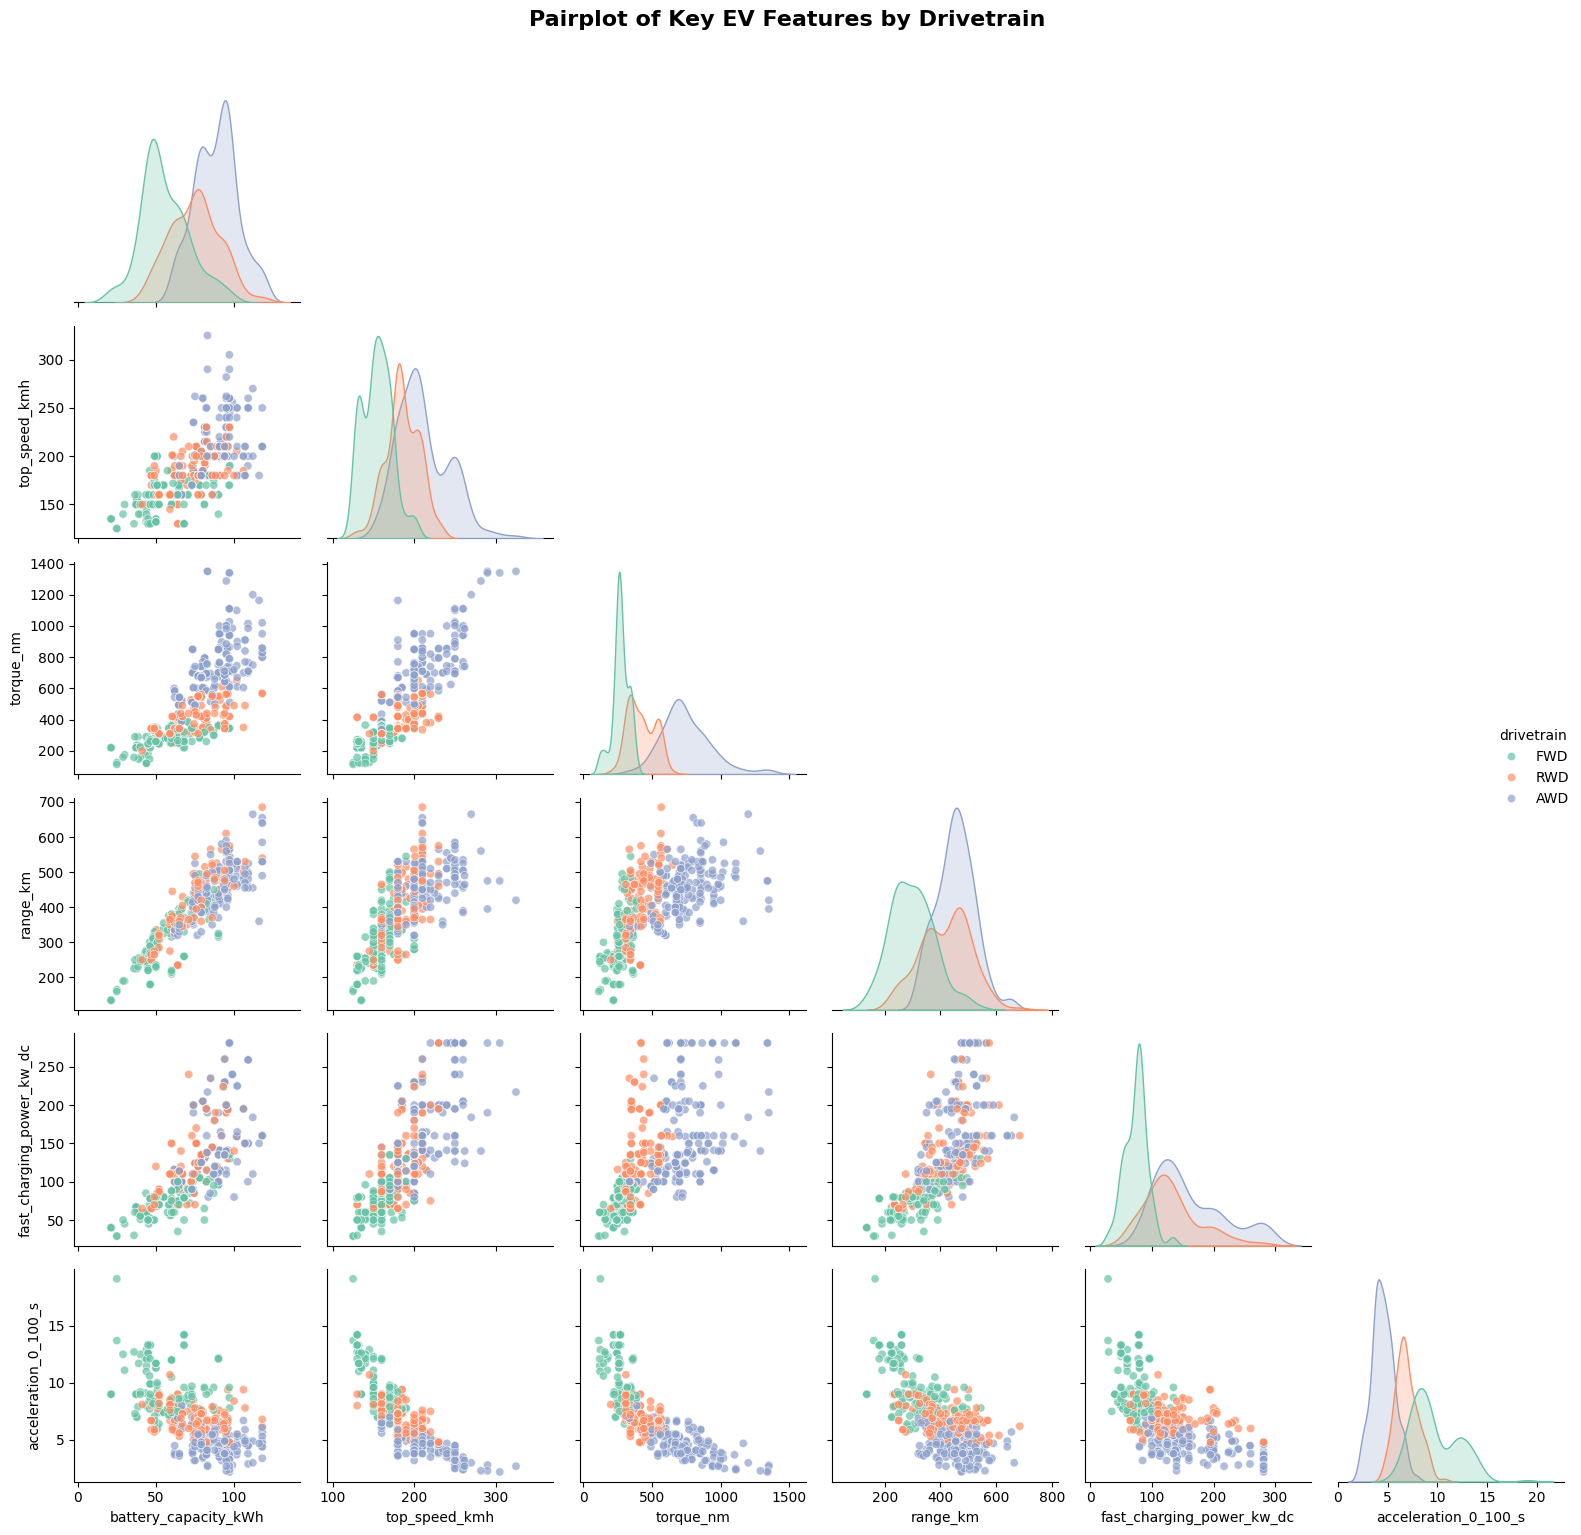

In [13]:
cols = ['battery_capacity_kWh', 'top_speed_kmh', 'torque_nm', 'range_km',
        'fast_charging_power_kw_dc', 'acceleration_0_100_s']

sns.pairplot(df[cols + ['drivetrain']], hue='drivetrain', corner=True,
             diag_kind='kde', palette='Set2', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Key EV Features by Drivetrain', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

def scatter_plot_with_bestfit(df, feature_x, feature_y, color_by=None, 
                             figsize=(12, 8), alpha=0.7, point_size=60):
    """
    Create a scatter plot with best fit line and optional color coding
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset
    feature_x : str
        Feature for x-axis
    feature_y : str  
        Feature for y-axis
    color_by : str, optional
        Feature to color points by (can be categorical or continuous)
    figsize : tuple
        Figure size (width, height)
    alpha : float
        Transparency of points (0-1)
    point_size : int
        Size of scatter points
    
    Returns:
    --------
    dict : Dictionary containing plot statistics and regression info
    """
    
    # Data validation
    required_features = [feature_x, feature_y]
    missing_features = [f for f in required_features if f not in df.columns]
    if missing_features:
        raise ValueError(f"Features not found in dataset: {missing_features}")
    
    # Prepare data
    analysis_features = required_features.copy()
    if color_by and color_by in df.columns:
        analysis_features.append(color_by)
    
    df_clean = df[analysis_features].dropna()
    
    if len(df_clean) == 0:
        raise ValueError("No valid data points after removing NaN values")
    
    print(f"Analyzing {len(df_clean)} records after removing NaN values")
    print(f"X-axis: {feature_x}, Y-axis: {feature_y}")
    if color_by:
        print(f"Color by: {color_by}")
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Handle coloring
    if color_by and color_by in df.columns:
        if df_clean[color_by].dtype == 'object':
            # Categorical coloring
            unique_categories = df_clean[color_by].unique()
            colors = plt.cm.Set3(np.linspace(0, 1, len(unique_categories)))
            
            for i, category in enumerate(unique_categories):
                mask = df_clean[color_by] == category
                plt.scatter(df_clean[mask][feature_x], 
                           df_clean[mask][feature_y],
                           c=[colors[i]], label=category, 
                           alpha=alpha, s=point_size)
            
            # Add legend for categories
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
                      title=color_by, frameon=True, fancybox=True, shadow=True)
            
        else:
            # Continuous coloring
            scatter = plt.scatter(df_clean[feature_x], df_clean[feature_y], 
                                c=df_clean[color_by], cmap='viridis', 
                                alpha=alpha, s=point_size)
            cbar = plt.colorbar(scatter)
            cbar.set_label(color_by, rotation=270, labelpad=20)
    else:
        # No coloring
        plt.scatter(df_clean[feature_x], df_clean[feature_y], 
                   alpha=alpha, s=point_size, c='steelblue')
    
    # Calculate and plot best fit line
    X = df_clean[feature_x].values.reshape(-1, 1)
    y = df_clean[feature_y].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Create smooth line for plotting
    x_line = np.linspace(df_clean[feature_x].min(), df_clean[feature_x].max(), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    
    plt.plot(x_line, y_line, color='red', linewidth=2, 
             label=f'Best Fit Line (R² = {model.score(X, y):.3f})')
    
    # Calculate additional statistics
    correlation = df_clean[feature_x].corr(df_clean[feature_y])
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Add regression equation to plot
    equation = f'y = {slope:.3f}x + {intercept:.3f}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             verticalalignment='top', fontsize=10)
    
    # Add correlation coefficient
    plt.text(0.05, 0.88, f'Correlation: {correlation:.3f}', 
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             verticalalignment='top', fontsize=10)
    
    # Formatting
    plt.xlabel(feature_x, fontsize=12)
    plt.ylabel(feature_y, fontsize=12)
    plt.title(f'Scatter Plot: {feature_x} vs {feature_y}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add best fit line to legend if no color categories
    if not (color_by and color_by in df.columns and df_clean[color_by].dtype == 'object'):
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*50)
    print("SCATTER PLOT ANALYSIS SUMMARY")
    print("="*50)
    print(f"Features: {feature_x} (X) vs {feature_y} (Y)")
    print(f"Sample size: {len(df_clean)} points")
    print(f"Correlation coefficient: {correlation:.4f}")
    print(f"R-squared: {model.score(X, y):.4f}")
    print(f"Regression equation: y = {slope:.4f}x + {intercept:.4f}")
    
    # Interpretation of correlation
    if abs(correlation) >= 0.7:
        strength = "Strong"
    elif abs(correlation) >= 0.5:
        strength = "Moderate"
    elif abs(correlation) >= 0.3:
        strength = "Weak"
    else:
        strength = "Very weak"
    
    direction = "positive" if correlation > 0 else "negative"
    print(f"Relationship: {strength} {direction} correlation")
    
    if color_by and color_by in df.columns:
        if df_clean[color_by].dtype == 'object':
            print(f"Categories in {color_by}: {list(df_clean[color_by].unique())}")
        else:
            print(f"{color_by} range: [{df_clean[color_by].min():.2f}, {df_clean[color_by].max():.2f}]")
    
    # Return statistics dictionary
    return {
        'correlation': correlation,
        'r_squared': model.score(X, y),
        'slope': slope,
        'intercept': intercept,
        'equation': equation,
        'sample_size': len(df_clean),
        'model': model
    }

# Specialized function for EV dataset correlations
def plot_ev_correlations(df, correlation_pairs=None, col='segment'):
    """
    Plot scatter plots for highly correlated EV features
    
    Parameters:
    -----------
    df : pandas.DataFrame
        EV dataset
    correlation_pairs : list of tuples, optional
        List of (x_feature, y_feature) pairs to plot
        If None, uses predefined highly correlated pairs
    """
    
    if correlation_pairs is None:
        # Predefined highly correlated feature pairs for EV dataset
        correlation_pairs = [
            ('battery_capacity_kWh', 'range_km'),
            ('battery_capacity_kWh', 'fast_charging_power_kw_dc'),
            ('torque_nm', 'acceleration_0_100_s'),
            ('battery_capacity_kWh', 'top_speed_kmh'),
            ('range_km', 'fast_charging_power_kw_dc'),
            ('torque_nm', 'top_speed_kmh')
        ]
    
    results = {}
    
    for i, (x_feature, y_feature) in enumerate(correlation_pairs):
        print(f"\n{'='*60}")
        print(f"CORRELATION ANALYSIS {i+1}: {x_feature} vs {y_feature}")
        print('='*60)
        
        try:
            stats = scatter_plot_with_bestfit(
                df, 
                feature_x=x_feature, 
                feature_y=y_feature,
                color_by=col,
                figsize=(12, 8)
            )
            results[f"{x_feature}_vs_{y_feature}"] = stats
            
        except ValueError as e:
            print(f"Error plotting {x_feature} vs {y_feature}: {e}")
            continue
    
    return results

# Usage examples:
"""
# Basic scatter plot with best fit line
stats = scatter_plot_with_bestfit(
    df, 
    feature_x='battery_capacity_kWh', 
    feature_y='range_km',
    color_by='segment'
)

# Plot multiple correlation pairs for EV dataset
results = plot_ev_correlations(df)

# Custom correlation pairs
custom_pairs = [
    ('battery_capacity_kWh', 'range_km'),
    ('torque_nm', 'acceleration_0_100_s')
]
results = plot_ev_correlations(df, custom_pairs, col)
"""

"\n# Basic scatter plot with best fit line\nstats = scatter_plot_with_bestfit(\n    df, \n    feature_x='battery_capacity_kWh', \n    feature_y='range_km',\n    color_by='segment'\n)\n\n# Plot multiple correlation pairs for EV dataset\nresults = plot_ev_correlations(df)\n\n# Custom correlation pairs\ncustom_pairs = [\n    ('battery_capacity_kWh', 'range_km'),\n    ('torque_nm', 'acceleration_0_100_s')\n]\nresults = plot_ev_correlations(df, custom_pairs, col)\n"


CORRELATION ANALYSIS 1: battery_capacity_kWh vs range_km
Analyzing 476 records after removing NaN values
X-axis: battery_capacity_kWh, Y-axis: range_km
Color by: drivetrain


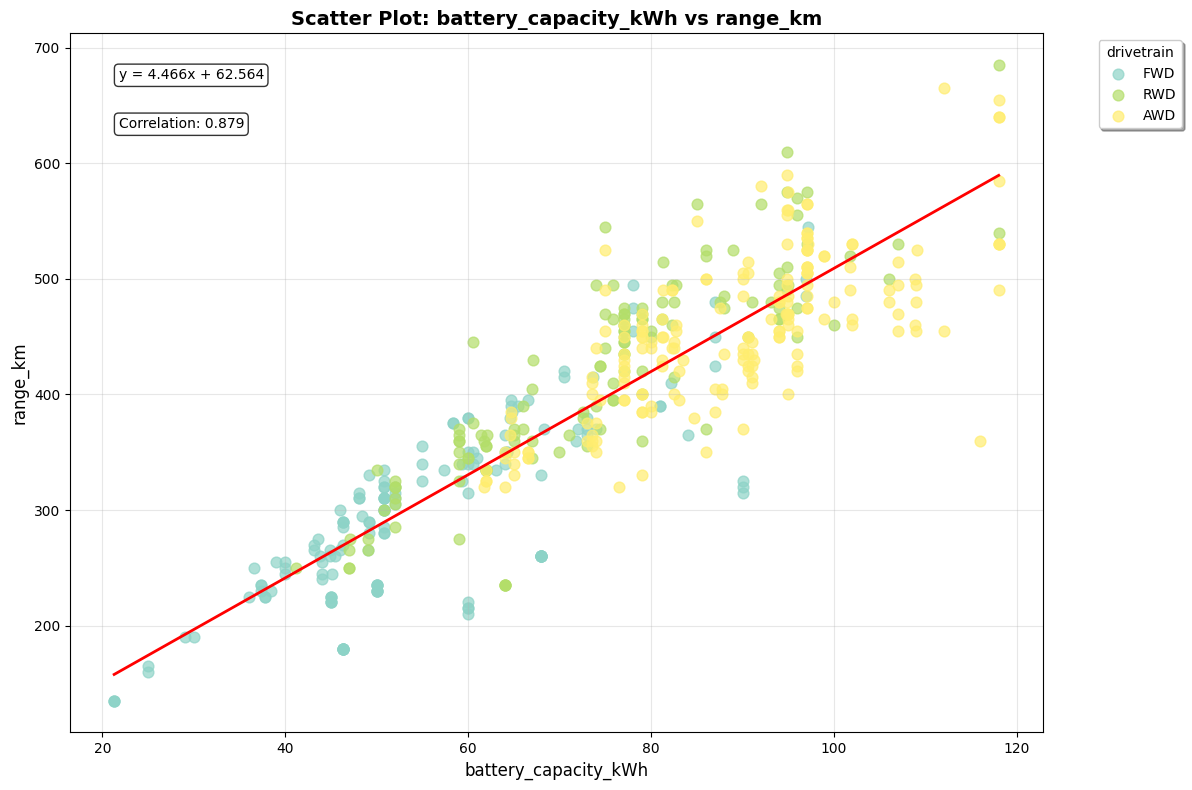


SCATTER PLOT ANALYSIS SUMMARY
Features: battery_capacity_kWh (X) vs range_km (Y)
Sample size: 476 points
Correlation coefficient: 0.8794
R-squared: 0.7733
Regression equation: y = 4.4664x + 62.5642
Relationship: Strong positive correlation
Categories in drivetrain: ['FWD', 'RWD', 'AWD']

CORRELATION ANALYSIS 2: torque_nm vs acceleration_0_100_s
Analyzing 476 records after removing NaN values
X-axis: torque_nm, Y-axis: acceleration_0_100_s
Color by: drivetrain


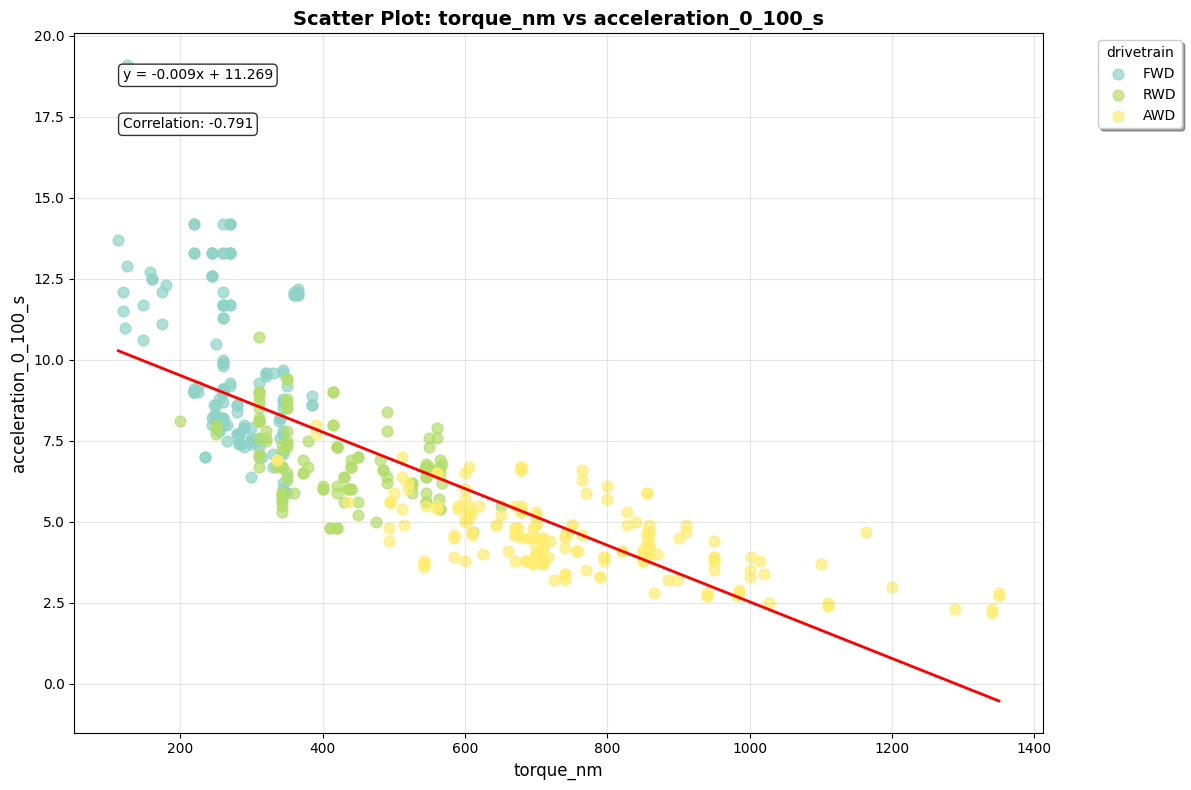


SCATTER PLOT ANALYSIS SUMMARY
Features: torque_nm (X) vs acceleration_0_100_s (Y)
Sample size: 476 points
Correlation coefficient: -0.7905
R-squared: 0.6249
Regression equation: y = -0.0087x + 11.2691
Relationship: Strong negative correlation
Categories in drivetrain: ['FWD', 'RWD', 'AWD']

CORRELATION ANALYSIS 3: top_speed_kmh vs acceleration_0_100_s
Analyzing 476 records after removing NaN values
X-axis: top_speed_kmh, Y-axis: acceleration_0_100_s
Color by: drivetrain


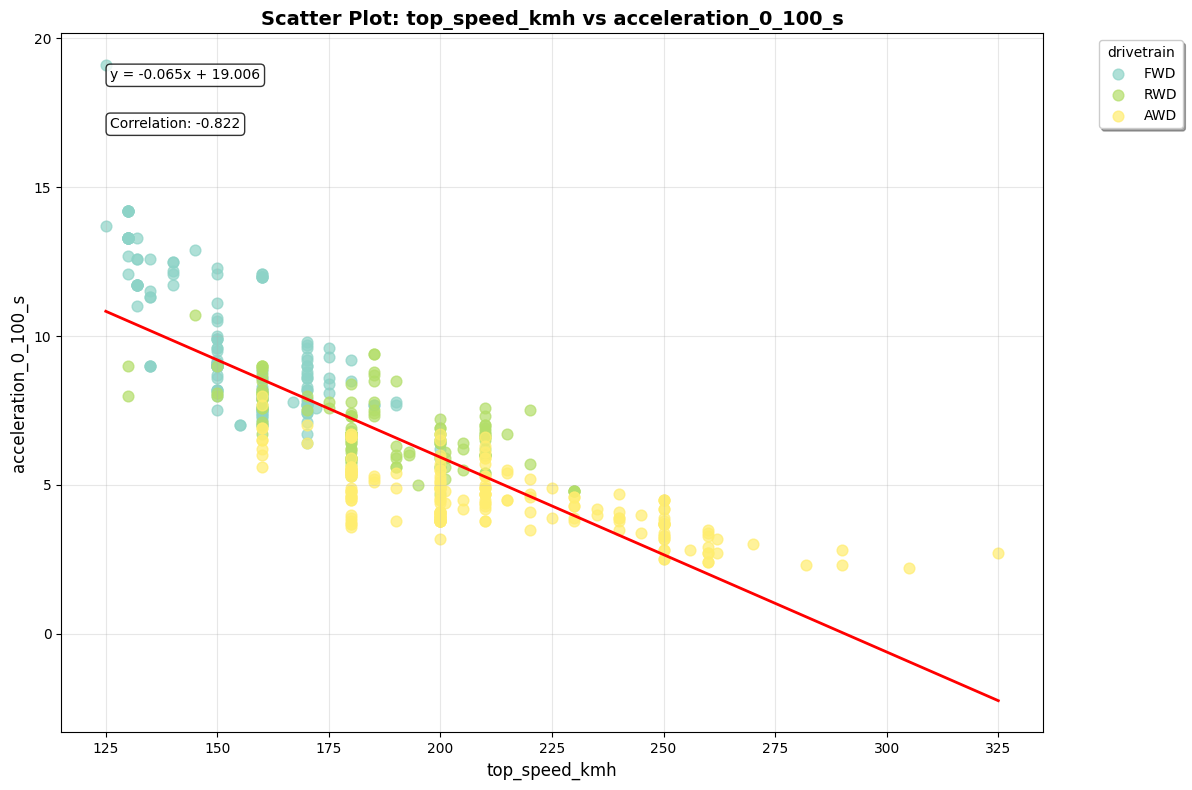


SCATTER PLOT ANALYSIS SUMMARY
Features: top_speed_kmh (X) vs acceleration_0_100_s (Y)
Sample size: 476 points
Correlation coefficient: -0.8218
R-squared: 0.6753
Regression equation: y = -0.0654x + 19.0057
Relationship: Strong negative correlation
Categories in drivetrain: ['FWD', 'RWD', 'AWD']


In [15]:
pairs = [
    ('battery_capacity_kWh', 'range_km'),
    ('torque_nm', 'acceleration_0_100_s'),
    ('top_speed_kmh', 'acceleration_0_100_s')
]
results = plot_ev_correlations(df, pairs, col='drivetrain')

# Outlier Analysis

In [16]:
num_cols = df.select_dtypes(include='number').columns

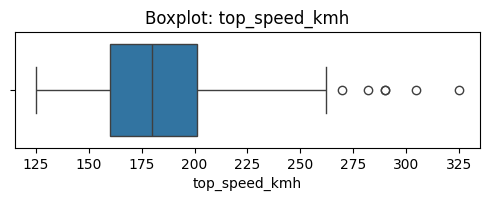

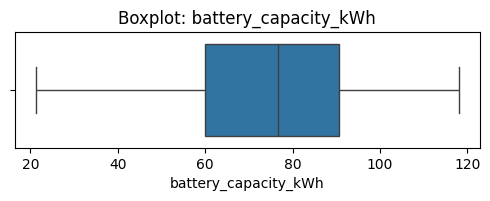

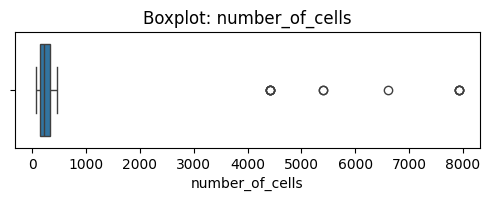

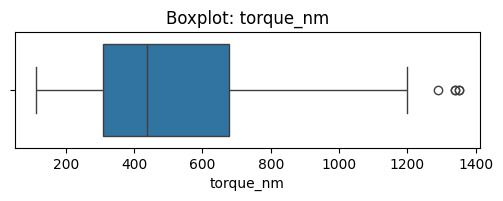

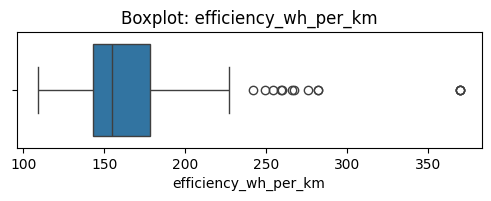

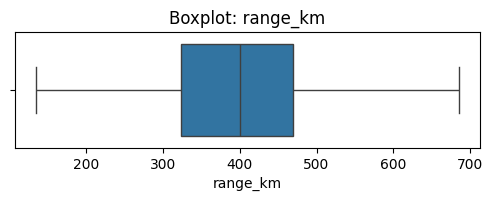

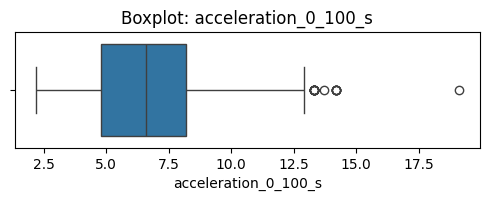

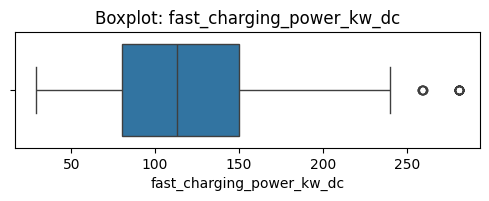

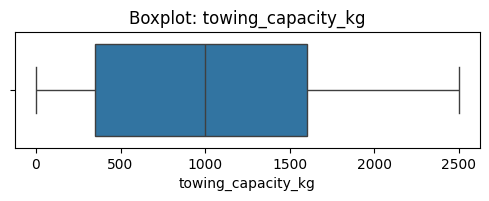

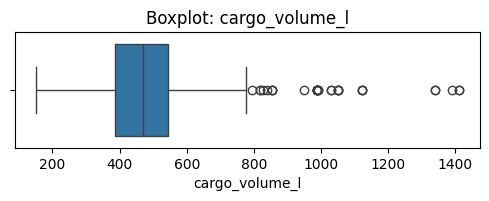

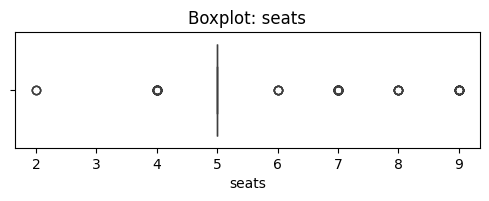

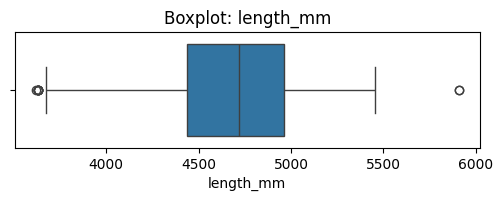

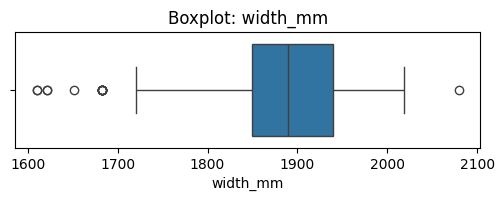

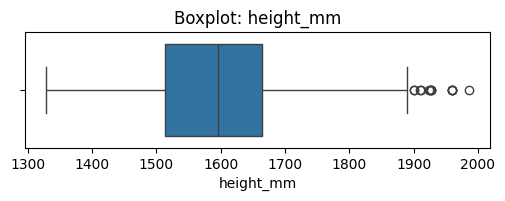

In [17]:
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

In [18]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]


In [19]:
outlier_summary = {}

for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

import pandas as pd
pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['# Outliers']).sort_values(by='# Outliers', ascending=False)


# Outliers
seats                              95
cargo_volume_l                     32
fast_charging_power_kw_dc          26
acceleration_0_100_s               19
efficiency_wh_per_km               14
height_mm                          14
width_mm                           14
number_of_cells                    12
length_mm                           9
top_speed_kmh                       6
torque_nm                           5
battery_capacity_kWh                0
range_km                            0
towing_capacity_kg                  0

In [20]:
df['seats'].value_counts()

seats
5    381
7     38
4     27
9     15
8      7
6      5
2      3
Name: count, dtype: int64

Since all the outliers are normal for a car dataset, we are not going to change them

## Feature Engineering

In [21]:
features = df.columns
features

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [22]:
df['acceleration_efficiency'] = df['battery_capacity_kWh'] / df['acceleration_0_100_s']
df['charging_speed_km_per_min'] = (df['fast_charging_power_kw_dc'] * 1000 / df['efficiency_wh_per_km']) / 60
df['acceleration_class'] = pd.cut(df['acceleration_0_100_s'], bins=[0, 4, 6, 8, 10, 20], labels=['Super Fast', 'Fast', 'Moderate', 'Slow', 'Very Slow'])


In [23]:
engineered_cols = [
    'acceleration_efficiency', 
    'charging_speed_km_per_min', 
    'acceleration_class'
]

df[engineered_cols].head()

acceleration_efficiency  charging_speed_km_per_min acceleration_class
0                 5.400000                   7.158120           Moderate
1                 5.400000                   7.494407           Moderate
2                 8.610169                   8.333333               Fast
3                 8.193548                   8.333333           Moderate
4                 8.000000                   8.333333           Moderate

### Visualizations

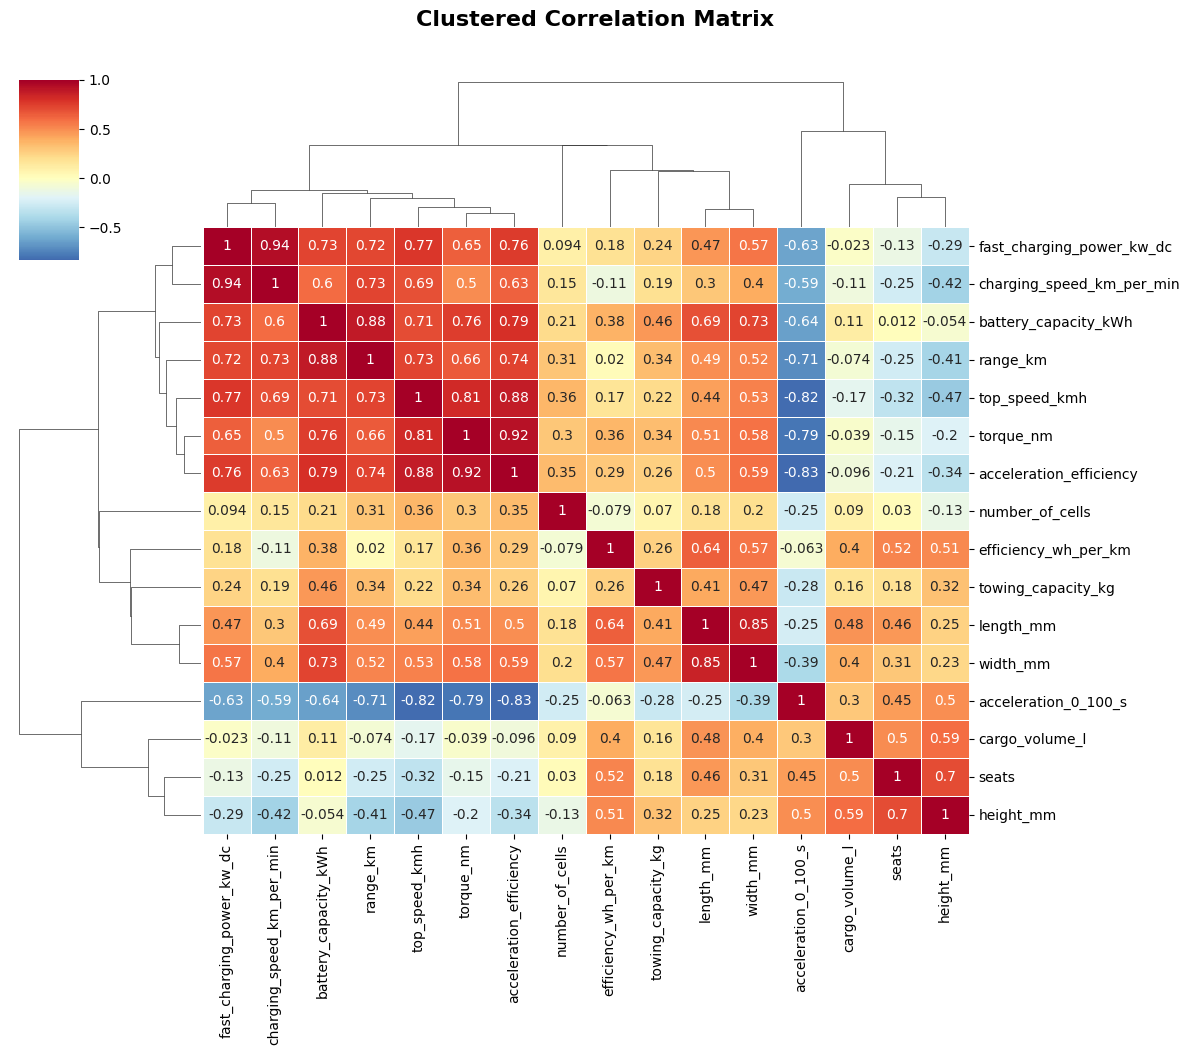


Top 10 Strongest Correlations:
--------------------------------------------------
fast_charging_power_kw_dc <-> charging_speed_km_per_min: 0.937
torque_nm <-> acceleration_efficiency: 0.925
battery_capacity_kWh <-> range_km: 0.879
top_speed_kmh <-> acceleration_efficiency: 0.878
length_mm <-> width_mm: 0.850
acceleration_0_100_s <-> acceleration_efficiency: -0.831
top_speed_kmh <-> acceleration_0_100_s: -0.822
top_speed_kmh <-> torque_nm: 0.814
battery_capacity_kWh <-> acceleration_efficiency: 0.793
torque_nm <-> acceleration_0_100_s: -0.791


In [24]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

g = sns.clustermap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, linewidths=0.5, figsize=(12, 10), square=True)
g.figure.suptitle('Clustered Correlation Matrix', fontweight='bold', fontsize=16, y=1.05)
plt.show()

        
# Find strongest correlations
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'var1': corr_matrix.columns[i],
            'var2': corr_matrix.columns[j],
            'correlation': corr_matrix.iloc[i, j],
            'abs_correlation': abs(corr_matrix.iloc[i, j])
        })
        
corr_df = pd.DataFrame(corr_pairs).sort_values('abs_correlation', ascending=False)
        
print("\nTop 10 Strongest Correlations:")
print("-" * 50)
for _, row in corr_df.head(10).iterrows():
    print(f"{row['var1']} <-> {row['var2']}: {row['correlation']:.3f}")

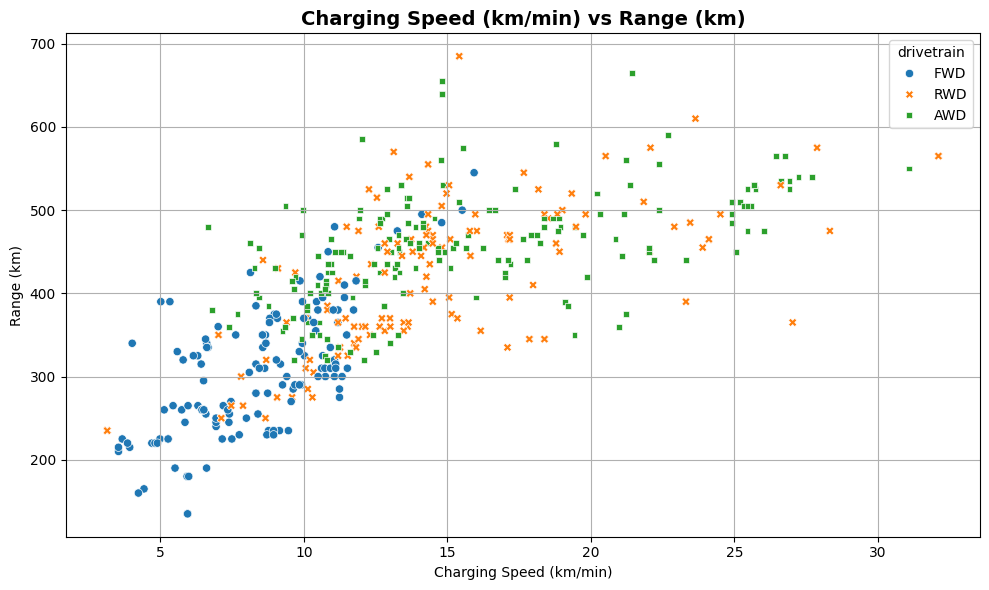

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='charging_speed_km_per_min', y='range_km', hue='drivetrain', style='drivetrain')
plt.title("Charging Speed (km/min) vs Range (km)", fontsize=14, fontweight='bold')
plt.xlabel("Charging Speed (km/min)")
plt.ylabel("Range (km)")
plt.grid(True)
plt.tight_layout()
plt.show()


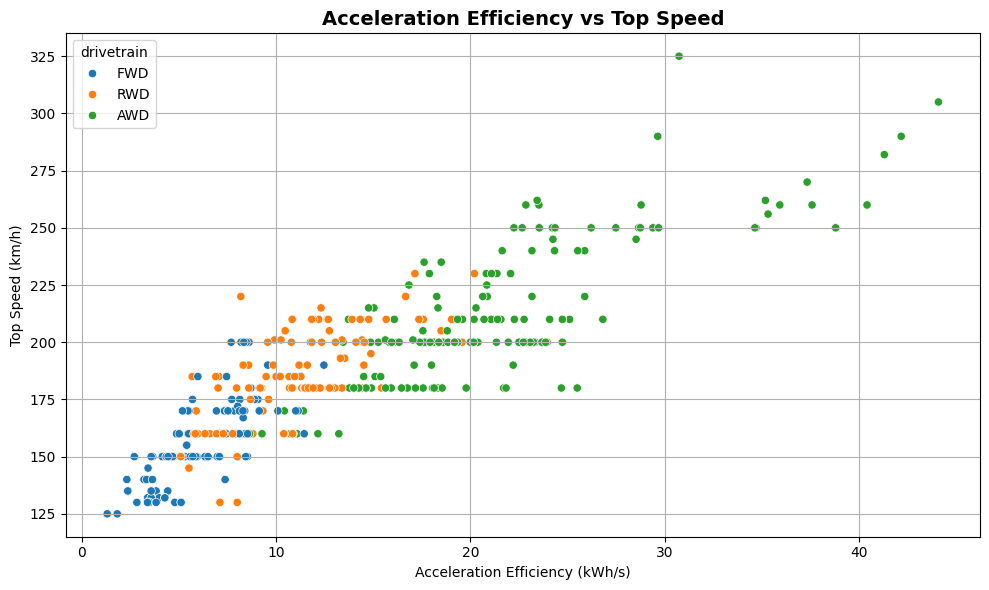

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceleration_efficiency', y='top_speed_kmh', hue='drivetrain')
plt.title("Acceleration Efficiency vs Top Speed", fontsize=14, fontweight='bold')
plt.xlabel("Acceleration Efficiency (kWh/s)")
plt.ylabel("Top Speed (km/h)")
plt.grid(True)
plt.tight_layout()
plt.show()


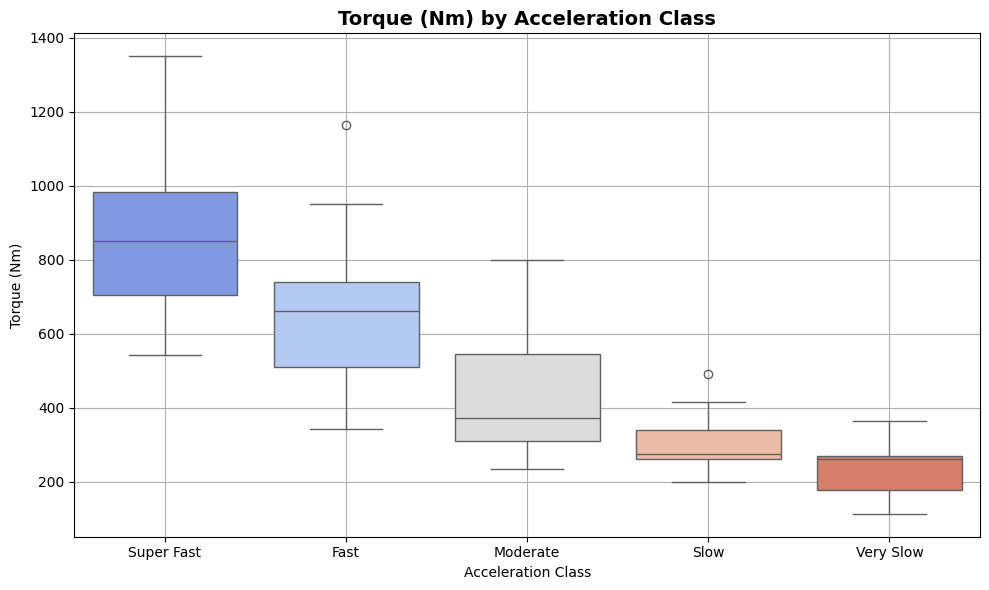

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='acceleration_class', y='torque_nm', palette='coolwarm')
plt.title("Torque (Nm) by Acceleration Class", fontsize=14, fontweight='bold')
plt.xlabel("Acceleration Class")
plt.ylabel("Torque (Nm)")
plt.grid(True)
plt.tight_layout()
plt.show()


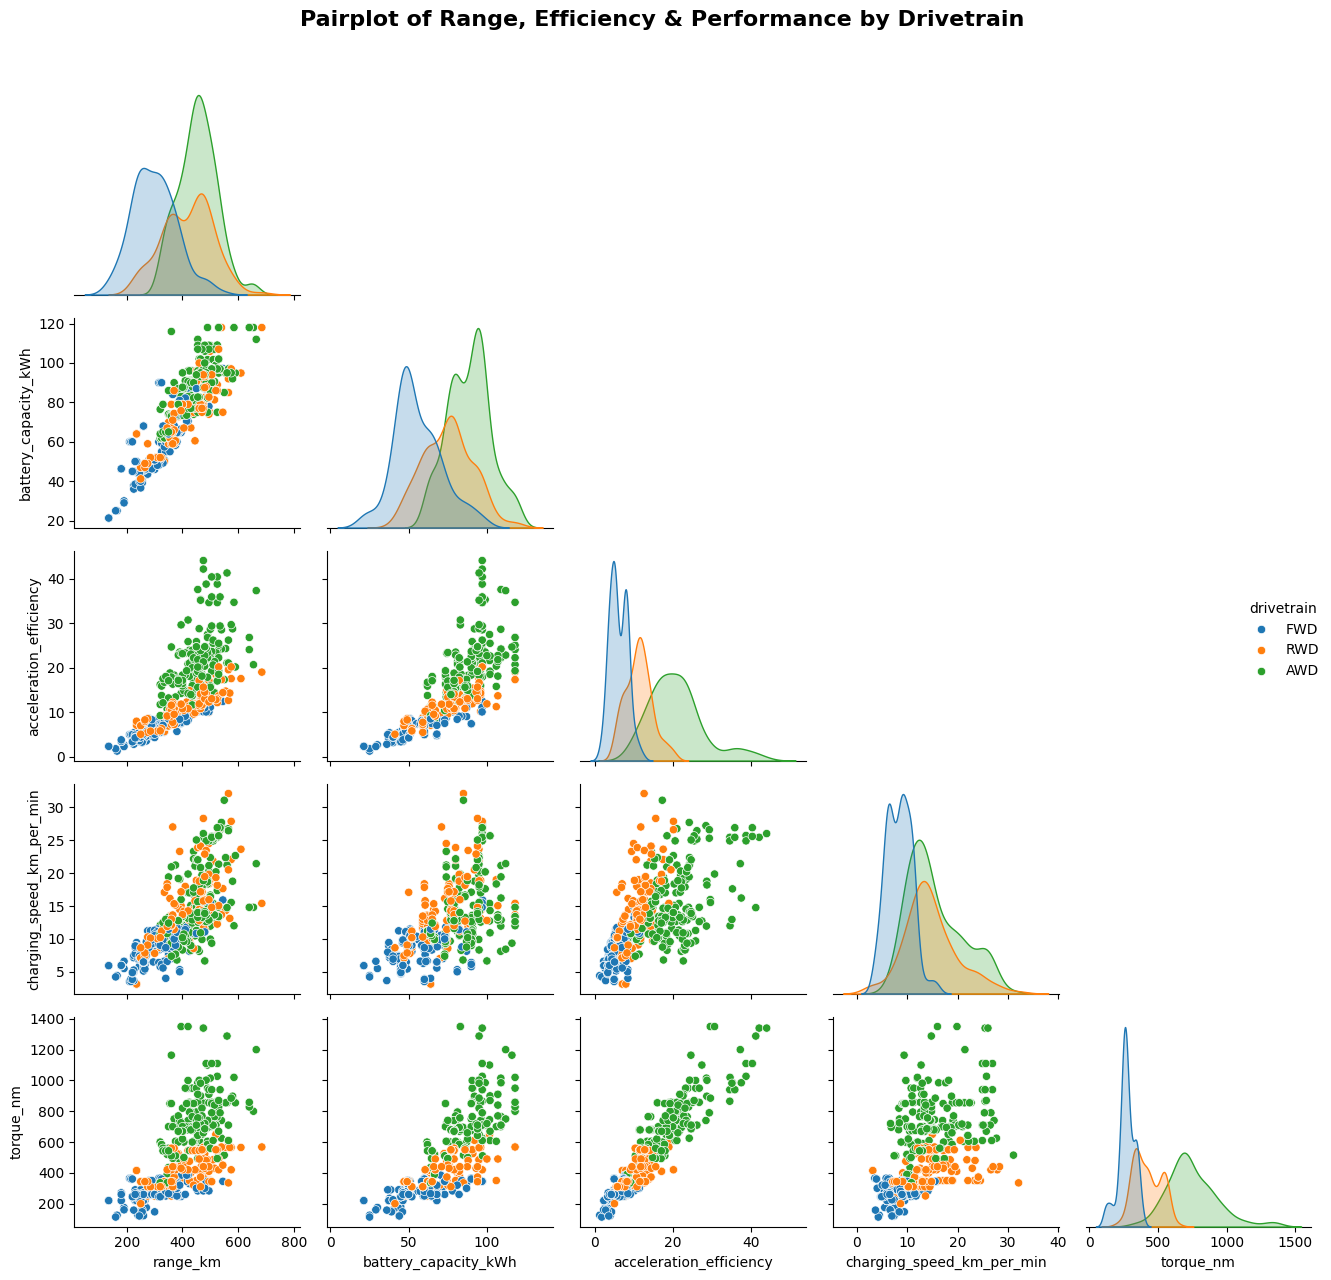

In [28]:
sns.pairplot(df, vars=[
    'range_km',
    'battery_capacity_kWh',
    'acceleration_efficiency',
    'charging_speed_km_per_min',
    'torque_nm'
], hue='drivetrain', corner=True)
plt.suptitle("Pairplot of Range, Efficiency & Performance by Drivetrain", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [29]:
df.to_csv("../Output/df_engineered.csv", index=False)